The purpose of this project is to do preliminary analysis of the Open Food database to see whether it would be possible to create an autocompletion system to avoid having to fill each variable manually which can be long and prone to errors. 

OpenFoodFact is an organism with an open source database with nutritional information regarding a large range of products. They aim to help consumers choosing better product by giving them an easy way to compare food products and see which ones are healthier.

To have a first look at the possibility of an auto completion system I chose to study the possibility of completing a product's nutriscore when it is not filled. The nutriscore is the result of a formula including several nutrition values about a product and is an easy way to estimate whether the product is healthy or not. Most consumers base their choice on this value.I tehrefore decided to focus on this variable.

In this analysis, I will use the most filled variables in the dataset to see if it is possible to suggest a nutriscore based on these variables.

Variables that are not filled enough are less interesting because it means that most of the time, they will not be available to suggest a nutriscore for the product.

# Importing librairies and loading the initial dataset

In [1]:
#Importing librairies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Importing KNN Imputer
from sklearn.impute import KNNImputer

#Centering and standardising
from sklearn.preprocessing import StandardScaler

#Spearman correlation
from scipy.stats import spearmanr

#Multiple regression
from sklearn.linear_model import LinearRegression

#PCA
from sklearn.decomposition import PCA

#Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Importing and reading the dataset, separated by tab
raw_data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = "\t")
raw_data

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_1518/3480693555.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = "\t")


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Looking at primary information about the dataset

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [4]:
raw_data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [5]:
raw_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Some columns are not filled at all and display nan when trying to describe them
We can also see that there are a lot of columns. I need to select accurate columns to analyse
Columns that are not filled enough will not be relevant to this analysis. I will therefore look at the fill rate for each column
I will drop the columns that are not filled at all

In [6]:
#Finding out the fill rate of each variable
pd.set_option('display.max_rows', None)
raw_data.isna().mean()

code                                          0.000072
url                                           0.000072
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
last_modified_t                               0.000000
last_modified_datetime                        0.000000
product_name                                  0.055373
generic_name                                  0.835413
quantity                                      0.673229
packaging                                     0.753844
packaging_tags                                0.753841
brands                                        0.088574
brands_tags                                   0.088599
categories                                    0.736854
categories_tags                               0.736919
categories_fr                                 0.736850
origins                                       0.930823
origins_ta

# Columns treatment

In [7]:
raw_data = raw_data.drop(columns = ['code','url','creator','created_datetime','last_modified_datetime','last_modified_t','created_t','serving_size'])

In [8]:
#Displaying the total number of columns
len(raw_data.columns)

154

In [9]:
'''Dropping columns in which most values are nulls. Columns must contain at leats 50% of values to be kept, threshold 
is the number of rows in the dataset divided by 2.
.index allows to take the total number of lines in the dataframe in order to delete the columns in which less than 50% of products have values'''
raw_data.dropna(axis = 1, thresh = (len(raw_data.index)/2), inplace = True)

In [10]:
pd.set_option('display.max_rows', 50)
raw_data

,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,乐吧泡菜味薯片,乐吧,乐吧,China,en:china,Chine,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,Knorr,knorr,en:FR,en:france,France,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lines treatment

Deleting line with less than 50% values filled

In [11]:
#Deleting rows that have less than 50% filled. df.columns since I need to delete rows that contain less than half the columns filled with data
raw_data.dropna(thresh = int(len(raw_data.columns)/2), inplace = True)

In [12]:
raw_data

,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,unfi,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,...,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320758,Miel de Camargue,L. Boulaire,l-boulaire,France,en:france,France,Miel,0.0,[ miel -> fr:miel ],0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,Thé vert Earl grey,Lobodis,lobodis,France,en:france,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,...,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010,2.0,0.0
320765,Rillette d'oie,"Sans marque,D.Lambert","sans-marque,d-lambert",France,en:france,France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0


# Finding out whether there are duplicates

Considering the number of lines, I can't go through the whole dataframe to see whether there are duplicates, I will try to isolate any duplicated data.

In [13]:
#Looking at whether there are duplicates (lines that contain the exact same information) in the dataset
duplicated_data = raw_data.loc[raw_data.duplicated() == True]

duplicated_data
#3 546 duplicates found

,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
358,"Emojeez, Gummies Candy, Fruit",Healthy Food Brands Llc,healthy-food-brands-llc,US,en:united-states,États-Unis,"Corn syrup, sugar, water, gelatin, dextrose, c...",8.0,[ corn-syrup -> en:corn-syrup ] [ syrup -> ...,0.0,...,0.00,0.00,67.50,40.00,0.0,5.00,0.03048,0.012,11.0,11.0
393,Fruit Gummies,Angry Birds,angry-birds,US,en:united-states,États-Unis,"Sugar, corn syrup, white grape juice concentra...",7.0,[ sugar -> en:sugar ] [ corn-syrup -> en:co...,0.0,...,0.00,0.00,70.00,37.50,0.0,7.50,0.09652,0.038,11.0,11.0
394,Fruit Gummies,Angry Birds,angry-birds,US,en:united-states,États-Unis,"Sugar, corn syrup, white grape juice concentra...",7.0,[ sugar -> en:sugar ] [ corn-syrup -> en:co...,0.0,...,0.00,0.00,70.00,37.50,0.0,7.50,0.09652,0.038,11.0,11.0
471,Peanut Butter,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,Dry roasted peanuts.,0.0,[ dry-roasted-peanuts -> en:dry-roasted-peanu...,0.0,...,50.00,7.81,21.88,3.12,9.4,21.88,0.00000,0.000,9.0,9.0
801,Meal Replacement Shake,Slimfast,slimfast,US,en:united-states,États-Unis,"Water, calcium caseinate, milk protein concent...",5.0,[ water -> en:water ] [ calcium-caseinate -...,0.0,...,2.77,0.46,1.23,0.62,0.6,6.15,0.20320,0.080,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319752,"Flavoured Sparkling Drink, Peach",Bundaberg,bundaberg,US,en:united-states,États-Unis,"Carbonated water, cane sugar, peach juice from...",7.0,[ carbonated-water -> en:carbonated-water ] ...,0.0,...,0.00,0.00,11.50,11.50,0.0,0.00,NaN,NaN,NaN,NaN
320372,Crushed Apple Cider,Monteiths Brewing Co,monteiths-brewing-co,Australia,en:australia,Australie,CONTAINS SULPHITES,0.0,[ contains-sulphites -> en:contains-sulphites...,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320477,"Chewy Fruit & Veggie Snacks, Sweet Potatoes Ap...",Veggie-Go's,veggie-go-s,US,en:united-states,États-Unis,Organic sweet potato pie puree (organic apples...,1.0,[ organic-sweet-potato-pie-puree -> en:organi...,0.0,...,0.00,0.00,41.67,16.67,8.3,0.00,0.10668,0.042,0.0,0.0
320664,Chipotle Peppers In Adobo Sauce,La Costena,la-costena,US,en:united-states,États-Unis,"Chipotle peppers, water, vinegar, tomatoes, on...",0.0,[ chipotle-peppers -> en:chipotle-peppers ] ...,0.0,...,0.00,0.00,16.67,6.67,10.0,0.00,3.21818,1.267,6.0,6.0


In [14]:
#Deleting duplicates lines
data = raw_data.loc[raw_data.duplicated() == False]

In [15]:
data

,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,unfi,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,...,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320758,Miel de Camargue,L. Boulaire,l-boulaire,France,en:france,France,Miel,0.0,[ miel -> fr:miel ],0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,Thé vert Earl grey,Lobodis,lobodis,France,en:france,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,...,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010,2.0,0.0
320765,Rillette d'oie,"Sans marque,D.Lambert","sans-marque,d-lambert",France,en:france,France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0


# Looking at the remaining variables

Looking at variables that have similar names to see the difference between them and whether it is usefull to keep all of them.

In [16]:
data.isna().mean()

product_name                               0.011830
brands                                     0.020446
brands_tags                                0.020450
countries                                  0.000236
countries_tags                             0.000236
countries_fr                               0.000236
ingredients_text                           0.097054
additives_n                                0.097054
additives                                  0.097172
ingredients_from_palm_oil_n                0.097054
ingredients_that_may_be_from_palm_oil_n    0.097054
nutrition_grade_fr                         0.192828
states                                     0.000000
states_tags                                0.000000
states_fr                                  0.000000
energy_100g                                0.051516
fat_100g                                   0.114873
saturated-fat_100g                         0.163146
carbohydrates_100g                         0.115988
sugars_100g 

## Created time and created datetime

There is no need to keep this column for the analysis as it will not bring useful information. It will be deleted for this analysis.

## Last modified 

'last_modified_t' and 'last_modified_datetime'

There is no need to keep these columns for the analysis as they will not bring useful information. They will be deleted for this analysis.

## Brands and brand tags

Brands and brand tag basically contain the same information. And almost have the same percentage of null values

In [17]:
data[['brands','brands_tags']]

,brands,brands_tags
1,NaN,NaN
2,Torn & Glasser,torn-glasser
3,Grizzlies,grizzlies
4,Bob's Red Mill,bob-s-red-mill
5,Unfi,unfi
...,...,...
320758,L. Boulaire,l-boulaire
320763,Lobodis,lobodis
320765,"Sans marque,D.Lambert","sans-marque,d-lambert"
320768,Trader Joe's,trader-joe-s


I will delete brands_tags since the writing is better in brand (Torn & Glasser vs torn-glasser)

In [18]:
data.drop(columns = ['brands_tags'], inplace = True)
data

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_1518/781759499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['brands_tags'], inplace = True)


,product_name,brands,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,Banana Chips Sweetened (Whole),NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,...,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320758,Miel de Camargue,L. Boulaire,France,en:france,France,Miel,0.0,[ miel -> fr:miel ],0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,Thé vert Earl grey,Lobodis,France,en:france,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,0.0,...,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010,2.0,0.0
320765,Rillette d'oie,"Sans marque,D.Lambert",France,en:france,France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0


## Countries, countries tag and countries_fr

All have 0,3% of null values and contain the same information, I will only keep the initial column : countries

In [19]:
data[['countries','countries_tags','countries_fr']]

,countries,countries_tags,countries_fr
1,US,en:united-states,États-Unis
2,US,en:united-states,États-Unis
3,US,en:united-states,États-Unis
4,US,en:united-states,États-Unis
5,US,en:united-states,États-Unis
...,...,...,...
320758,France,en:france,France
320763,France,en:france,France
320765,France,en:france,France
320768,US,en:united-states,États-Unis


No need to keep both, i will delete countries tags

In [20]:
data.drop(columns = ['countries_tags','countries_fr'], inplace = True)
data

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_1518/1268012456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['countries_tags','countries_fr'], inplace = True)


,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...",...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...",...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...",...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,US,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...",...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...",...,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320758,Miel de Camargue,L. Boulaire,France,Miel,0.0,[ miel -> fr:miel ],0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,0.0,c,"en:to-be-checked, en:complete, en:nutrition-fa...",...,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010,2.0,0.0
320765,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,0.0,0.0,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,US,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...",...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0


## Aditive_n and additive

additives_n : number of food additives
additives : additives names

In [21]:
data[['additives_n','additives']].head(50)

,additives_n,additives
1,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...
2,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...
3,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...
4,0.0,[ organic-polenta -> en:organic-polenta ] [...
5,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...
6,0.0,[ organic-long-grain-white-rice -> en:organic...
7,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...
8,0.0,[ organic-chocolate-liquor -> en:organic-choc...
9,0.0,[ organic-expeller-pressed -> en:organic-expe...
10,0.0,[ organic-adzuki-beans -> en:organic-adzuki-b...


In [22]:
pd.set_option('display.max_colwidth',None)
pd.DataFrame(data['additives'])

,additives
1,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ]
2,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ]
3,[ organic-hazelnuts -> en:organic-hazelnuts ] [ hazelnuts -> en:hazelnuts ] [ organic-cashews -> en:organic-cashews ] [ cashews -> en:cashews ] [ organic-walnuts-almonds -> en:organic-walnuts-almonds ] [ walnuts-almonds -> en:walnuts-almonds ] [ almonds -> en:almonds ] [ organic-sunflower-oil -> en:organic-sunflower-oil ] [ sunflower-oil -> en:sunflower-oil ] [ oil -> en:oil ] [ sea-salt -> en:sea-salt ] [ salt -> en:salt ]
4,[ organic-polenta -> en:organic-polenta ] [ polenta -> en:polenta ]
5,[ rolled-oats -> en:rolled-oats ] [ oats -> en:oats ] [ grape-concentrate -> en:grape-concentrate ] [ concentrate -> en:concentrate ] [ expeller-pressed-canola-oil -> en:expeller-pressed-canola-oil ] [ pressed-canola-oil -> en:pressed-canola-oil ] [ canola-oil -> en:canola-oil ] [ oil -> en:oil ] [ sunflower-seeds -> en:sunflower-seeds ] [ seeds -> en:seeds ] [ almonds -> en:almonds ] [ walnuts-oat-bran -> en:walnuts-oat-bran ] [ oat-bran -> en:oat-bran ] [ bran -> en:bran ] [ sesame-seeds -> en:sesame-seeds ] [ seeds -> en:seeds ] [ cashews -> en:cashews ] [ natural-vitamin-e -> en:natural-vitamin-e ] [ vitamin-e -> en:vitamin-e ] [ e -> en:e ]
...,...
320758,[ miel -> fr:miel ]
320763,[ the-vert -> fr:the-vert ] [ the -> fr:the ] [ arome-naturel-bergamote-avec-autres-aromes-naturels -> fr:arome-naturel-bergamote-avec-autres-aromes-naturels ] [ arome-naturel-bergamote-avec-autres-aromes -> fr:arome-naturel-bergamote-avec-autres-aromes ] [ arome-naturel-bergamote-avec-autres -> fr:arome-naturel-bergamote-avec-autres ] [ arome-naturel-bergamote-avec -> fr:arome-naturel-bergamote-avec ] [ arome-naturel-bergamote -> fr:arome-naturel-bergamote ] [ arome-naturel -> fr:arome-naturel ] [ arome -> fr:arome ] [ ecorces-d-orange-douce-3 -> fr:ecorces-d-orange-douce-3 ] [ ecorces-d-orange-douce -> fr:ecorces-d-orange-douce ] [ ecorces-d-orange -> fr:ecorces-d-orange ] [ ecorces-d -> fr:ecorces-d ] [ ecorces -> fr:ecorces ]
320765,[ viande-d-oie -> fr:viande-d-oie ] [ viande-d -> fr:viande-d ] [ viande -> fr:viande ] [ graisse-de-canard -> fr:graisse-de-canard ] [ graisse-de -> fr:graisse-de ] [ graisse -> fr:graisse ] [ epices -> fr:epices ] [ sel -> fr:sel ] [ poivre -> fr:poivre ]
320768,[ organic-peppermint -> en:organic-peppermint ] [ peppermint -> en:peppermint ] [ organic-lemon-grass -> en:organic-lemon-grass ] [ lemon-grass -> en:lemon-grass ] [ grass -> en:grass ] [ organic-spearmint -> en:organic-spearmint ] [ spearmint -> en:spearmint ]


In [23]:
pd.reset_option('display.max_colwidth')

Keeping both since they don't display the same information.

## Palm oil

ingredients_from_palm_oil_n

### Ingredients from palm oil

In [24]:
data[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']]

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
...,...,...
320758,0.0,0.0
320763,0.0,0.0
320765,0.0,0.0
320768,0.0,0.0


In [25]:
#They seem to all be filled with 0.0

In [26]:
data['ingredients_from_palm_oil_n'].unique()

array([ 0., nan,  1.,  2.])

They are not all filled with 0.0. 

Possible values for "ingredients_from_palm_oil_n" are 0.0, 1.0, 2.0

### Ingredients that may be from palm oil

In [27]:
data['ingredients_that_may_be_from_palm_oil_n'].unique()

array([ 0.,  3., nan,  1.,  2.,  5.,  4.,  6.])

Possible values for "ingredients_that_may_be_from_palm_oil_n" are 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0 and nan

In [28]:
data = data.drop(columns = ['ingredients_that_may_be_from_palm_oil_n'])

## Nutrition Grade FR

nutrition_grade_fr

In [29]:
data['nutrition_grade_fr'].unique()

array(['d', 'b', nan, 'c', 'a', 'e'], dtype=object)

## States, states tags, states_fr

states
states_tags
states_fr

In [30]:
#States, states tags and states fr inform about the completion rate of a few selected variables on the dataset. No need to keep them
data[['product_name','states']]

,product_name,states
1,Banana Chips Sweetened (Whole),"en:to-be-completed, en:nutrition-facts-complet..."
2,Peanuts,"en:to-be-completed, en:nutrition-facts-complet..."
3,Organic Salted Nut Mix,"en:to-be-completed, en:nutrition-facts-complet..."
4,Organic Polenta,"en:to-be-completed, en:nutrition-facts-complet..."
5,Breadshop Honey Gone Nuts Granola,"en:to-be-completed, en:nutrition-facts-complet..."
...,...,...
320758,Miel de Camargue,"en:to-be-completed, en:nutrition-facts-complet..."
320763,Thé vert Earl grey,"en:to-be-checked, en:complete, en:nutrition-fa..."
320765,Rillette d'oie,"en:to-be-checked, en:complete, en:nutrition-fa..."
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...","en:to-be-completed, en:nutrition-facts-complet..."


In [31]:
data[['product_name','states_tags']]

,product_name,states_tags
1,Banana Chips Sweetened (Whole),"en:to-be-completed,en:nutrition-facts-complete..."
2,Peanuts,"en:to-be-completed,en:nutrition-facts-complete..."
3,Organic Salted Nut Mix,"en:to-be-completed,en:nutrition-facts-complete..."
4,Organic Polenta,"en:to-be-completed,en:nutrition-facts-complete..."
5,Breadshop Honey Gone Nuts Granola,"en:to-be-completed,en:nutrition-facts-complete..."
...,...,...
320758,Miel de Camargue,"en:to-be-completed,en:nutrition-facts-complete..."
320763,Thé vert Earl grey,"en:to-be-checked,en:complete,en:nutrition-fact..."
320765,Rillette d'oie,"en:to-be-checked,en:complete,en:nutrition-fact..."
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...","en:to-be-completed,en:nutrition-facts-complete..."


In [32]:
data[['product_name','states_fr']]

,product_name,states_fr
1,Banana Chips Sweetened (Whole),"A compléter,Informations nutritionnelles compl..."
2,Peanuts,"A compléter,Informations nutritionnelles compl..."
3,Organic Salted Nut Mix,"A compléter,Informations nutritionnelles compl..."
4,Organic Polenta,"A compléter,Informations nutritionnelles compl..."
5,Breadshop Honey Gone Nuts Granola,"A compléter,Informations nutritionnelles compl..."
...,...,...
320758,Miel de Camargue,"A compléter,Informations nutritionnelles compl..."
320763,Thé vert Earl grey,"A vérifier,Complet,Informations nutritionnelle..."
320765,Rillette d'oie,"A vérifier,Complet,Informations nutritionnelle..."
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...","A compléter,Informations nutritionnelles compl..."


In [33]:
#Dropping states information
data.drop(columns = ['states','states_tags','states_fr'], inplace = True)
data

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,US,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320758,Miel de Camargue,L. Boulaire,France,Miel,0.0,[ miel -> fr:miel ],0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,c,21.0,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010,2.0,0.0
320765,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,US,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,b,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0


In [34]:
data.columns

Index(['product_name', 'brands', 'countries', 'ingredients_text',
       'additives_n', 'additives', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

## Nutrition score fr and nutrition score uk

nutrition-score-fr_100g, 'nutrition-score-uk_100g'

In [35]:
data[['product_name','nutrition-score-fr_100g','nutrition-score-uk_100g']].sample(50)

,product_name,nutrition-score-fr_100g,nutrition-score-uk_100g
144160,"Wars, Character Candy Lollipop",NaN,NaN
227328,Pennoni,-5.0,-5.0
35396,Hot Mustard,NaN,NaN
273307,Water Melon,1.0,1.0
172607,"Treasure Valley, Hand Crafted Gourmet Salsa, M...",-1.0,-1.0
25820,Green Hot Sauce,NaN,NaN
125454,"100% Vegetable & Fruit Juice Blend, Strawberry...",2.0,2.0
51211,"Simplynature, Fruit Strips, Blueberry & Acai",9.0,9.0
45951,Roman Beans,-5.0,-5.0
183145,Bolachas de Aveia e Chocolate (Pastelaria Sueca),26.0,26.0


All products have the same fr and uk nutrition score (fr nutrition score is based on the uk one according to the data description).

Nutrition score fr and uk have the same rate of null values. No need to keep both. I will delete nutriscore uk.

In [36]:
#Isolating null values from nutrition score fr and looking at it while also displaying nutriscore uk
null_nutri_fr = data.loc[data['nutrition-score-fr_100g'].isna(),['product_name','brands','nutrition-score-fr_100g','nutrition-score-uk_100g']]
pd.set_option('display.max_rows',None)
null_nutri_fr.head(50)

,product_name,brands,nutrition-score-fr_100g,nutrition-score-uk_100g
4,Organic Polenta,Bob's Red Mill,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,NaN,NaN
6,Organic Long Grain White Rice,Lundberg,NaN,NaN
8,Organic Dark Chocolate Minis,Equal Exchange,NaN,NaN
9,Organic Sunflower Oil,Napa Valley Naturals,NaN,NaN
10,Organic Adzuki Beans,Unfi,NaN,NaN
11,Organic Penne Pasta,Gardentime,NaN,NaN
13,Organic Golden Flax Seeds,Unfi,NaN,NaN
14,Organic Spicy Punks,Eden,NaN,NaN
17,Organic Sweetened Banana Chips,Unfi,NaN,NaN


Products that have an empty nutriscore fr also have a empty nutriscore uk.

In [37]:
data = data.drop(columns = ['nutrition-score-uk_100g'])

In [38]:
#Reseting the max rows display
pd.reset_option('display.max_rows')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271003 entries, 1 to 320771
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 267797 non-null  object 
 1   brands                       265462 non-null  object 
 2   countries                    270939 non-null  object 
 3   ingredients_text             244701 non-null  object 
 4   additives_n                  244701 non-null  float64
 5   additives                    244669 non-null  object 
 6   ingredients_from_palm_oil_n  244701 non-null  float64
 7   nutrition_grade_fr           218746 non-null  object 
 8   energy_100g                  257042 non-null  float64
 9   fat_100g                     239872 non-null  float64
 10  saturated-fat_100g           226790 non-null  float64
 11  carbohydrates_100g           239570 non-null  float64
 12  sugars_100g                  241893 non-null  float64
 13  fibe

Other columns obviously contain different information. 

# Functions to delete unwanted lines, columns and duplicates from the dataframe

To automate the first treatments, the following fonction can be used

In [40]:
#Deleting the first unwanted lines and columns

def clean_dataframe(df):
    #Deleting columns that will not be useful for the analysis
    df = df.drop(columns = ['code','url','creator','created_datetime','last_modified_datetime','last_modified_t','created_t','serving_size'])
    #Deleting the columns that have less than 50% values filled in their rows
    df.dropna(axis = 1, thresh = (len(df.index)/2), inplace = True)
    #Deleting rows with less than 50% values filled in their columns
    df.dropna(thresh = int(len(df.columns)/2), inplace = True)
    #Deleting duplicates
    new_df = df.loc[df.duplicated() == False]
    #Deleting brand tags
    no_brandtags = new_df.drop(columns= ['brands_tags'])
    #Deleting countries tags and countries fr
    no_countries_tag = no_brandtags.drop(columns= ['countries_tags','countries_fr'])
    #Dropping states information
    no_states = no_countries_tag.drop(columns= ['states','states_tags','states_fr'])
    #Dropping ingredients that may be from palm oil
    no_maybepalmoil = no_states.drop(columns= ['ingredients_that_may_be_from_palm_oil_n'])
    #Dropping nutriscore uk since keeping both nutriscore is not necessary
    no_nutri_uk = no_maybepalmoil.drop(columns = ['nutrition-score-uk_100g'])
    return no_nutri_uk
    

In [41]:
#Trying the new function
df_trial = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = "\t")

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_1518/83621992.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trial = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = "\t")


In [42]:
cleaned_df = clean_dataframe(df_trial)
cleaned_df

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,Organic Polenta,Bob's Red Mill,US,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320758,Miel de Camargue,L. Boulaire,France,Miel,0.0,[ miel -> fr:miel ],0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,c,21.0,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010,2.0
320765,Rillette d'oie,"Sans marque,D.Lambert",France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,US,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,b,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0


# Outliers identification and treatment

In [43]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271003 entries, 1 to 320771
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 267797 non-null  object 
 1   brands                       265462 non-null  object 
 2   countries                    270939 non-null  object 
 3   ingredients_text             244701 non-null  object 
 4   additives_n                  244701 non-null  float64
 5   additives                    244669 non-null  object 
 6   ingredients_from_palm_oil_n  244701 non-null  float64
 7   nutrition_grade_fr           218746 non-null  object 
 8   energy_100g                  257042 non-null  float64
 9   fat_100g                     239872 non-null  float64
 10  saturated-fat_100g           226790 non-null  float64
 11  carbohydrates_100g           239570 non-null  float64
 12  sugars_100g                  241893 non-null  float64
 13  fibe

In [44]:
cleaned_df.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,244701.000000,244701.000000,2.570420e+05,239872.000000,226790.000000,239570.000000,241893.000000,198534.000000,255919.000000,251973.000000,251928.000000,218746.000000
mean,1.945860,0.019918,1.142318e+03,12.690889,5.131426,32.140065,15.985478,2.861307,7.086565,2.032816,0.800462,9.180122
std,2.507964,0.141435,6.496787e+03,17.413023,8.013791,29.698995,22.293487,12.932884,8.398577,129.150286,50.851108,9.053792
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,3.810000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.000000,0.000000,1.100000e+03,5.000000,1.790000,21.000000,5.710000,1.500000,4.760000,0.586740,0.231000,10.000000
75%,3.000000,0.000000,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.379220,0.543000,16.000000
max,31.000000,2.000000,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


## Number of additives

count    244701.000000
mean          1.945860
std           2.507964
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64


<Axes: ylabel='additives_n'>

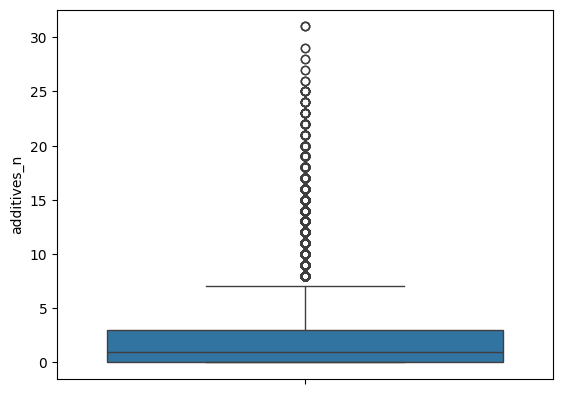

In [45]:
print(cleaned_df['additives_n'].describe())
sns.boxplot(cleaned_df['additives_n'])

The median is 1, and standard deviation is 2.5. the third quartile is 3.0
Interquartile range is 3. outliers are values above 7.5

The box plot shows a few outliers, products with more than 7.5 additives

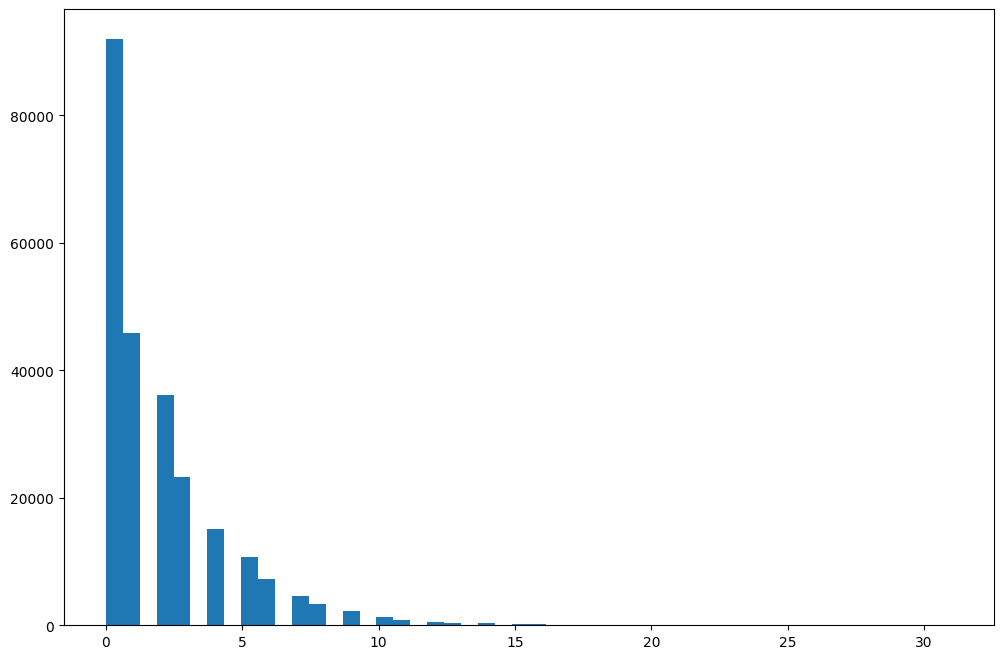

In [46]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['additives_n'], bins = 50)
plt.show()

In [47]:
cleaned_df.loc[cleaned_df['additives_n'] > 7.5, ['product_name','additives_n']]

,product_name,additives_n
153,"M&S Extrenely Chocolatey Milk, Dark & White Ch...",8.0
175,Danoises à la cannelle roulées,10.0
283,Cakes aux Fruits,11.0
285,"Between!, Dental Gum, Natural Cool Mint",9.0
286,"Eco-Dent, Between!, Sugar Free Dental Gum, Cin...",8.0
...,...,...
320183,Ultra low carb choc mocha delight,8.0
320340,Sour Patch Kids,8.0
320342,Brunch Mixed Berry Bar,8.0
320430,Steamed Puddings,12.0


9 801 products with outliers values

In [48]:
#Looking at the maximum value
cleaned_df.loc[cleaned_df['additives_n'] > 30, ['product_name','additives_n']]

,product_name,additives_n
156634,Italian Style Pinwheels,31.0
184345,Confiserie,31.0
184347,Confiserie,31.0


Products with too many additives seem to be candies or chocolate products. These outlisers will be kept because they accurately represent categories of product that contain a lot of additives. Taking them out of the analysis would distort the results (make the variability of this variable seem lower than it really is).

## Ingredients from palm oil

In [49]:
cleaned_df['ingredients_from_palm_oil_n'].sample(25)

93923     0.0
122761    0.0
212247    0.0
38808     0.0
128296    0.0
175694    0.0
126286    0.0
70915     0.0
126599    0.0
213375    1.0
24328     0.0
239770    0.0
150590    0.0
314926    0.0
70139     0.0
258095    0.0
113312    0.0
120671    0.0
142291    0.0
190873    0.0
275364    0.0
96875     0.0
186021    0.0
129124    0.0
167316    0.0
Name: ingredients_from_palm_oil_n, dtype: float64

count    244701.000000
mean          0.019918
std           0.141435
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64


<Axes: ylabel='ingredients_from_palm_oil_n'>

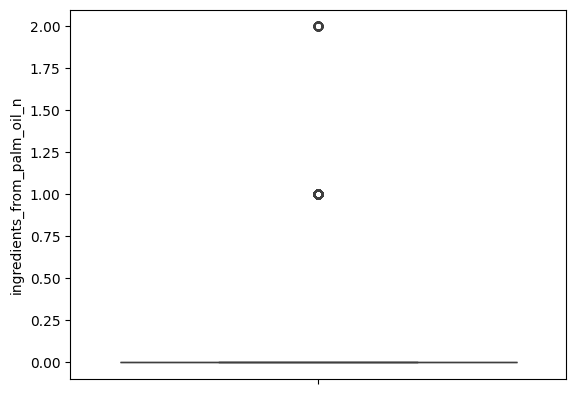

In [50]:
print(cleaned_df['ingredients_from_palm_oil_n'].describe())
sns.boxplot(cleaned_df['ingredients_from_palm_oil_n'])

Most values are 0.0 or 1.0

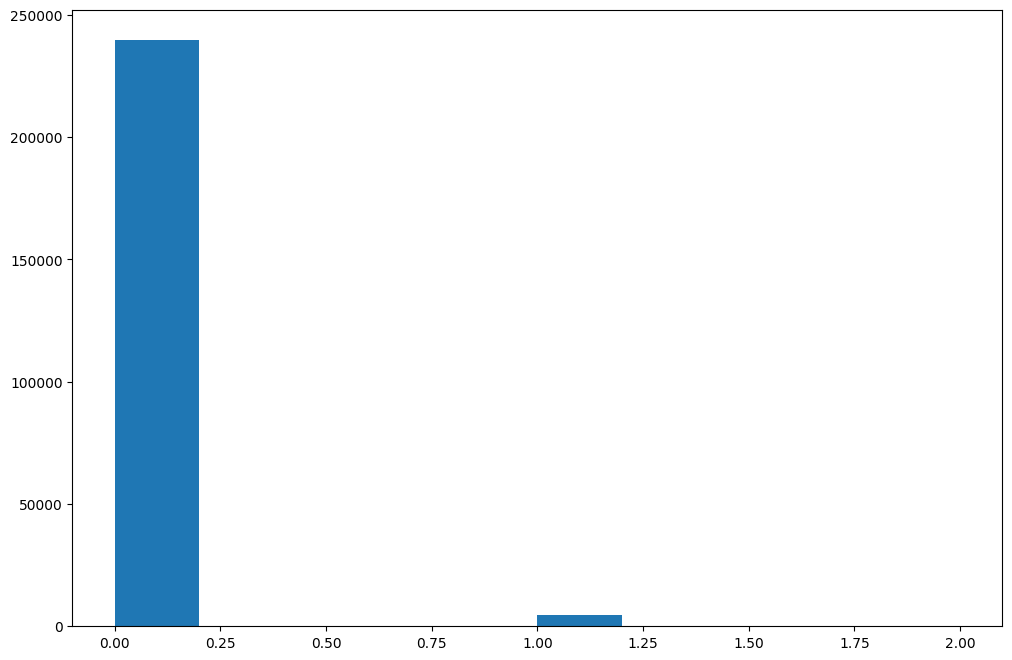

In [51]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['ingredients_from_palm_oil_n'])
plt.show()

In [52]:
cleaned_df.loc[cleaned_df['ingredients_from_palm_oil_n'] > 0, ['product_name','brands','ingredients_from_palm_oil_n']].head(20)

,product_name,brands,ingredients_from_palm_oil_n
509,Maple syrup & pecan cookie,Marks & Spencer,1.0
1356,Wrap Poulet à la Jamaïcaine,Marks & Spencer,1.0
10372,Chef d'oeuf™avec fromage sur muffin anglais,A&W,1.0
11272,Chocolate Chunk Crispy Cookies - Dark Chocolat...,Pepperidge Farm,1.0
11273,Chocolate Chunk Dark Double Chocolate Crispy C...,"Chocolate Chunk,Pepperidge Farm",1.0
11274,Chocolate chunk classic dark chocolate crispy ...,Pepperidge Farm,1.0
11275,Chocolate Chunk Milk Chocolate Macadamia Crisp...,"Chocolate Chunk,Pepperidge Farm",1.0
11276,Chocolate Chunk White Chocolate Macadamia Cris...,"Chocolate Chunk,Pepperidge Farm",1.0
11277,Soft Baked Chocolate Chunk Dark Chocolat Brownie,Pepperidge Farm,1.0
11281,Soft Baker chocolate chunk,Pepperidge farm,1.0


In [53]:
cleaned_df.loc[cleaned_df['ingredients_from_palm_oil_n'] > 1, ['product_name','brands','ingredients_from_palm_oil_n']]

,product_name,brands,ingredients_from_palm_oil_n
176625,Trésor Max Krunch,Kellogg's,2.0
177635,Popcorn Micro-ondes nature,McEnnedy,2.0
179370,Lasagnes saumons & épinards,Toque du Chef,2.0
187174,Poule au pot aux petits légumes,"Knorr,Unilever",2.0
195695,Barres Frosties,Kellogg's,2.0
198922,Biscuits aux graines de tournesol,Pural,2.0
204267,Sablé à la figue,Carrefour,2.0
205800,Millefeuille x 2,Intermarche,2.0
206470,Religieuse café - chocolat,"Sélection Intermarché,Intermarché",2.0
207076,Cracker's salés,Netto,2.0


Outliers are mainly cereals and processed products. These outlisers will be kept because they accurately represent categories of product that contain a lot of ingredients from palm oil.

While looking at the products description on the internet, we can see that this energy field indicates the kj of energy for a 100g of product.

## Energy (Kj)

energy_100g

IQR = 1293.0

1.5*IQR = 1939,5

Outliers = 3 232,5

count    2.570420e+05
mean     1.142318e+03
std      6.496787e+03
min      0.000000e+00
25%      3.810000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64


<Axes: ylabel='energy_100g'>

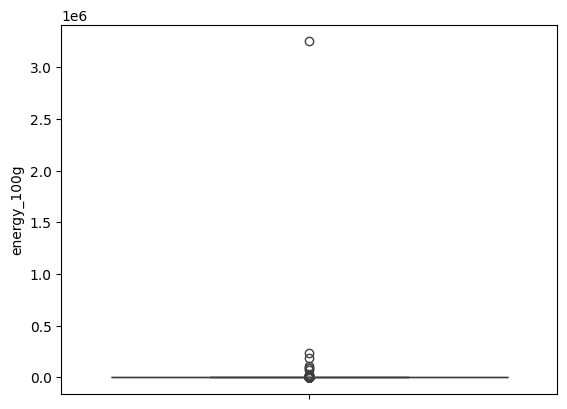

In [54]:
print(cleaned_df['energy_100g'].describe())
sns.boxplot(cleaned_df['energy_100g'])

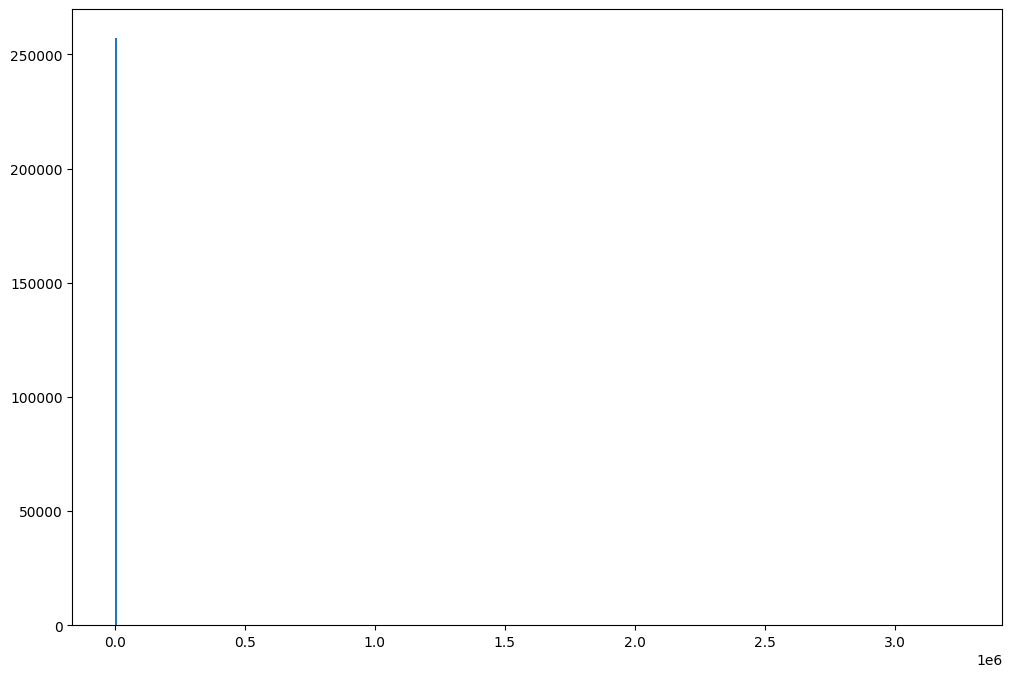

In [55]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['energy_100g'], bins = 400)
plt.show()

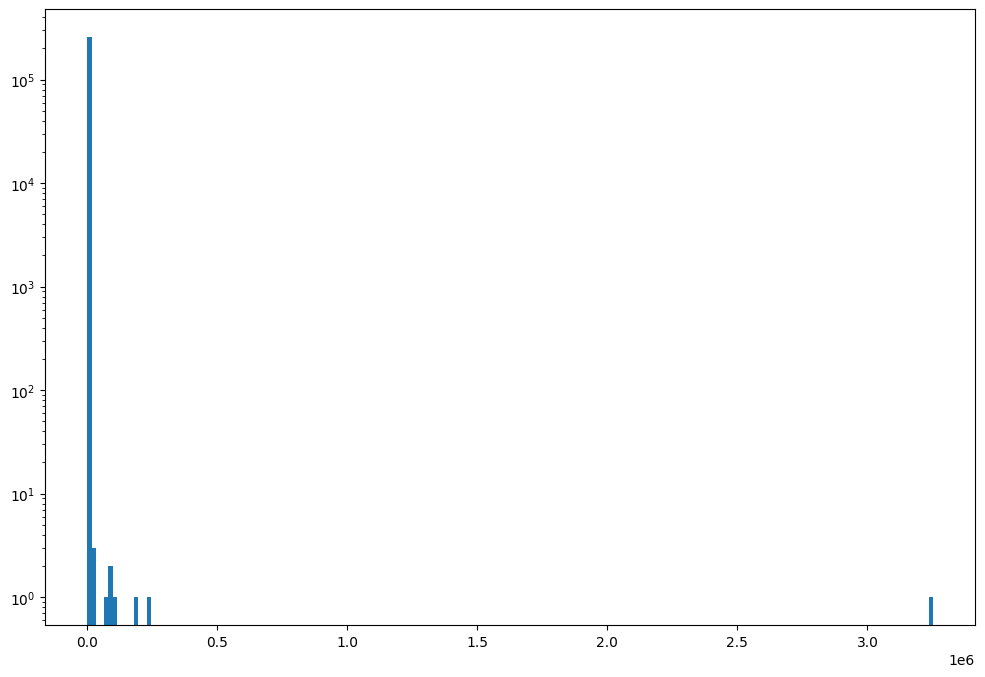

In [56]:
#Using logarithmic scale to have a better view
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['energy_100g'], bins = 200, log = True)
plt.show()

In [57]:
#Looking at the products with the highset energy score
cleaned_df.loc[cleaned_df['energy_100g'] > 1.674000e+03, ['product_name','brands','energy_100g']].sort_values(by = 'energy_100g', ascending = False).head(30)

,product_name,brands,energy_100g
212928,Pois cassés,Cora,3251373.0
313506,"Nusco, Chocolate Spread, Chocolate",Brinkers,231199.0
249101,"Légume Noisettes Carottes, 500 Grammes, Marque...",Iglo,182764.0
112681,Premium Extra Virgin Olive Oil,Eliki,110579.0
119184,"Sophia, Italian Drink, Squeezed Lime",Sophia Foods Inc.,94140.0
317171,NaN,NaN,87217.0
219302,NaN,Picard,69292.0
153704,Salsa Hot Sauce,Mayan Foods S.A. De C.V.,26861.0
176697,bubbly,dairy milk,22000.0
245311,mini choux goût fromage de chèvre - poivre,Auchan,18700.0


Outliers products in energy100 are highly energetic products, which makes sense.
The maximum value and highest outlier is associated with "Pois cassés".
After verifying other pois cassés products, we can see that it is highly unlikely that this product has this level of energy.

In [58]:
cleaned_df.loc[cleaned_df['product_name'] == 'Pois cassés'].sort_values(by = "energy_100g", ascending = False)

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
212928,Pois cassés,Cora,France,Pois cassés.,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,b,3251373.0,1.2,0.2,48.2,2.5,15.4,22.7,0.010000,0.003937,0.0
214690,Pois cassés,Le bon semeur,France,pois cassés,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,NaN,1431.0,1.4,NaN,56.8,NaN,NaN,22.8,NaN,NaN,NaN
239824,Pois cassés,Carrefour,France,Pois cassés verts (origine France).,0.0,[ pois-casses-verts -> fr:pois-casses-verts ...,0.0,a,1418.0,1.0,0.1,55.0,3.9,13.0,20.0,0.020000,0.007874,-6.0
204989,Pois cassés,Saint Eloi,France,pois cassés,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,a,1412.0,1.8,0.3,50.5,2.3,11.4,23.4,0.025400,0.010000,-6.0
199715,Pois cassés,Casino,France,pois secs cassés,0.0,[ pois-secs-casses -> fr:pois-secs-casses ] ...,0.0,a,1385.0,1.6,0.2,56.0,1.8,6.3,22.0,0.050800,0.020000,-6.0
190514,Pois cassés,Vivien paille,"Belgique,France",pois cassés,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,a,1377.0,2.1,0.3,47.6,5.3,13.2,22.6,0.040000,0.015748,-5.0
240791,Pois cassés,"Notre Jardin,Marque Repère",France,Pois cassés,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,a,1377.0,2.1,0.3,47.6,5.3,13.2,22.6,0.000035,0.000014,-5.0
185169,Pois cassés,Claire et Lucie,France,Pois cassés.,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,a,1370.0,1.4,0.2,48.0,2.5,0.0,22.0,0.010000,0.003937,-1.0
246239,Pois cassés,Auchan,France,Pois cassés,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,a,1370.0,1.4,0.2,48.0,2.5,16.0,22.0,0.010000,0.003937,-6.0
246045,Pois cassés,Auchan,France,NaN,NaN,NaN,NaN,a,1326.0,NaN,0.2,NaN,3.8,15.0,18.6,0.010000,0.003937,-7.0


In [59]:
cleaned_df.loc[cleaned_df['product_name'] == 'Olive Oil'].sort_values(by = "energy_100g", ascending = False)

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
124210,Olive Oil,B.R. Cohn,US,Ingredients: california extra virgin olive oil.,0.0,[ ingredients -> en:ingredients ] [ califor...,0.0,NaN,3824.0,100.00,14.29,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
154997,Olive Oil,Power-Selles Imports,US,"Cacho de cabra chili, salt, coriander seeds an...",0.0,[ cacho-de-cabra-chili -> en:cacho-de-cabra-c...,0.0,NaN,3736.0,93.33,13.33,0.00,NaN,NaN,0.0,NaN,NaN,NaN
131915,Olive Oil,Miguel And Valentino,US,Extra virgin olive oil.,0.0,[ extra-virgin-olive-oil -> en:extra-virgin-o...,0.0,NaN,3628.0,93.33,13.33,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
79670,Olive Oil,Panos Brands Llc,US,"Olive oil, natural extracts of garlic.",0.0,[ olive-oil -> en:olive-oil ] [ oil -> en:o...,0.0,NaN,3628.0,93.33,6.67,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
275606,Olive Oil,Olive Trade,US,"Extra virgin olive oil, pomegranate molasses.",0.0,[ extra-virgin-olive-oil -> en:extra-virgin-o...,0.0,e,3628.0,93.33,13.33,0.00,0.0,0.0,0.0,0.00000,0.000,20.0
79685,Olive Oil,Panos Brands Llc,US,"Olive oil, natural extracts of lemon.",0.0,[ olive-oil -> en:olive-oil ] [ oil -> en:o...,0.0,NaN,3628.0,93.33,6.67,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
6943,Olive Oil,Shurfine,US,Olive oil.,0.0,[ olive-oil -> en:olive-oil ] [ oil -> en:o...,0.0,NaN,3586.0,100.00,14.29,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
102200,Olive Oil,Nick Sciabica & Sons,US,California olive oil.,0.0,[ california-olive-oil -> en:california-olive...,0.0,NaN,3586.0,100.00,10.71,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
124214,Olive Oil,B.R.Cohn,US,Lime california olive oil,0.0,[ lime-california-olive-oil -> en:lime-califo...,0.0,NaN,3586.0,100.00,7.14,0.00,NaN,NaN,0.0,0.00000,0.000,NaN
305364,Olive Oil,La Rustichella,US,"Olive oil, black truffle aroma.",0.0,[ olive-oil -> en:olive-oil ] [ oil -> en:o...,0.0,NaN,3489.0,92.69,14.88,0.00,0.0,0.0,NaN,0.00000,0.000,NaN


Virgin Olive oil seems to generally have a high energy value. But none of them reach 110579.0 or higher 

In [60]:
cleaned_df.loc[cleaned_df['product_name'] == 'Chocolate', ['product_name','ingredients_text','energy_100g']].sort_values(by = "energy_100g", ascending = False)

,product_name,ingredients_text,energy_100g
283864,Chocolate,"Sugar, cocoa butter, hazelnuts (15%), whole mi...",2510.0
268831,Chocolate,"Sugar, unsweetened chocolate, whole milk powde...",2510.0
119388,Chocolate,"Cacao beans*, whole cane sugar*, cacao butter*...",2435.0
284710,Chocolate,"Organic cacao bean, organic coconut sugar, org...",2377.0
140472,Chocolate,"Sugar, hydrogenated palm kernel and palm oils,...",2347.0
11123,Chocolate,"Butter(milk), sugar, white, dark or milk choco...",2335.0
67387,Chocolate,"Sugar, cocoa butter, cocoa mass, whole milk po...",2326.0
143868,Chocolate,"Sugar, cocoa butter, dry whole milk, chocolate...",2326.0
122081,Chocolate,"Cacao bean, coconut sugar, cacao butter, espre...",2318.0
116648,Chocolate,"Fine milk chocolate 40% (sugar, whole milk pow...",2310.0


Same for chocolate products which have values higher than usual but not up to 231199

In [61]:
#Deleting product with an energy above 3 232,5
cleaned_df = cleaned_df.loc[cleaned_df['energy_100g'] < 3232.5]
cleaned_df

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000000,14.0
2,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0
3,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482000,12.0
4,Organic Polenta,Bob's Red Mill,US,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,Test NF App,NaN,en:CH,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,NaN,569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN
320757,Amandes,Biosic,France,NaN,NaN,NaN,NaN,b,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0
320763,Thé vert Earl grey,Lobodis,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,c,21.0,0.20,0.20,0.50,0.50,0.2,0.50,0.02540,0.010000,2.0
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,US,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,b,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000000,0.0


A few high values are associated with unamed products. Unamed product will be dealt with later.

count    253923.000000
mean       1095.850121
std         753.431399
min           0.000000
25%         372.000000
50%        1079.000000
75%        1653.000000
max        3230.000000
Name: energy_100g, dtype: float64


<Axes: ylabel='energy_100g'>

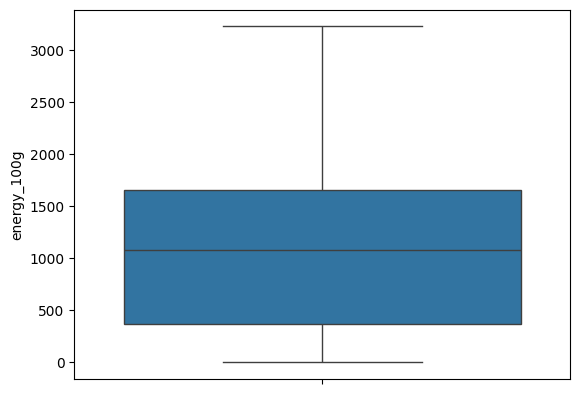

In [62]:
print(cleaned_df['energy_100g'].describe())
sns.boxplot(cleaned_df['energy_100g'])

## Fat

When looking at data description, we can see that the maximum for 100g of product is 714.29g of fat, which is not possible, it seems that a few products have not been filled correctly

In [63]:
cleaned_df.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,228075.000000,228075.000000,253923.000000,236138.000000,223339.000000,236286.000000,240127.000000,197019.000000,252582.000000,248345.000000,248311.000000,217181.000000
mean,2.027210,0.020081,1095.850121,11.698523,4.920978,32.477353,16.036931,2.843920,7.159991,2.051347,0.807725,9.136232
std,2.527436,0.141987,753.431399,14.925971,7.317936,29.063875,21.128495,4.617804,8.362393,130.087602,51.219095,9.052310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,372.000000,0.000000,0.000000,6.450000,1.400000,0.000000,0.800000,0.073660,0.029000,1.000000
50%,1.000000,0.000000,1079.000000,4.870000,1.790000,21.430000,5.880000,1.500000,4.900000,0.600000,0.236220,10.000000
75%,3.000000,0.000000,1653.000000,20.000000,7.140000,58.900000,24.100000,3.600000,10.000000,1.399540,0.551000,16.000000
max,31.000000,2.000000,3230.000000,105.000000,100.000000,209.380000,134.000000,178.000000,100.000000,64312.800000,25320.000000,40.000000


count    236138.000000
mean         11.698523
std          14.925971
min           0.000000
25%           0.000000
50%           4.870000
75%          20.000000
max         105.000000
Name: fat_100g, dtype: float64


<Axes: ylabel='fat_100g'>

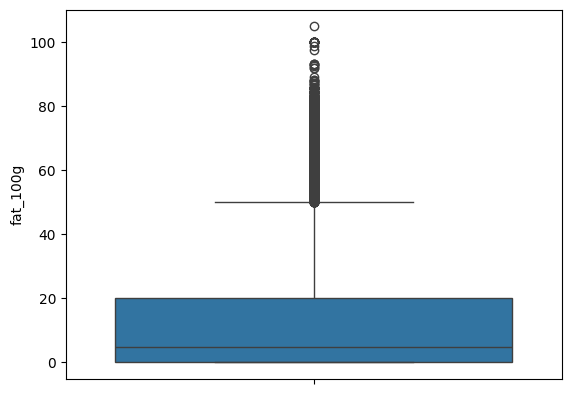

In [64]:
print(cleaned_df['fat_100g'].describe())
sns.boxplot(cleaned_df['fat_100g'])

Q3-Q1 = 20

Outliers = 50

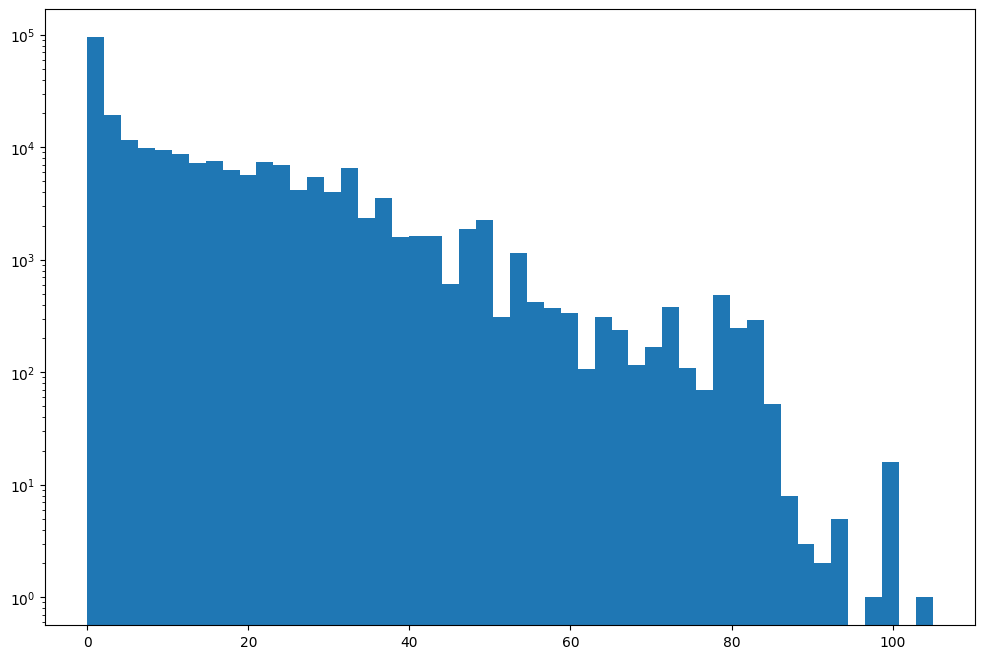

In [65]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['fat_100g'], bins = 50, log = True)
plt.show()

In [66]:
# Looking at products that have 100g of fat out of 100g of product.
cleaned_df[cleaned_df['fat_100g'] == 100].sample(10)
#In the products names and their ingredient, we can see that those are oils, it makes sense that they are only composed of fat.

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
143682,"Filipino Phil's, Swawsome Mustard",Filipino Phil's Nuclear Sauces,US,"Water, mustard seed, white wine vinegar, salt,...",1.0,[ water -> en:water ] [ mustard-seed -> en:...,0.0,d,837.0,100.0,0.0,0.0,0.0,0.0,0.0,4.826,1.900000,12.0
308344,Aceite de oliva virgen extra &quot;Esencia And...,"Esencia Andalusí,//Propiedad de://,José Serran...",en:spain,Aceite de oliva virgen extra.,0.0,[ aceite-de-oliva-virgen-extra -> es:aceite-d...,0.0,d,899.0,100.0,14.0,0.0,0.0,0.0,0.0,0.000,0.000000,12.0
302004,Rana Duetto Parmigiano Reggiano,Giovanni Rana,Suisse,NaN,NaN,NaN,NaN,e,1128.0,100.0,50.0,34.0,3.7,NaN,9.5,1.500,0.590551,19.0
76839,Complete Seasoning,La Criolla,US,"Garlic, black pepper, parsley, salt, tricalciu...",1.0,[ garlic -> en:garlic ] [ black-pepper -> e...,0.0,c,0.0,100.0,0.0,0.0,0.0,0.0,0.0,41.148,16.200000,10.0
308345,Aceite de oliva virgen extra &quot;Esencia And...,"Esencia Andalusí,//Propiedad de://,José Serran...",en:spain,Aceite de oliva virgen extra.,0.0,[ aceite-de-oliva-virgen-extra -> es:aceite-d...,0.0,c,899.0,100.0,14.0,0.0,0.0,0.0,0.0,0.000,0.000000,3.0
132068,Dallies Tombstones & Sprinkles,Xcell,US,"Sugar, modified corn starch, corn starch, frac...",7.0,[ sugar -> en:sugar ] [ modified-corn-starc...,0.0,d,1674.0,100.0,0.0,80.0,60.0,0.0,0.0,0.000,0.000000,14.0
308346,Aceite de oliva virgen extra &quot;Esencia And...,"Esencia Andalusí,//Propiedad de://,José Serran...",en:spain,Aceite de oliva virgen extra.,0.0,[ aceite-de-oliva-virgen-extra -> es:aceite-d...,0.0,c,899.0,100.0,14.0,0.0,0.0,0.0,0.0,0.000,0.000000,3.0
308349,Aceite de oliva virgen extra &quot;Esencia And...,"Esencia Andalusí,//Propiedad de://,José Serran...",en:spain,Aceite de oliva virgen extra.,0.0,[ aceite-de-oliva-virgen-extra -> es:aceite-d...,0.0,c,899.0,100.0,14.0,0.0,0.0,0.0,0.0,0.000,0.000000,3.0
308347,Aceite de oliva virgen extra &quot;Esencia And...,"Esencia Andalusí,//Propiedad de://,José Serran...",en:spain,Aceite de oliva virgen extra.,0.0,[ aceite-de-oliva-virgen-extra -> es:aceite-d...,0.0,d,899.0,100.0,14.0,0.0,0.0,0.0,0.0,0.000,0.000000,12.0
206499,Beurre d'Isigny extra-fin doux,Itineraire des saveurs,France,"crème de lait pasteurisé,ferments lactiques.",0.0,[ creme-de-lait-pasteurise -> fr:creme-de-lai...,0.0,d,3109.0,100.0,59.0,NaN,0.6,0.0,0.7,0.080,0.031496,18.0


In [67]:
# Looking at products with more than 100g of fat
cleaned_df[cleaned_df['fat_100g'] > 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
305054,Graine de couscous moyen,La méditerranéa,France,NaN,NaN,NaN,NaN,a,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0


Out of 4, two of them are oils and 2 of them are other products that definitely don't contain only fat. Since 2 of them are not oils, I can't handle these outliser by assigning 100 to any product that have more than 100g of fat for 100g of products. There are only 4 products, so those will be deleted.

In [68]:
#Deleting lines with a fat rate above 100g
cleaned_df = cleaned_df.loc[cleaned_df['fat_100g'] <= 100 ]

In [69]:
#Checking
cleaned_df.loc[cleaned_df['fat_100g'] > 100 ]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


## Saturated fat

saturated-fat_100g

When looking at data description, we can see that the maximum for 100g of product is 550g of fat, which is not possible, it seems that a few products have not been filled correctly

count    206297.000000
mean          4.876666
std           7.166635
min           0.000000
25%           0.000000
50%           1.790000
75%           7.140000
max          98.000000
Name: saturated-fat_100g, dtype: float64


<Axes: ylabel='saturated-fat_100g'>

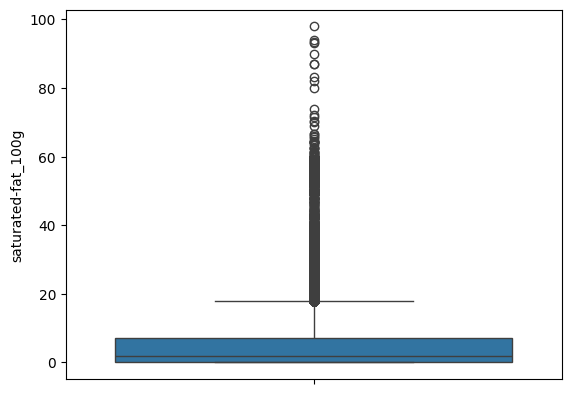

In [70]:
print(cleaned_df['saturated-fat_100g'].describe())
sns.boxplot(cleaned_df['saturated-fat_100g'])

After the previous treatment, there are no more products with a saturated fat rate superior to 100g.

Outliers : 

IQR = 7.14

7.14*1.5 = 10.71

Q3 + (1,5*IQR) = 7.14 + 10.71 = 17.85

All products above 17.85 are outliers

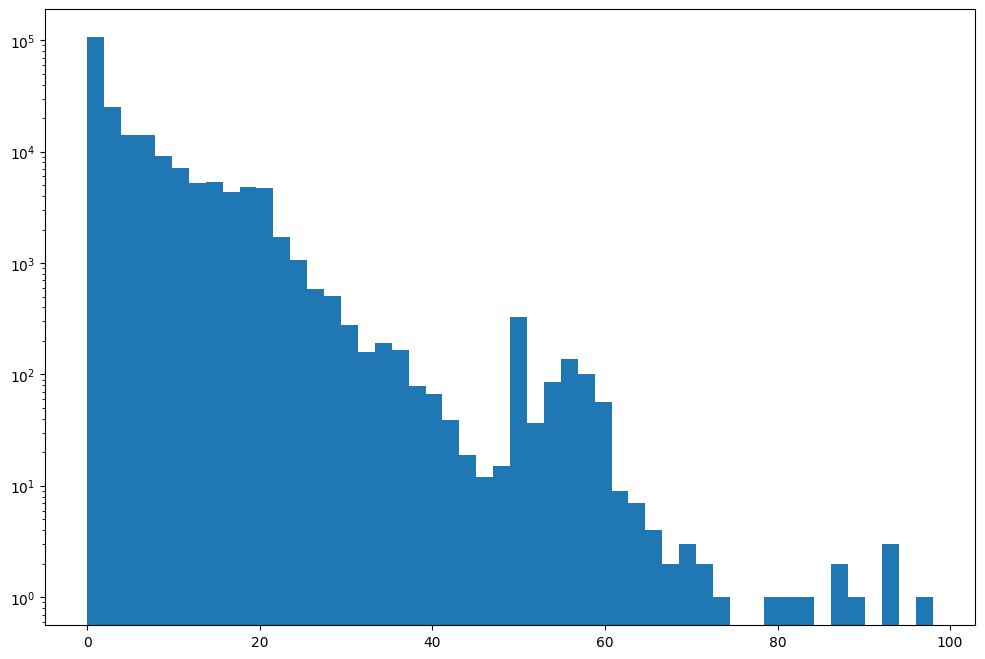

In [71]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['saturated-fat_100g'], bins = 50, log = True)
plt.show()

In [72]:
cleaned_df.loc[cleaned_df['saturated-fat_100g'] > 17.85, ['product_name','brands','saturated-fat_100g']]

,product_name,brands,saturated-fat_100g
1,Banana Chips Sweetened (Whole),NaN,28.57
8,Organic Dark Chocolate Minis,Equal Exchange,22.50
17,Organic Sweetened Banana Chips,Unfi,23.33
30,Organic Medium Shredded Coconut,Unfi,26.67
32,Dark Chocolate Coconut Chews,Sunridge,25.00
...,...,...,...
320356,33% Cocoa Macadamia Block,Whittaker's,18.30
320392,Dark Compound Chocolate Drops,Pams,25.30
320589,Lait de Coco,Ayam,18.00
320598,Crème de Coco,Ayam,22.00


In [73]:
cleaned_df.loc[cleaned_df['saturated-fat_100g'] > 17.85, ['product_name','brands','saturated-fat_100g']].sample(35)

,product_name,brands,saturated-fat_100g
182805,bleu d'Auvergne AOC,sans marque,22.00
140475,"Squares Chocolates, Eggnog","Ghirardelli Chocolate, Ghirardelli Chocolate ...",22.73
165611,Flaky Dough,Baklava Unlimited,20.93
83699,Sharp Cheddar Natural Shredded Cheese,Key Food,17.86
208296,La Motte d'Antan Beurre de baratte Doux,Le Gall,53.00
137633,"Posh Chocolat, Milk Chocolate",Aqualink Nevada Llc,21.54
53014,Buttercrunch Toffee With Almonds,Brown & Haley,22.22
222665,8 Pains au Chocolat pur beurre,La Boulangère,17.90
90694,"Garlic Jack, Monterey Jack Cheese With Garlic","Crystal Farms, Milton G. Waldbaum Company",17.86
68712,Extra Sharp Cheddar Cheese,"Best Choice, Associated Wholesale Grocers Inc.",17.86


Products with the most saturated fat are from coconut (oil,milk...), chocolate and cheese.
According to food and science websites, aliments that are a high source of saturated fat are indeed vegetal oils, meat, chocolate and most cheeses. It would make sense to keep those outliers.

In [74]:
#Looking at products that are above 100g of saturated fat for 100g of produtcs
cleaned_df.loc[cleaned_df['saturated-fat_100g'] == 100, ['product_name','brands','ingredients_text','saturated-fat_100g']]

,product_name,brands,ingredients_text,saturated-fat_100g


Products with 100g of saturated fat are indeed product with a high number of saturated fat (coconut oil, coprah oil) those products will be kept as is.

## Carbohydrates

carbohydrates_100g

count    235507.000000
mean         32.474268
std          29.052285
min           0.000000
25%           6.450000
50%          21.430000
75%          58.820000
max         164.000000
Name: carbohydrates_100g, dtype: float64


<Axes: ylabel='carbohydrates_100g'>

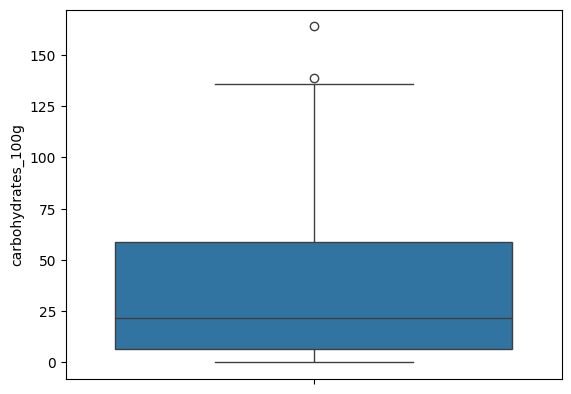

In [75]:
print(cleaned_df['carbohydrates_100g'].describe())
sns.boxplot(cleaned_df['carbohydrates_100g'])

IQR = 52.33

1.5*IQR = 78,495

Outliers = 58.33 + 78.495 = values above 136,825. But values above 136 are already impossible.

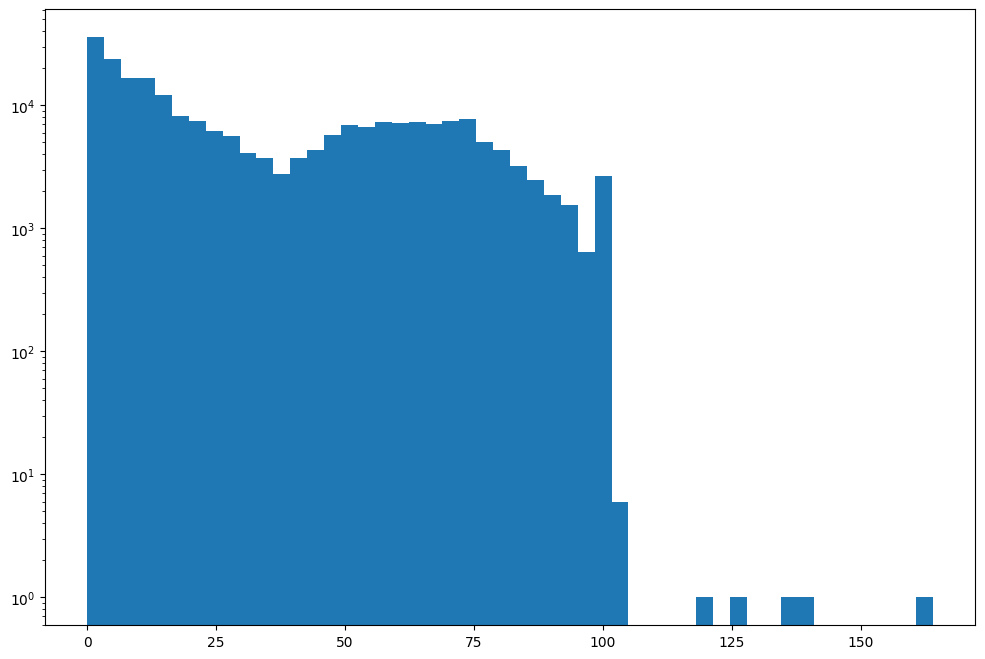

In [76]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['carbohydrates_100g'], bins = 50, log = True)
plt.show()

In [77]:
#Looking at 100
cleaned_df.loc[cleaned_df['carbohydrates_100g'] == 100, ['product_name','brands','carbohydrates_100g']].sample(25)

,product_name,brands,carbohydrates_100g
122197,Lollipops,Original Gurmet,100.0
143689,Pirulicos Candy,Mara,100.0
76199,Hamburger Seasoning,Bolner's Products Inc,100.0
157439,Candy,Jake,100.0
21569,"Candy Break, Cinnamon Imperial Hearts",American Food Products Inc,100.0
46662,Light Brown Sugar,Springfield,100.0
19994,"Organic Powdered Sugar, All Purpose Natural Sw...",Hain Pure Foods,100.0
62681,"Atomic Fire Ball, Candy","Sweet Smiles, Warner Candy Co. Inc.",100.0
45523,Panela Brown Sugar Cane,Goya Foods Inc.,100.0
17544,"Kitchens, Fine Granulated Sugar",Signature,100.0


Products with 100g of carb are surgars and syrups. Makes sense, products will be kept.

In [78]:
#Looking at outliers
cleaned_df.loc[cleaned_df['carbohydrates_100g'] > 100, ['product_name','brands','carbohydrates_100g']]

,product_name,brands,carbohydrates_100g
73668,Icing Decorations,Wilton,120.0
111566,Tomato Ketchup,Heinz,136.0
133567,Mango Jalapeno,California Flavored Nuts,125.0
155609,Beurre d'érable,NaN,164.0
202571,Sirop d'Agave brun bio,Bjorg,104.0
260598,Agave Syrup dark,Allos,103.5
260599,Sirop d agave pur,Allos,103.5
260611,Agavendicksaft,Allos,103.5
265108,Agavendicksaft,enerBIO,103.5
265110,Agavendicksaft Dunkel,ener Bio,103.0


In [79]:
cleaned_df.loc[cleaned_df['carbohydrates_100g'] > 100, ['product_name','brands','carbohydrates_100g']].count()

product_name          12
brands                12
carbohydrates_100g    13
dtype: int64

15 products are identified, products like butter or syrups are mainly composed of carbohydrates (sugars), Ketchup and tamarind juice also has a lot of carbohydrates (according to scientific websites) it would make sense to attribute a value of 100g per 100g of product like others sugar based products

I will attribute a value of 100g to all products above 100.

In [80]:
cleaned_df['carbohydrates_100g'].describe()

count    235507.000000
mean         32.474268
std          29.052285
min           0.000000
25%           6.450000
50%          21.430000
75%          58.820000
max         164.000000
Name: carbohydrates_100g, dtype: float64

In [81]:
cleaned_df.loc[cleaned_df['carbohydrates_100g'] > 85, ['product_name','brands','carbohydrates_100g']].sort_values(by = 'carbohydrates_100g')

,product_name,brands,carbohydrates_100g
307676,Rice,Ecobasics,85.08
181277,Long grain rice,Simply...,85.10
311996,Flocons de maïs sucrés,Dia,85.10
312212,Piñones,Alteza,85.10
240824,Sirop de framboise pur sucre,"Frucci,Marque Repère",85.10
...,...,...,...
73668,Icing Decorations,Wilton,120.00
133567,Mango Jalapeno,California Flavored Nuts,125.00
111566,Tomato Ketchup,Heinz,136.00
317635,Banane sèche,Vinawang,139.00


In [82]:
#Turning all products above 100g of carbohydrates into 100g
cleaned_df['carbohydrates_100g'] = cleaned_df['carbohydrates_100g'].apply(lambda x : 100 if x > 100 else x)

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_1518/2564410149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['carbohydrates_100g'] = cleaned_df['carbohydrates_100g'].apply(lambda x : 100 if x > 100 else x)


In [83]:
#Checking
cleaned_df.loc[cleaned_df['carbohydrates_100g'] > 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


## Sugar

While looking at the data description at the beggining of the section, we can see that a few variables have negative values for sugar, fibers and proteins, which seems unlikely, there can be very few sugar, fibers or protein but a negative value is impossible.

The nutriscore is calulated in a way that the lowest it is, the better the product, however the lowest possible value is 0. So a negative value is impossible.

In [84]:
cleaned_df[['sugars_100g','fiber_100g','proteins_100g']].describe()

,sugars_100g,fiber_100g,proteins_100g
count,222732.000000,179881.000000,235263.000000
mean,16.107012,2.904661,7.099912
std,21.153657,4.521883,8.306070
min,-17.860000,-6.700000,-800.000000
25%,1.430000,0.000000,0.720000
50%,5.900000,1.600000,4.800000
75%,24.390000,3.600000,10.000000
max,134.000000,178.000000,100.000000


sugars_100g

<Axes: ylabel='sugars_100g'>

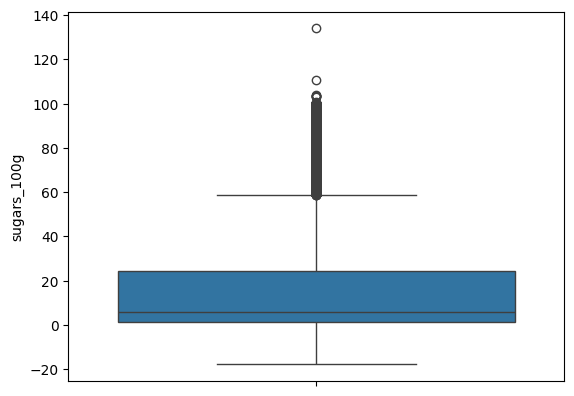

In [85]:
sns.boxplot(cleaned_df['sugars_100g'])

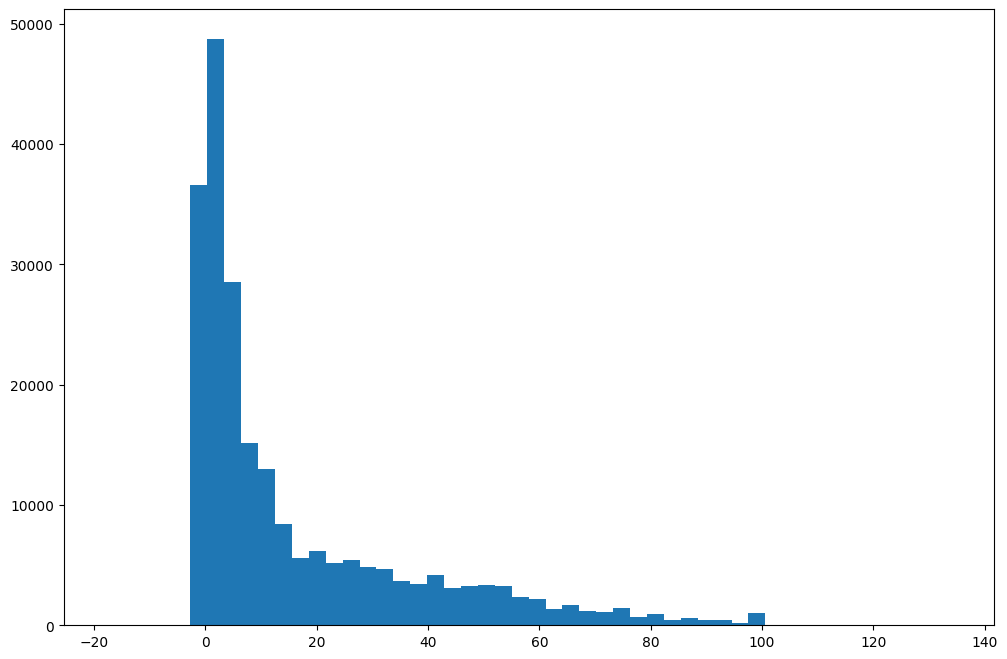

In [86]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['sugars_100g'], bins = 50)
plt.show()

### Outliers below 0

In [87]:
#Looking at values under 0
cleaned_df.loc[cleaned_df['sugars_100g'] < 0, ['product_name','brands','sugars_100g']]

,product_name,brands,sugars_100g
8582,Grade A Fancy Chopped Spinach,Spartan,-1.20
18209,"Select, Spicy Red Bell Pepper Pasta Sauce",Signature,-0.80
117739,"Hummous, Black Truffle",The Wild Pea,-3.57
146284,Crackers,Partners A Tasteful Choice Company,-6.67
150858,"Italianavera, Tomato Sauce With Gaeta Olives &...",Italiana Vera Srl,-6.25
164030,Organic Pumpkin Seeds,Cb's Nuts,-17.86
195761,Caprice des dieux,Caprice des Dieux,-0.10


Some products may not have sugar (spinach and crackers) but others have sugar like pasta sauce, hummous or caprice des dieux.

When looking at the product's composition on OpenFood facts or other website, we can see that the wrong sign has been attributed to the right value. 
Grade A Fancy Chopped Spinach actually contains 1.20g of sugar in 100g of product.

Other products don't display the same numbers at all for 100g of products : Caprice des dieux
Other products are not in the database anymore : Select, Spicy Red Bell Pepper Pasta Sauce, Hummous, Black Truffle, Crackers Partners and their nutritionnal information could not be found even on otehr websites.

Considering the fact that most of those products nutritionnal information could not be found, I will not reverse the sign for all products and will delete them to avoid false information in the dataset.

In [88]:
#Deleting products with negative sugar values
cleaned_df = cleaned_df.loc[cleaned_df['sugars_100g'] > 0]

In [89]:
#Checking
cleaned_df.loc[cleaned_df['sugars_100g'] < 0]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


### Outliers above 100

In [90]:
#Looking at outliers
#IQR 22,7
#IQR * 1.5 = 34,05
#Outliers : 58,8
cleaned_df.loc[cleaned_df['sugars_100g'] >= 100]
#Products with 100g of sugar are only made of sugar : raw cane sugar, pure sugar etc.. (makes sense)

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
399,Tnt Exploding Candy,Angry Birds,US,"Sucrose, lactose (milk), corn syrup solids, na...",1.0,[ sucrose -> en:sucrose ] [ lactose -> en:l...,0.0,d,1393.0,0.0,0.0,100.0,100.0,NaN,0.0,0.00000,0.000000,14.0
400,Exploding Candy,Angry Birds,US,"Sucrose, lactose (milk), corn syrup solids, na...",1.0,[ sucrose -> en:sucrose ] [ lactose -> en:l...,0.0,d,1393.0,0.0,0.0,100.0,100.0,NaN,0.0,0.00000,0.000000,14.0
401,Exploding Candy,Angry Birds,US,"Sucrose, lactose (milk), corn syrup solids, na...",2.0,[ sucrose -> en:sucrose ] [ lactose -> en:l...,0.0,d,1393.0,0.0,0.0,100.0,100.0,NaN,0.0,0.00000,0.000000,14.0
2905,"Dessert Topping, Red Sugar",Kroeger,US,"Sugar, confectioner's glaze, red 3, carnauba w...",3.0,[ sugar -> en:sugar ] [ confectioner-s-glaz...,0.0,NaN,1569.0,0.0,NaN,100.0,100.0,NaN,0.0,0.00000,0.000000,NaN
2906,Green Sugar Dessert Toppings,Kroger,US,"Sugar, yellow 5 lake, confectioner's glaze, bl...",1.0,[ sugar -> en:sugar ] [ yellow-5-lake -> en...,0.0,NaN,1569.0,0.0,NaN,100.0,100.0,NaN,0.0,0.00000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315621,NaN,Sodastream,France,NaN,NaN,NaN,NaN,d,1714.0,0.0,0.0,100.0,100.8,0.0,0.0,0.42672,0.168000,16.0
315922,"Iq Accessories, Inc., Sprinkles",Iq Accessories Inc.,US,"Sugar, fd&c red 3 and carnauba wax.",1.0,[ sugar -> en:sugar ] [ fd-c-red-3-and-carn...,0.0,NaN,1674.0,0.0,NaN,100.0,100.0,NaN,0.0,0.00000,0.000000,NaN
315942,Sucre Vanilliné,"Alsa,Unilever",France,"Sucre, arôme vanille.",0.0,[ sucre -> fr:sucre ] [ arome-vanille -> fr...,0.0,d,1700.0,0.1,0.1,100.0,100.0,NaN,0.1,0.01300,0.005118,15.0
318708,Australian White Sugar,Coles,Australia,Australian Cane Sugar,0.0,[ australian-cane-sugar -> en:australian-cane...,0.0,NaN,1700.0,0.0,NaN,100.0,100.0,NaN,0.0,0.01270,0.005000,NaN


In [91]:
#Looking at products above 100
cleaned_df.loc[cleaned_df['sugars_100g'] > 100, ['product_name','brands','sugars_100g']]
#Ketchup a déjà été mit à 100 de carbohydrate (sont des sucres)

,product_name,brands,sugars_100g
111566,Tomato Ketchup,Heinz,134.00
133567,Mango Jalapeno,California Flavored Nuts,110.71
202571,Sirop d'Agave brun bio,Bjorg,104.00
260598,Agave Syrup dark,Allos,103.50
260599,Sirop d agave pur,Allos,103.50
260611,Agavendicksaft,Allos,103.50
265108,Agavendicksaft,enerBIO,103.50
265110,Agavendicksaft Dunkel,ener Bio,103.00
315621,NaN,Sodastream,100.80


This list is similar to the list of products with more than 100g of carbohydrates 

All products in the sugar above 100 list can be found in the carbohydrates above 100 list.

Since sugar is a carbohydrate, I will also turn values above 100g to 100g for the sugar variable (as I did in carbohydrates).

A carbohydrate is a biomolecule consisting of carbon (C), hydrogen (H) and oxygen (O) atoms.
The term is most common in biochemistry, where it is a synonym of saccharide, a group that includes sugars, starch, and cellulose.
https://en.wikipedia.org/wiki/Carbohydrate

In [92]:
#Turning all products above 100g of sugar into 100g
cleaned_df['sugars_100g'] = cleaned_df['sugars_100g'].apply(lambda x: 100 if x > 100 else x)

In [93]:
#Checking
cleaned_df.loc[cleaned_df['sugars_100g'] > 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


## Fiber

fiber_100g

count    150297.000000
mean          2.945953
std           4.145570
min           0.000000
25%           0.000000
50%           1.800000
75%           3.600000
max         178.000000
Name: fiber_100g, dtype: float64


<Axes: ylabel='fiber_100g'>

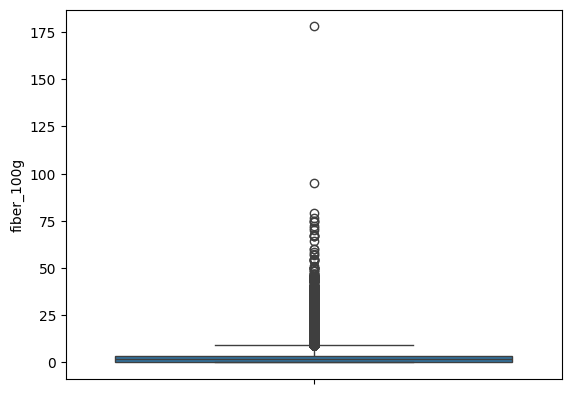

In [94]:
print(cleaned_df['fiber_100g'].describe())
sns.boxplot(cleaned_df['fiber_100g'])

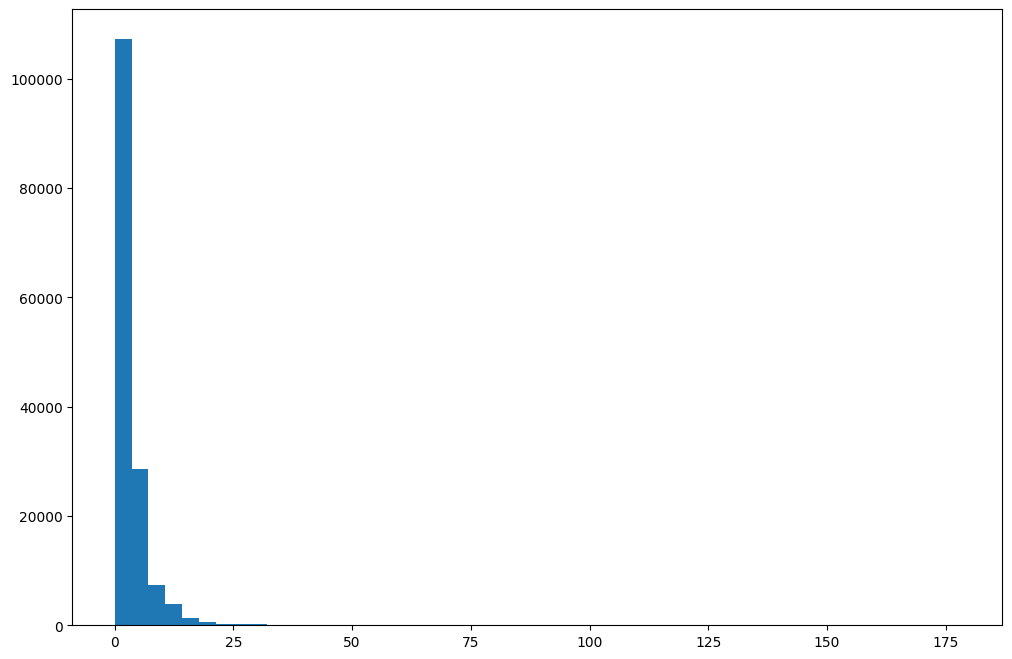

In [95]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['fiber_100g'], bins = 50)
plt.show()

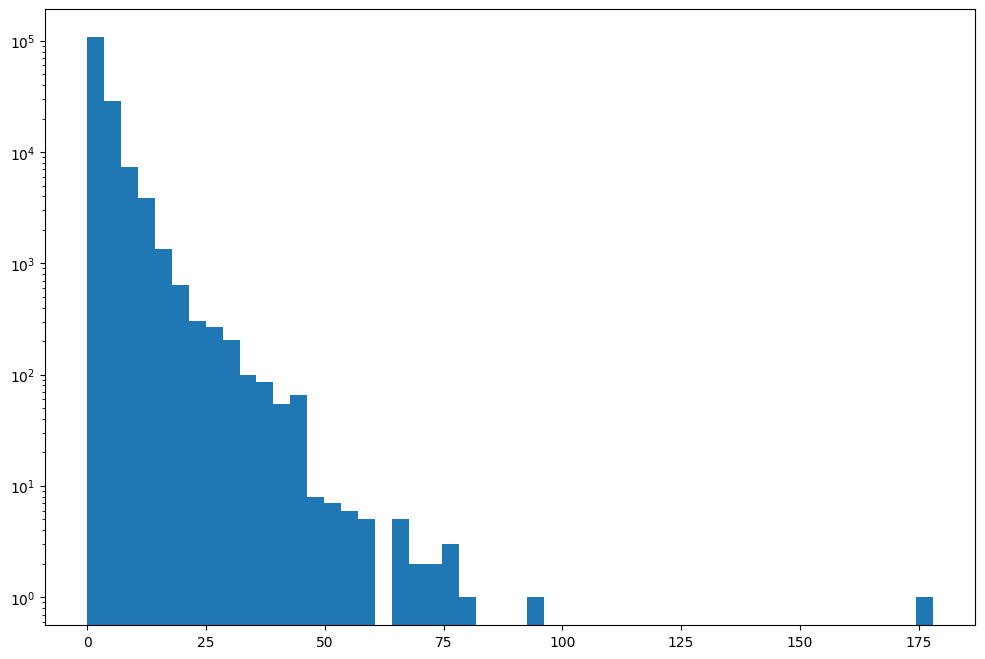

In [96]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['fiber_100g'], bins = 50, log = True)
plt.show()

No more products below 0

### Outliers with 100 or above

In [97]:
pd.set_option('display.max_colwidth', None)
cleaned_df.loc[cleaned_df['fiber_100g'] >= 100, ['product_name','brands','ingredients_text','fiber_100g']]

,product_name,brands,ingredients_text,fiber_100g
298897,Milka Schmunzelhase Alpenmilch 175G,Mondelez,"entnalten. (Oingrealents: e , vuul écrémé, pâte de cacao, lactosérum en poudre (de lait), beurre concentré, émulsifiant (lécithine de soja), pâte de noisettes, arôme. Cacao: 30% minimum. Peut contenir autres fruits à coque et blé.",178.0


None of these products are enterely made of fibers (or even contain any fiber).
I will delete products with 100g or more of fiber.

In [98]:
#Looking at product between 70 and 100g of fiber
cleaned_df.loc[(cleaned_df['fiber_100g'] >= 70) & (cleaned_df['fiber_100g'] < 100), ['product_name','brands','ingredients_text','fiber_100g']]

,product_name,brands,ingredients_text,fiber_100g
34441,Swiss Bittersweet Fine Dark Chocolate,"Lindt, Lindt & Sprungli (Schweiz) Ag","Sugar, chocolate, cocoa butter, soya lecithin (emulsifier), vanilla",70.0
101645,Huckle Bunny With Gumball,"Hilco, Hilco Llc","Dextrose, sucrose, chewing gum base, glucose syrup, flavourings, glycerin, modified starch, colours: e102, e110, e133, e171. glazing agents: carnauba wax, shellac, antioxidant e321.",74.1
147988,Sunflower Seed Sprouties Savory,Gopals Inc.,"Ingredients: organic sunflower seeds,organic tumeric,organic lemon,organic ginger,organic cayenne and stone ground himalayan crystal salt",75.0
198199,Agar-Agar,Vahiné,Agar-agar,75.0
253458,Tisane à sucer Gentiane Citron,"Bioforez,Tisane à sucer,biopastille","Gomme acacia, gentiane (1,6%), agent de charge: carbonate de magnésium, huile essentielle de citron (0,6%), beurre de cacao (0,3%)",72.1
284470,Nâmmèo Oreilles de Judas Séchées,NaN,Oreilles de Judas,79.0
294612,NaN,NaN,"sirop de maltitol, gélatine alimentaire, gélifiant: gomme arabique, acidifiant: acide citrique, concentré de jus de framboise, humectant: glycérol, arôme naturel, vitamine C, huile de palmiste, huile de coco, aliments colorants: carottes et cassis, édulcorant : sucralose, agents d'enrobage : cire de carnauba et cire d'abeilles.",71.0
300529,Quaker Cereal Mix Iogurte com Frutas Vermelhas,"Quaker,Pepsico","aveia em flocos, açúcar, flocos de arroz, preparado de frutas vermelhas (polpa de maçã, polpa de morango, polpa de framboesa, açúcar invertido, farinha de arroz, amido modificado, aromatizante, acidulante ácido cítrico, estabilizante goma xantana, corante natural carmim), iogurte em pó, aromatizantes, corante natural carmim, estabilizantes (goma guar, carboximetilcelulose sódica)",76.7
304399,Agar-agar,"La Finestra sul Cielo,//Propiedad de://,La Finestra sul Cielo S.P.A.,//Perteneciente a://,Idea Team S.R.L.",Extracto de algas marinas agar-agar.,94.8


In [99]:
#Resetting colwidth
pd.reset_option('display.max_colwidth')

In [100]:
#Deleting products above 100g of fiber.
cleaned_df = cleaned_df.loc[cleaned_df['fiber_100g'] < 100]

In [101]:
#Checking
cleaned_df.loc[cleaned_df['fiber_100g'] > 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


## Proteins

proteins_100g

count    149959.000000
mean          6.767096
std           6.934652
min          -3.570000
25%           1.770000
50%           5.000000
75%           9.410000
max         100.000000
Name: proteins_100g, dtype: float64


<Axes: ylabel='proteins_100g'>

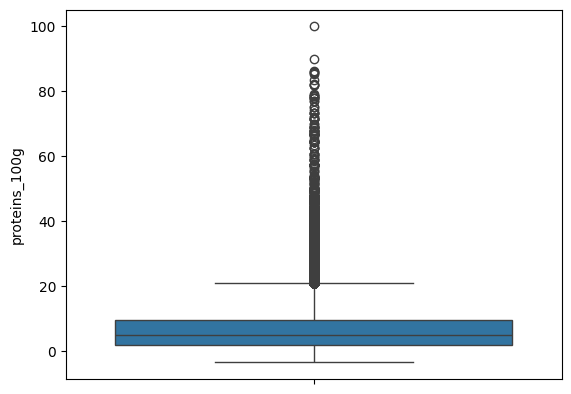

In [102]:
print(cleaned_df['proteins_100g'].describe())
sns.boxplot(cleaned_df['proteins_100g'])
#Contains negative values

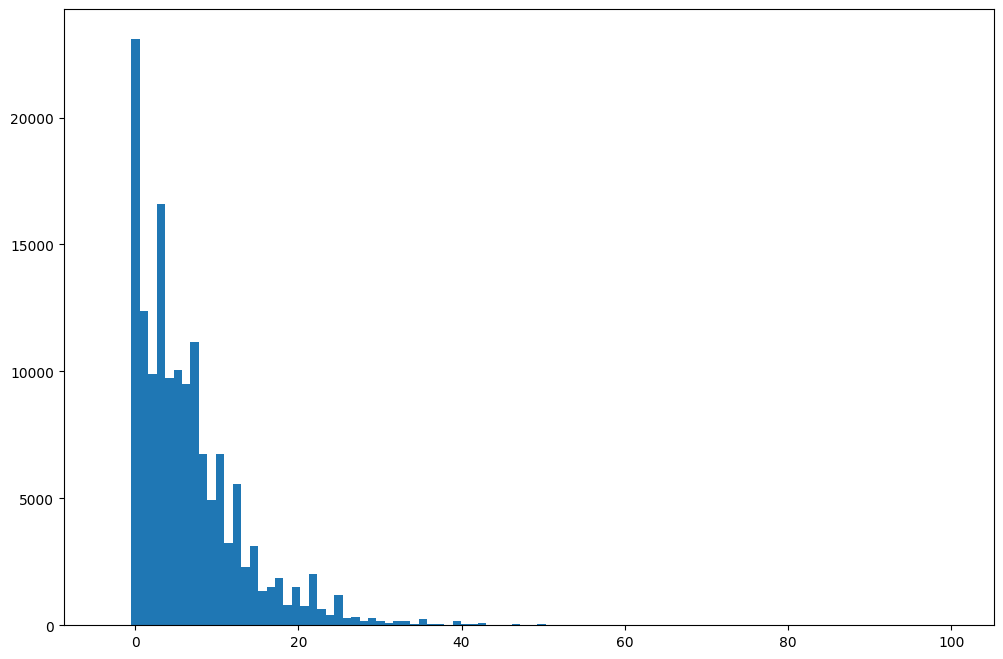

In [103]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['proteins_100g'], bins = 100)
plt.show()

### Outliers below 0

In [104]:
cleaned_df.loc[cleaned_df['proteins_100g'] < 0, ['product_name','brands','ingredients_text','proteins_100g']]

,product_name,brands,ingredients_text,proteins_100g
33781,Whole Cashews,Food Club,"Cashews, vegetable oil (peanut, cottonseed, so...",-3.57


Only one product left, when looking at its proteins value on the internet, it indicates 5g. Since other mistakes might have been made, product will be deleted.

In [105]:
#Deleting products with protein rate below 0
cleaned_df = cleaned_df.loc[cleaned_df['proteins_100g'] > 0]

In [106]:
#Checking 
cleaned_df.loc[cleaned_df['proteins_100g'] < 0]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


### Outliers above 100 

IQR=9.3
IQR*1.5 = 13.95
Outliers = 23.95

In [107]:
cleaned_df.loc[cleaned_df['proteins_100g'] > 23.95, ['product_name','brands','ingredients_text','proteins_100g']]

,product_name,brands,ingredients_text,proteins_100g
55,Organic Yellow Split Peas,Unfi,Organic yellow split peas,28.89
80,"Peanuts, Mixed Nuts",Northgate Market,"Peanuts, honey, coating (sucrose, wheat starch...",25.00
85,"Foods, Spanish Peanuts","Kettle, Kettle Foods","Spanish peanuts, expeller pressed high monouns...",28.57
94,Unsalted Dry Roasted Almonds,Unfi,Dry roasted almonds.,26.67
95,Organic Raw Pumpkin Seeds,Pcc,Organic pumpkin seeds,30.00
...,...,...,...,...
319966,Carman's Greek Style Yoghurt & Berry Gourmet P...,Carman's,"Nuls 26% (Peanuts, AImonds), Soy Protein Blend...",25.90
320183,Ultra low carb choc mocha delight,bodytrim,"Protein Blend (_Soy_ Protein Isolate, Whey Pro...",28.40
320299,Vegemite,"Mondelez Australia,Kraft",yeast extract (from yeast grown on _barley_ an...,25.40
320333,ETA Crunchy Peanut Butter,ETA,"Peanuts, Vegetable Oil, Salt, _soy_",25.10


In [108]:
cleaned_df.loc[cleaned_df['proteins_100g'] >= 100, ['product_name','brands','ingredients_text','proteins_100g']]

,product_name,brands,ingredients_text,proteins_100g
150075,Tcho-A-Day Dark Chocolate,Tcho,"Cacao beans*, cane sugar*, cocoa butter*, soy ...",100.0


Only one product left, will be deleted

In [109]:
#Deleting products with more than 100g proteins
cleaned_df = cleaned_df.loc[cleaned_df['proteins_100g'] < 100]

In [110]:
#Checking
cleaned_df.loc[cleaned_df['proteins_100g'] > 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


## Nutriscore

nutrition-score-fr_100g

According to the data description, the nutriscore is calculated using Professor Hercberg's formula.
The lower the score, the better the product.

The formula attributes scores from -15 to +40.

Although there are some outliers, they will be kept because products with high nutriscores (not healthy) are products like dehydrated coffee or coffee pods, and products with low scores are organic or healthy products.

The distribution stays between -15 and 40.


count    128828.000000
mean          8.623133
std           9.159739
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          37.000000
Name: nutrition-score-fr_100g, dtype: float64


<Axes: ylabel='nutrition-score-fr_100g'>

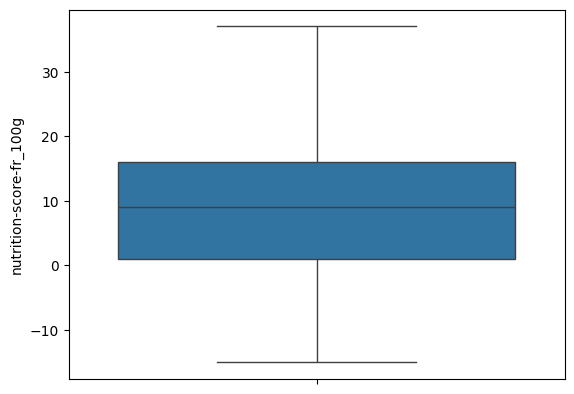

In [111]:
print(cleaned_df['nutrition-score-fr_100g'].describe())
sns.boxplot(cleaned_df['nutrition-score-fr_100g'])

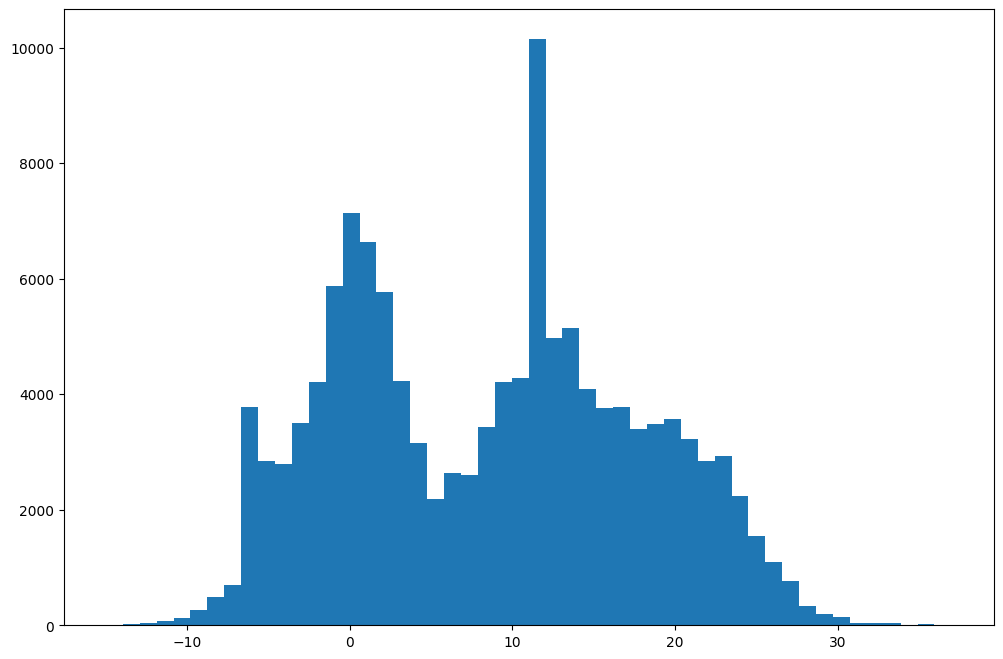

In [112]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['nutrition-score-fr_100g'], bins = 50)
plt.show()

In [113]:
cleaned_df.loc[cleaned_df['nutrition-score-fr_100g'] < 0]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
19,Organic Oat Groats,Pcc,US,Organic oat groats,0.0,[ organic-oat-groats -> en:organic-oat-groats...,0.0,a,1096.0,5.95,1.19,66.67,2.38,9.5,16.67,0.02540,0.010000,-6.0
34,"Organic Unsweetened Granola, Cinnamon Almond",New England Naturals,US,"Organic whole rolled oates, organic raisins, o...",0.0,[ organic-whole-rolled-oates -> en:organic-wh...,0.0,a,1887.0,21.57,3.92,58.82,3.92,9.8,11.76,0.27432,0.108000,-1.0
61,Maple Almond Granola,Golden Temple,US,"Whole rolled oats, milled cane sugar, vegetabl...",0.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,0.0,a,1904.0,14.55,1.82,67.27,12.73,9.1,10.91,0.25400,0.100000,-1.0
118,Swiss-Style Muesli,Grizzlies,US,"Rolled oats, rolled wheat, rolled rye, date pi...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,a,1749.0,16.36,1.82,60.00,16.36,10.9,12.73,0.02286,0.009000,-1.0
173,Fresh Organic Carrots,Bunny-Luv,US,Fresh organic carrots,0.0,[ fresh-organic-carrots -> en:fresh-organic-c...,0.0,a,159.0,0.00,0.00,8.97,6.41,2.6,1.28,0.19558,0.077000,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320497,Cœurs de palmier,Waini River,France,"Cœurs de palmier sauvage*, eau, sel, acidifian...",0.0,[ coeurs-de-palmier-sauvage -> en:coeurs-de-p...,0.0,a,89.0,0.00,0.00,1.40,0.20,2.5,2.30,0.76000,0.299213,-1.0
320568,Soya Milk,Soyfresh,New Zealand,NaN,NaN,NaN,NaN,a,176.0,2.00,0.40,3.30,3.00,0.0,2.60,0.12954,0.051000,-1.0
320587,Baked Beans In Tomato Sauce,Ayam,US,"Water, us-grown great northern beans, sugar, t...",0.0,[ water -> en:water ] [ us-grown-great-nort...,0.0,a,418.0,0.77,0.00,19.23,7.69,3.8,3.85,0.76200,0.300000,-2.0
320742,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.03048,0.012000,-1.0


There are a lot of products with a nutriscore below 0. According to their ingredients, those products seem to be healthy

In [114]:
pd.set_option('display.max_colwidth', None)
cleaned_df.loc[cleaned_df['nutrition-score-fr_100g'] > 35]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
55855,Cappuccino Decaffeinated,Tassimo,US,"Milk, water, decaffeinated arabica coffee, cream, sugar, contains less than 2% of natural flavor, salt, sodium phosphate.",1.0,[ milk -> en:milk ] [ water -> en:water ] [ decaffeinated-arabica-coffee -> en:decaffeinated-arabica-coffee ] [ arabica-coffee -> en:arabica-coffee ] [ coffee -> en:coffee ] [ cream -> en:cream ] [ sugar -> en:sugar ] [ contains-less-than-2-of-natural-flavor -> en:contains-less-than-2-of-natural-flavor ] [ less-than-2-of-natural-flavor -> en:less-than-2-of-natural-flavor ] [ than-2-of-natural-flavor -> en:than-2-of-natural-flavor ] [ 2-of-natural-flavor -> en:2-of-natural-flavor ] [ of-natural-flavor -> en:of-natural-flavor ] [ natural-flavor -> en:natural-flavor ] [ flavor -> en:flavor ] [ salt -> en:salt ] [ sodium-phosphate -> en:e339iii -> exists -- ok ],0.0,e,3138.0,56.25,37.50,37.50,37.5,0.0,37.50,3.96748,1.562,37.0
55945,Cappuccino,Tassimo,US,"Milk, water, arabica coffee, cream, sugar, salt, sodium phosphate, natural flavor.",1.0,[ milk -> en:milk ] [ water -> en:water ] [ arabica-coffee -> en:arabica-coffee ] [ coffee -> en:coffee ] [ cream -> en:cream ] [ sugar -> en:sugar ] [ salt -> en:salt ] [ sodium-phosphate -> en:e339iii -> exists -- ok ] [ natural-flavor -> en:natural-flavor ] [ flavor -> en:flavor ],0.0,e,3138.0,56.25,37.50,37.50,37.5,0.0,37.50,3.81000,1.500,37.0
110988,Cafe Vanilla,Green Mountain Coffee Roasters Inc.,US,"Sugar, creamer (hydrogenated coconut oil, glucose syrup, sodium caseinate (from milk). sodium polyphosphate, dipotassium phosphate, sodium stearoyl-2-lactylate, silicon dioxide), nonfat dry milk, natural and artificial flavor, modified food starch, instan",4.0,[ sugar -> en:sugar ] [ creamer -> en:creamer ] [ hydrogenated-coconut-oil -> en:hydrogenated-coconut-oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ glucose-syrup -> en:glucose-syrup ] [ syrup -> en:syrup ] [ sodium-caseinate -> en:sodium-caseinate ] [ caseinate -> en:caseinate ] [ from-milk-sodium-polyphosphate -> en:from-milk-sodium-polyphosphate ] [ milk-sodium-polyphosphate -> en:milk-sodium-polyphosphate ] [ sodium-polyphosphate -> en:e452i -> exists -- ok ] [ dipotassium-phosphate -> en:e340ii -> exists -- ok ] [ sodium-stearoyl-2-lactylate -> en:e481 -> exists -- ok ] [ silicon-dioxide -> en:e551 -> exists -- ok ] [ nonfat-dry-milk -> en:nonfat-dry-milk ] [ dry-milk -> en:dry-milk ] [ milk -> en:milk ] [ natural-and-artificial-flavor -> en:natural-and-artificial-flavor ] [ and-artificial-flavor -> en:and-artificial-flavor ] [ artificial-flavor -> en:artificial-flavor ] [ flavor -> en:flavor ] [ modified-food-starch -> en:modified-food-starch ] [ food-starch -> en:food-starch ] [ starch -> en:starch ] [ instan -> en:instan ],0.0,e,2092.0,17.86,17.86,78.57,50.0,0.0,7.14,3.44678,1.357,36.0
110996,"Cafe Escapes, Flavored Coffee K-Cup Packs, Cafe Vanilla",Green Mountain Coffee Roasters Inc.,US,"Sugar, creamer (hydrogenated coconut oil, glucose syrup, sodium caseinate (from milk), sodium polyphosphate, dipotassium phosphate, sodium stearoyl-2-lactylate, silicon dioxide), nonfat dry milk, natural and artificial flavor, modified food starch, instan",4.0,[ sugar -> en:sugar ] [ creamer -> en:creamer ] [ hydrogenated-coconut-oil -> en:hydrogenated-coconut-oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ glucose-syrup -> en:glucose-syrup ] [ syrup -> en:syrup ] [ sodium-caseinate -> en:sodium-caseinate ] [ caseinate -> en:caseinate ] [ from-milk -> en:from-milk ] [ milk -> en:milk ] [ sodium-polyphosphate -> en:e452i -> exists -- ok ] [ dipotassium-phosphate -> en:e340ii -> exists -- ok ] [ sodium-stearoyl-2-lactylate -> en:e481 -> exists -- ok ] [ silicon-dioxide -> en:e551 -> exists -- ok ] [ n

In [115]:
pd.reset_option('display.max_colwidth')

## Salt

salt_100g

count    130895.000000
mean          1.074008
std          10.562047
min           0.000000
25%           0.127000
50%           0.635000
75%           1.196340
max        2452.413180
Name: salt_100g, dtype: float64


<Axes: ylabel='salt_100g'>

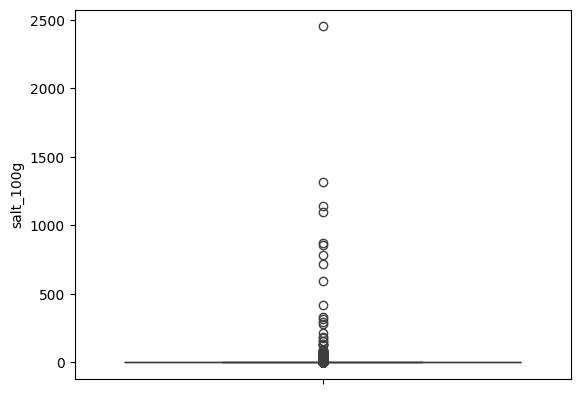

In [116]:
print(cleaned_df['salt_100g'].describe())
sns.boxplot(cleaned_df['salt_100g'])

IQR = 1.37
1.5*IQR = 2.055
Outliers = 3.425

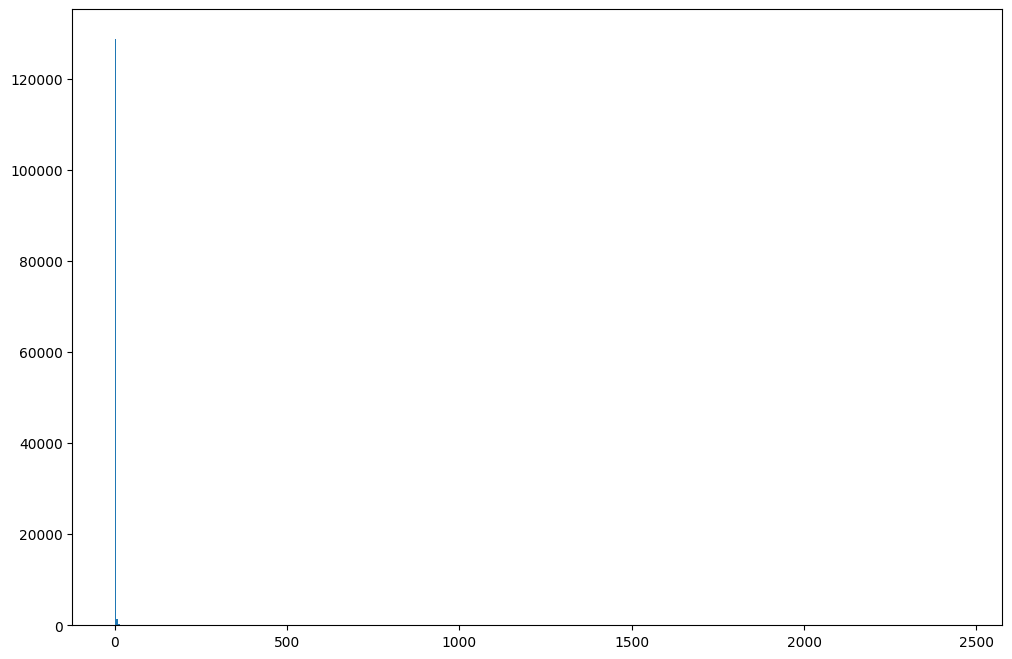

In [117]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['salt_100g'], bins = 500)
plt.show()

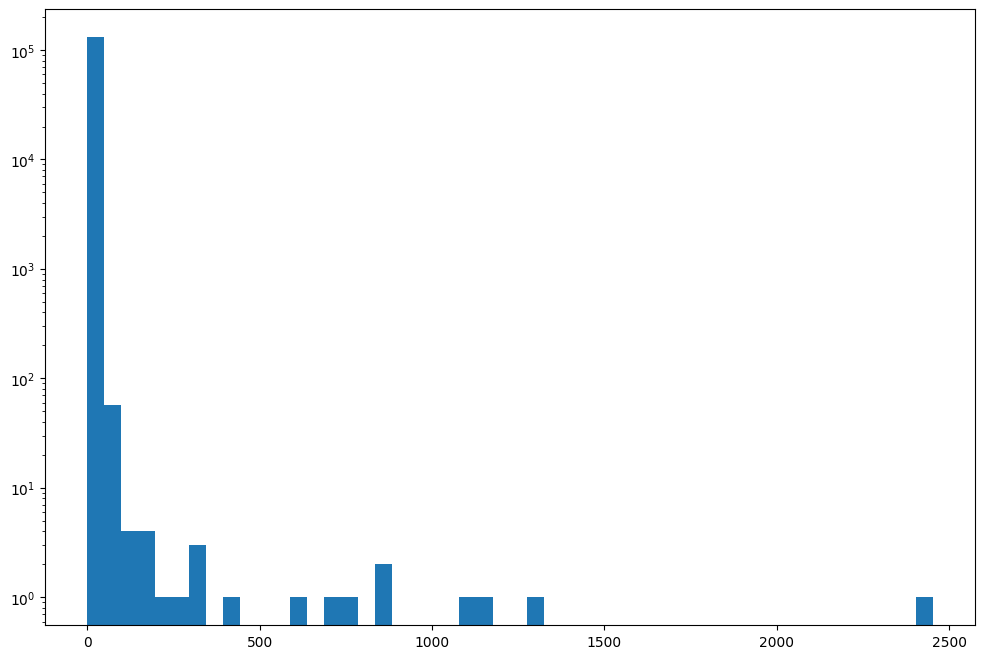

In [118]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(cleaned_df['salt_100g'], bins = 50, log = True)
plt.show()

In [119]:
cleaned_df[cleaned_df['salt_100g'] == 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


In [120]:
cleaned_df[cleaned_df['salt_100g'] > 100]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1435,Dill Pickle Cashews,Emerald,US,"Cashews, seasoning (maltodextrin, salt, garlic...",1.0,[ cashews -> en:cashews ] [ seasoning -> en...,0.0,e,2389.0,45.71,8.570,28.57,5.71,5.700,17.14,870.85678,342.857000,21.0
7983,Butter Beans,Spartan,US,"Prepared large lima beans, water, sugar, salt,...",2.0,[ prepared-large-lima-beans -> en:prepared-la...,0.0,c,322.0,0.77,0.000,12.31,2.31,3.800,4.62,781.53768,307.692000,3.0
11129,Autumn Cookie Selection,Caldo International Inc.,US,Wheat flour (bleached wheat flour enriched (ni...,3.0,[ wheat-flour -> en:wheat-flour ] [ flour -...,0.0,e,2025.0,30.65,2.420,48.39,22.58,1.600,4.84,327.74128,129.032000,21.0
20821,"Special Blend, Peas & Carrots",Del Monte,US,"Vegetables (peas, carrots), water, sugar, sea ...",0.0,[ vegetables -> en:vegetables ] [ peas -> e...,0.0,c,197.0,0.00,0.000,10.16,3.12,3.100,2.34,714.37500,281.250000,5.0
21892,"Marie Sharp's, Orange Pulp Habanero Pepper Sau...",Melinda's Limited,US,"Select yellow habanero peppers, orange pulp, o...",0.0,[ select-yellow-habanero-peppers -> en:select...,0.0,e,2008.0,0.00,0.000,90.00,44.00,34.000,14.00,594.86800,234.200000,19.0
28787,"Fratelli Comino, Tochetti With Sea Salt",International Nut Corporation,US,"Wheat flour, water, extravirgin olive oil 10%,...",0.0,[ wheat-flour -> en:wheat-flour ] [ flour -...,0.0,d,1812.0,13.33,3.330,70.00,3.33,3.300,10.00,177.80000,70.000000,14.0
32371,Light & Fit Greek Crunch - S'mores,Dannon,United States,NaN,NaN,NaN,NaN,d,386.0,1.77,0.709,11.30,7.80,0.709,7.80,153.00000,60.300000,11.0
50488,Premium Ice Cream,Belmont,US,"Cream, nonfat milk, sugar, corn syrup, cocoa (...",3.0,[ cream -> en:cream ] [ nonfat-milk -> en:n...,0.0,e,862.0,10.29,6.620,26.47,20.59,1.500,2.94,130.73634,51.471000,20.0
55514,Pure Carrot With Organic Lemon Juice,"Lakewood, Florida Bottling Company Inc.",US,Contains only: organic juice and organic puree...,0.0,[ contains-only -> en:contains-only ] [ onl...,0.0,c,176.0,0.00,0.000,9.58,4.17,0.800,0.83,158.75000,62.500000,9.0
68379,"Rhodes, Bake N Serv, Cinnamon Rolls With Cream...",Rhodes Bake-N-Serv,US,"Unbleached enriched white flour (wheat flour, ...",17.0,[ unbleached-enriched-white-flour -> en:unble...,0.0,d,1243.0,8.11,2.700,48.65,9.46,1.400,5.41,1098.37728,432.432000,16.0


When looking at products above 100g of salt, we can see that those products cannot be made of salt only. This time, 23 products are displayed. It might be interesting to use an imputer that looks at the salt value of similar products to reassign salt values to those outliers

The Simple Imputer will not be used because it looks at the other values for the same variable. 

In this case, it will look at other salts rates and take the mean or median of the salt column to impute a value. 

This method is not adquate because the salt value depends on the product. Taking the mean or median of the salt column would not be relevant (it would assign the same salt value to butter and pickles, which we know have a very different salt rate).

It is more relevant to use a multivariate method that will either create a regression from other variables, or look at products that are close to the ones with missing values to impute a new value.

# Final function to handle the outliers

In [121]:
def final_outliers_treatment(df):
    #Deleting product with an energy above 3 232,5
    df = df.loc[df['energy_100g'] < 3232.5]
    #Deleting products with more than 100g of fat for 100g of product
    df_fat_100 = df.loc[df['fat_100g'] <= 100 ]
    #Turning all products above 100g of carbohydrates into 100g
    df_fat_100['carbohydrates_100g'] = df_fat_100['carbohydrates_100g'].apply(lambda x : 100 if x > 100 else x)
    #Deleting products with negative sugar values
    df_fat_100 = df_fat_100.loc[df_fat_100['sugars_100g'] > 0]
    #Turning all products above 100g of sugar into 100g
    df_fat_100['sugars_100g'] = df_fat_100['sugars_100g'].apply(lambda x: 100 if x > 100 else x)
    #Deleting all products with fiber above 100g
    df_fat_100 = df_fat_100.loc[df_fat_100['fiber_100g'] <= 100]
    #Deleting product with negative proteins values
    df_fat_100 = df_fat_100.loc[df_fat_100['proteins_100g'] > 0]
    #Deleting products with protein rate above 100g
    df_fat_100 = df_fat_100.loc[df_fat_100['proteins_100g'] < 100]
    #Reseting index
    df_fat_100.reset_index(inplace = True)
    #Dropping old index column
    df_fat_100 = df_fat_100.drop(columns = ['index'])
    return df_fat_100
    

In [122]:
df_outliers = final_outliers_treatment(cleaned_df)

In [123]:
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000000,14.0
1,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0
2,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482000,12.0
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
4,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131547,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.3,5.56,0.95250,0.375000,11.0
131548,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.03048,0.012000,-1.0
131549,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,a,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,0.267717,-4.0
131550,Test NF App,NaN,en:CH,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,NaN,569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN


#### Verifying the distribution type

In [124]:
df_outliers['salt_100g'].max()

2452.41318

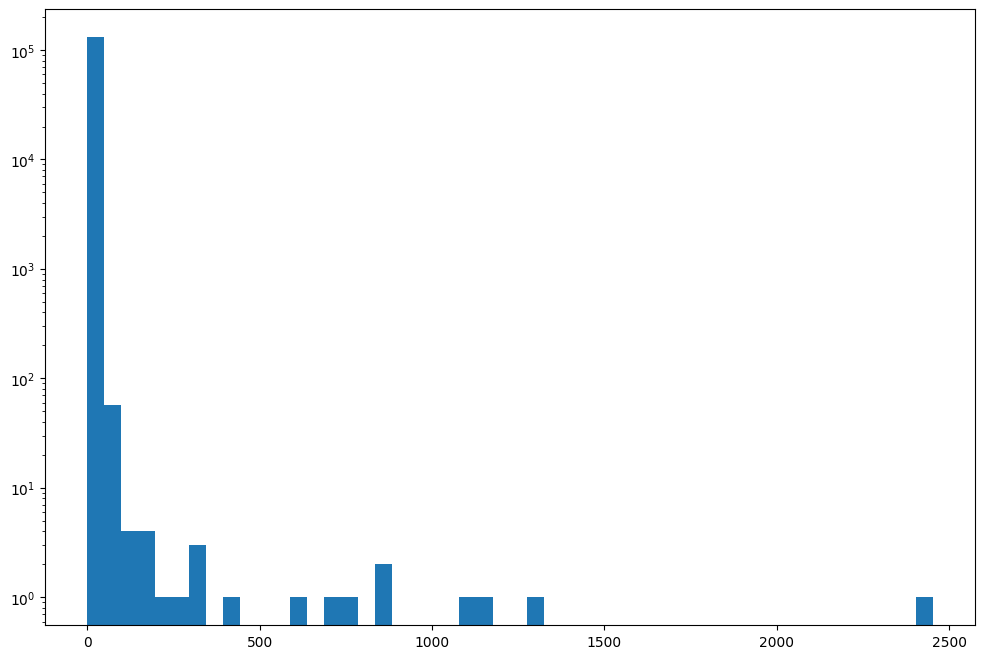

In [125]:
#Switching to logarithmic scale to have a better view of the distribution
plt.figure(figsize = (12,8))
plt.hist(df_outliers['salt_100g'], bins = 50, log = True)
plt.show()

Distribution is positively skewed

#### Turning values over 100 into NaNs

In [126]:
#Counting the initial number of nan in salt
nb_nan_in_salt = df_outliers.loc[df_outliers['salt_100g'].isna()]
len(nb_nan_in_salt)

657

In [127]:
#Counting the number of product with more than 100g of salt
nb_salt_above_100 = df_outliers.loc[df_outliers['salt_100g'] > 100]
len(nb_salt_above_100)

23

In [128]:
#Turning the targeted values (salt > 100) into NaN 
df_outliers.loc[df_outliers['salt_100g'] > 100,'salt_100g'] = np.nan

In [129]:
#Counting the number of nan after turning > 100 into nan
total_nan_after_change = df_outliers.loc[df_outliers['salt_100g'].isna()]
len(total_nan_after_change)

680

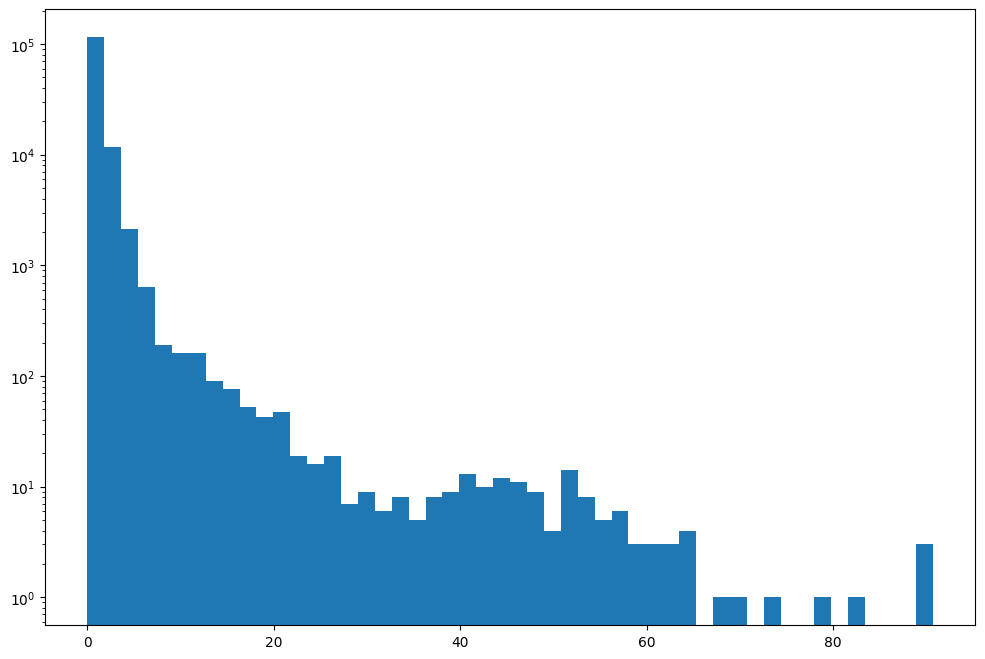

In [130]:
#Distribution
plt.figure(figsize = (12,8))
plt.hist(df_outliers['salt_100g'], bins = 50, log = True)
plt.show()

Distribution still positively skewed.

#### Looking for a linear correlation

In [131]:
#Keeping only quantitative features in the dataframe.
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131552 entries, 0 to 131551
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 129567 non-null  object 
 1   brands                       128158 non-null  object 
 2   countries                    131531 non-null  object 
 3   ingredients_text             126094 non-null  object 
 4   additives_n                  126094 non-null  float64
 5   additives                    126079 non-null  object 
 6   ingredients_from_palm_oil_n  126094 non-null  float64
 7   nutrition_grade_fr           128828 non-null  object 
 8   energy_100g                  131552 non-null  float64
 9   fat_100g                     131552 non-null  float64
 10  saturated-fat_100g           129748 non-null  float64
 11  carbohydrates_100g           131400 non-null  float64
 12  sugars_100g                  131552 non-null  float64
 13 

In [132]:
df_outliers.isna().sum()

product_name                   1985
brands                         3394
countries                        21
ingredients_text               5458
additives_n                    5458
additives                      5473
ingredients_from_palm_oil_n    5458
nutrition_grade_fr             2724
energy_100g                       0
fat_100g                          0
saturated-fat_100g             1804
carbohydrates_100g              152
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                       680
sodium_100g                     661
nutrition-score-fr_100g        2724
dtype: int64

In [133]:
#Only keeping quantitative variables
outliers_quant = df_outliers.drop(columns = ['product_name','brands','countries','ingredients_text','additives','nutrition_grade_fr'])
outliers_quant

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000000,14.0
1,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0
2,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482000,12.0
3,0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
4,2.0,0.0,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131547,1.0,0.0,1393.0,9.72,2.78,61.11,30.56,8.3,5.56,0.95250,0.375000,11.0
131548,0.0,0.0,1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.03048,0.012000,-1.0
131549,NaN,NaN,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,0.267717,-4.0
131550,0.0,0.0,569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN


In [134]:
outliers_quant.isna().sum()

additives_n                    5458
ingredients_from_palm_oil_n    5458
energy_100g                       0
fat_100g                          0
saturated-fat_100g             1804
carbohydrates_100g              152
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                       680
sodium_100g                     661
nutrition-score-fr_100g        2724
dtype: int64

In [135]:
linear_corr = outliers_quant.corr(method = 'pearson')
linear_corr

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.000000,0.112006,0.019304,-0.070039,0.004434,0.125438,0.107756,-0.184977,-0.070673,0.064286,0.016564,0.192144
ingredients_from_palm_oil_n,0.112006,1.000000,0.092043,0.057385,0.093501,0.077105,0.058921,-0.006344,-0.020056,0.038858,0.006248,0.107395
energy_100g,0.019304,0.092043,1.000000,0.783395,0.574543,0.644450,0.444754,0.336932,0.365551,0.036149,0.009557,0.660916
fat_100g,-0.070039,0.057385,0.783395,1.000000,0.698534,0.073811,0.167477,0.211616,0.294982,0.010745,0.002448,0.599172
saturated-fat_100g,0.004434,0.093501,0.574543,0.698534,1.000000,0.121168,0.349153,0.031004,0.059614,-0.026467,-0.006466,0.688838
carbohydrates_100g,0.125438,0.077105,0.644450,0.073811,0.121168,1.000000,0.600800,0.265403,0.027360,-0.002213,0.003694,0.369090
sugars_100g,0.107756,0.058921,0.444754,0.167477,0.349153,0.600800,1.000000,0.003679,-0.174216,-0.102928,-0.021060,0.605965
fiber_100g,-0.184977,-0.006344,0.336932,0.211616,0.031004,0.265403,0.003679,1.000000,0.346889,-0.007290,0.003096,-0.111009
proteins_100g,-0.070673,-0.020056,0.365551,0.294982,0.059614,0.027360,-0.174216,0.346889,1.000000,0.158802,0.033148,0.074704
salt_100g,0.064286,0.038858,0.036149,0.010745,-0.026467,-0.002213,-0.102928,-0.007290,0.158802,1.000000,1.000000,0.180909


<Axes: >

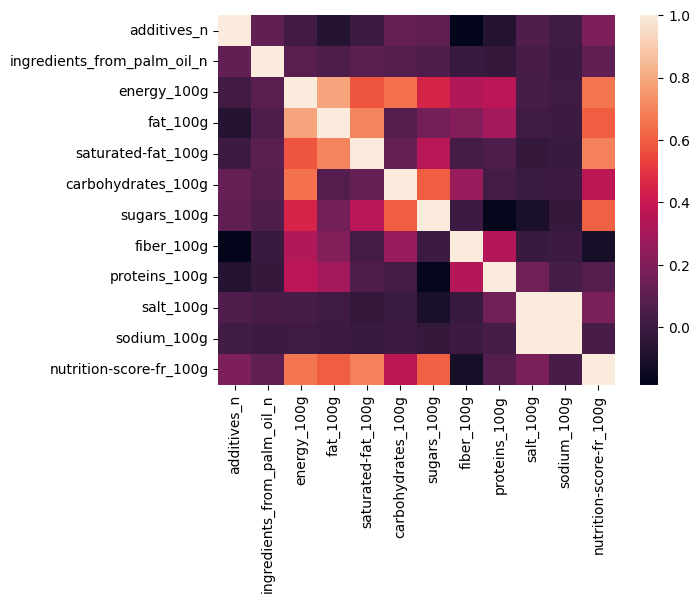

In [136]:
sns.heatmap(linear_corr)

Highly correlated :

Sodium and salt : Sodium and salt have a correlation of 1, which means it is not useful to keep them both in the dataframe.

Fat and saturated fat

Sugar and Carbohydrate

Nutrition score and sugar

Except nutrition score and sugar, variables that are highly correlated basically track the same info (sodium/salt, sugar/carn-bohydrate...). Apart from that, there is no linear correlation between the variables.

Regarding salt, using a linear regression (iterative imputer with Bayesian Ridge as estimator) based on the sodium values might be a good way to fill the minssing salt values. However, when looking at the data, there is not sodium value where there is no salt value. 

In [137]:
#When salt is empty, so is sodium
outliers_quant.loc[outliers_quant['salt_100g'].isna(), ['salt_100g','sodium_100g']]

,salt_100g,sodium_100g
3,NaN,NaN
5,NaN,NaN
9,NaN,NaN
10,NaN,NaN
21,NaN,NaN
...,...,...
131218,NaN,NaN
131252,NaN,NaN
131428,NaN,NaN
131491,NaN,NaN


In [138]:
outliers_quant.drop(columns=['sodium_100g'], inplace = True)

In [139]:
#Also dropping the sodium column in the initial dataframe
df_outliers.drop(columns=['sodium_100g'], inplace = True)

In [140]:
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
1,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
2,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN
4,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131547,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.3,5.56,0.95250,11.0
131548,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.03048,-1.0
131549,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,a,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,-4.0
131550,Test NF App,NaN,en:CH,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,NaN,569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.10000,NaN


### KNN

In [141]:
#KNN method will not work if other columns also contain null values.
#I will drop columns with null values and only keep columns fully filled to use a KNN method on the salt_1000g column 

In [142]:
df_outliers.isna().sum()

product_name                   1985
brands                         3394
countries                        21
ingredients_text               5458
additives_n                    5458
additives                      5473
ingredients_from_palm_oil_n    5458
nutrition_grade_fr             2724
energy_100g                       0
fat_100g                          0
saturated-fat_100g             1804
carbohydrates_100g              152
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                       680
nutrition-score-fr_100g        2724
dtype: int64

In [143]:
#Dropping all columns that are not fully filled
KKN_salt_df = outliers_quant.dropna(axis = 1, thresh = len(outliers_quant.index))
KKN_salt_df

,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g
0,2243.0,28.57,14.29,3.6,3.57
1,1941.0,17.86,17.86,7.1,17.86
2,2540.0,57.14,3.57,7.1,17.86
3,1933.0,18.27,11.54,7.7,13.46
4,1833.0,18.75,15.62,9.4,14.06
...,...,...,...,...,...
131547,1393.0,9.72,30.56,8.3,5.56
131548,1477.0,0.00,2.35,4.7,1.18
131549,1643.0,2.80,2.60,5.9,13.00
131550,569.0,31.00,9.60,1.1,2.10


In [144]:
salt_df = pd.DataFrame(outliers_quant['salt_100g'])
salt_df

,salt_100g
0,0.00000
1,0.63500
2,1.22428
3,NaN
4,0.13970
...,...
131547,0.95250
131548,0.03048
131549,0.68000
131550,1.10000


In [145]:
salt_df.isna().sum()

salt_100g    680
dtype: int64

In [146]:
KNN_salt = KKN_salt_df.join(salt_df)
KNN_salt

,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,2243.0,28.57,14.29,3.6,3.57,0.00000
1,1941.0,17.86,17.86,7.1,17.86,0.63500
2,2540.0,57.14,3.57,7.1,17.86,1.22428
3,1933.0,18.27,11.54,7.7,13.46,NaN
4,1833.0,18.75,15.62,9.4,14.06,0.13970
...,...,...,...,...,...,...
131547,1393.0,9.72,30.56,8.3,5.56,0.95250
131548,1477.0,0.00,2.35,4.7,1.18,0.03048
131549,1643.0,2.80,2.60,5.9,13.00,0.68000
131550,569.0,31.00,9.60,1.1,2.10,1.10000


In [147]:
#Importing KNN imputer
from sklearn.impute import KNNImputer

#Defining the paramaters of the imputer
imputer = KNNImputer(weights = 'uniform', n_neighbors = 5, missing_values = np.nan)

#Imputing the data and creating a new df with the imputed data
imputed_data = imputer.fit_transform(KNN_salt)
df_temp = pd.DataFrame(imputed_data)

#Naming colulmns in the newly created df
df_temp.columns = KNN_salt.columns

#Reassigning the salt column with no missing values in the dataframe with all variables
df_outliers['salt_100g'] = df_temp['salt_100g']

Vérifier valeurs prédites

count    131552.000000
mean          0.974021
std           2.182237
min           0.000000
25%           0.127000
50%           0.631000
75%           1.193800
max          90.703400
Name: salt_100g, dtype: float64


<Axes: ylabel='salt_100g'>

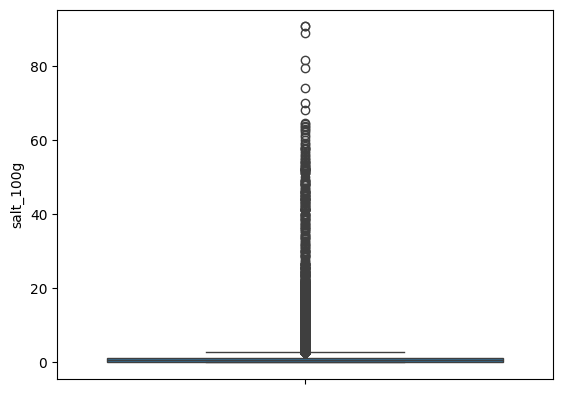

In [148]:
print(df_outliers['salt_100g'].describe())
sns.boxplot(df_outliers['salt_100g'])

In [149]:
df_outliers.loc[df_outliers['salt_100g'] > 50, ['product_name','ingredients_text','additives','salt_100g']]

,product_name,ingredients_text,additives,salt_100g
19703,Apple Rings,"Corn syrup, sugar, fruit juice, gelatin, sorbi...",[ corn-syrup -> en:corn-syrup ] [ syrup -> ...,90.7034
26021,Classic Pasta Tri-Color Rotini,"Durum wheat semolina, [enriched with iron (fer...",[ durum-wheat-semolina -> en:durum-wheat-semo...,90.7034
56083,Extra Wide Egg Noodles,"Semolina, durum flour (enriched with iron [fer...",[ semolina -> en:semolina ] [ durum-flour -...,68.0466
56995,"Lemon Flavored Salted Apricot, Lemon","Dried apricots, iodized salt, purified water, ...",[ dried-apricots -> en:dried-apricots ] [ a...,51.6763
59744,Hot Tamarind,"Natural tamarind fruit with seed, sugar, hot p...",[ natural-tamarind-fruit-with-seed -> en:natu...,57.6453
76555,Tep Tip Coconut Milk,INGREO:ENTS : COCO'{lJ7 C) AS POIASSIU'/ AJOUI...,[ ingreo -> fr:ingreo ] [ ents -> fr:ents ...,55.0000
93411,Klare Gemüsebrühe,"Jodiertes Speisesalz, Maltodextrin, Zucker, 9%...",[ jodiertes-speisesalz -> xx:jodiertes-speise...,63.5000
93450,Aromat condiment,"Sel, dextrose, exhausteurs de goût : glutamate...",[ sel -> fr:sel ] [ dextrose -> fr:dextrose...,56.4000
94275,Bouillon de Boeuf,"Sel, maltodextrine, exhausteurs de goût : glut...",[ sel -> fr:sel ] [ maltodextrine -> fr:mal...,51.1000
94324,BouillonKUB Pot au feu (x 8),"Sel, maltodextrine, exhausteurs de goût (gluta...",[ sel -> fr:sel ] [ maltodextrine -> fr:mal...,52.3000


After using the Knn imputer, we can see that it did not impute values over 100.
We can also see that product with a high salt value are products that indeed contain a lot of salt.

# Missing values treatment

## Product names

In [150]:
df_outliers.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,126094.000000,126094.000000,131552.000000,131552.000000,129748.000000,131400.000000,131552.000000,131552.000000,131552.000000,131552.000000,128828.000000
mean,2.097522,0.024585,1214.321417,12.956991,4.748244,36.518116,15.954098,3.223700,7.713228,0.974021,8.623133
std,2.635337,0.157195,740.299126,14.344130,6.531693,26.400114,17.710335,4.197923,6.888344,2.182237,9.159739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.004000,0.000000,-15.000000
25%,0.000000,0.000000,490.000000,1.700000,0.000000,11.290000,3.000000,0.500000,3.150000,0.127000,1.000000
50%,1.000000,0.000000,1255.000000,7.810000,2.100000,31.600000,7.140000,2.000000,6.000000,0.631000,9.000000
75%,3.000000,0.000000,1795.000000,20.500000,7.040000,60.710000,25.580000,4.000000,10.200000,1.193800,16.000000
max,31.000000,2.000000,3230.000000,100.000000,94.000000,100.000000,100.000000,94.800000,90.000000,90.703400,37.000000


In [151]:
#Displaying the number of missing values
df_outliers['product_name'].isna().sum()

1985

In [152]:
df_outliers['product_name'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
131547    False
131548    False
131549    False
131550    False
131551    False
Name: product_name, Length: 131552, dtype: bool

In [153]:
#Product with no product names will be dropped because is it not possible to find the product name based on the product brands and other information.
df_outliers.loc[df_outliers['product_name'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
319,NaN,NaN,France,NaN,NaN,NaN,NaN,a,586.0,3.80,1.40,16.20,0.50,1.5,9.30,0.60000,-3.0
510,NaN,"Lindt, Lindt & Sprungli (Schweiz) Ag",en:US,NaN,NaN,NaN,NaN,e,2406.0,37.50,22.50,50.00,50.00,2.5,7.50,0.19050,24.0
5490,NaN,"Gummi Bears, Rite Aid Pantry",US,"Corn syrup, sucrose, gelatin, citric acid, app...",6.0,[ corn-syrup -> en:corn-syrup ] [ syrup -> ...,0.0,d,1393.0,0.00,0.00,79.49,46.15,0.0,7.69,0.09652,14.0
6337,NaN,"Creamette, Nwpc","en:FR, US",NaN,NaN,NaN,NaN,a,1569.0,4.46,0.89,67.86,3.57,3.6,14.29,0.02286,-6.0
6955,NaN,NaN,United States,NaN,NaN,NaN,NaN,d,1780.0,18.20,10.60,54.50,21.20,15.2,18.20,1.08000,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131415,NaN,NaN,Deutschland,NaN,NaN,NaN,NaN,c,1227.0,0.80,0.10,58.90,58.30,7.5,1.50,0.01000,8.0
131429,NaN,NaN,Suisse,NaN,NaN,NaN,NaN,c,1640.0,3.60,1.90,77.90,9.30,5.0,10.60,1.23000,7.0
131443,NaN,"Chia Pod, 2014 Us Open",US,"Chia seed gel (filtered water, chia seed), str...",0.0,[ chia-seed-gel -> en:chia-seed-gel ] [ see...,0.0,a,343.0,5.29,2.94,8.24,4.71,3.5,1.76,0.01524,-1.0
131497,NaN,Pic's Really Good,"en:TW, US",NaN,NaN,NaN,NaN,b,2372.0,46.67,3.33,10.00,3.33,6.7,23.33,0.06858,0.0


In [154]:
df_outliers.isna().mean()

product_name                   0.015089
brands                         0.025800
countries                      0.000160
ingredients_text               0.041489
additives_n                    0.041489
additives                      0.041603
ingredients_from_palm_oil_n    0.041489
nutrition_grade_fr             0.020707
energy_100g                    0.000000
fat_100g                       0.000000
saturated-fat_100g             0.013713
carbohydrates_100g             0.001155
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
nutrition-score-fr_100g        0.020707
dtype: float64

Product name has very few missing values : 1,4 %, and it will be impossible to find out exactly which product was supposed to be named, I therefore decided delete lines whithout a product name.

In [155]:
# Creating a new df without the products that don't have a product name
df_outliers = df_outliers.loc[~ df_outliers['product_name'].isna()]
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000000,14.0
1,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.635000,0.0
2,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.224280,12.0
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,1.737508,NaN
4,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.139700,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131547,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.3,5.56,0.952500,11.0
131548,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.030480,-1.0
131549,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,a,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.680000,-4.0
131550,Test NF App,NaN,en:CH,"Coco, choco",0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,NaN,569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.100000,NaN


## Brands

In [156]:
#Finding out the number of missing values
df_outliers['brands'].isna().sum()

1704

In [157]:
df_outliers['brands'].isna().mean()
#1,3% null

0.013151496908935146

In [158]:
df_outliers.loc[df_outliers['brands'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000000,14.0
211,Carrot & Coriander soup,NaN,France,NaN,NaN,NaN,NaN,b,126.0,1.40,0.80,3.60,2.70,1.0,0.30,0.630000,1.0
857,Roasted & Unsalted Peanuts,NaN,US,"Peanuts, vegetable oil (peanut and/or sunflowe...",0.0,[ peanuts -> en:peanuts ] [ vegetable-oil -...,0.0,c,2389.0,50.00,7.14,17.86,3.57,7.1,25.00,0.000000,9.0
869,Milk Duds,NaN,United States,NaN,NaN,NaN,NaN,e,1820.0,15.40,8.97,69.20,51.30,0.0,2.56,0.456000,24.0
1025,Apple Cinnamon Pecan Instant Oatmeal,NaN,US,"Ingredients: rolled oats, soluble corn fiber, ...",5.0,[ ingredients -> en:ingredients ] [ rolled-...,0.0,c,1594.0,9.52,1.19,66.67,7.14,19.0,9.52,1.148080,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131265,Jambon,NaN,România,"pulpă de porc (97%), apă, sare, condimente, an...",2.0,[ pulpă-de-porc -> ro:pulpă-de-porc ] [ 97 ...,0.0,d,488.0,4.00,1.50,1.00,0.47,0.7,19.00,2.250000,11.0
131281,Super Sandwich,NaN,Suisse,"farine de blé, eau, levain de blé (farine de b...",0.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,b,1029.0,2.30,0.29,46.00,3.50,1.9,8.60,1.200000,1.0
131312,Omi's Apfel Strudel Das Original,NaN,Suisse,"jus de pommes, acidifiant: ascorbique, saveur ...",0.0,[ jus-de-pommes -> fr:jus-de-pommes ] [ jus...,0.0,d,203.0,0.31,0.11,10.20,9.45,0.4,0.18,2.100000,11.0
131428,"Waterthins Fine Wafer Crackers, Classic",NaN,Suisse,NaN,NaN,NaN,NaN,NaN,1679.0,4.20,1.50,79.50,5.50,4.0,10.10,1.009962,NaN


Some products have the brand in their names but most of them don't. It would be complicated to look at each product individually to fill the brand's name when it is writtent in the product's name.
Since there is only 3 809 products I will delete the products that don't have a brand.

In [159]:
#Dropping products that don't have a brand
df_outliers = df_outliers.loc[~df_outliers['brands'].isna()]
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
1,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000,0.0
2,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280,12.0
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508,NaN
4,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700,7.0
5,Organic Dark Chocolate Minis,Equal Exchange,US,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,NaN,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131546,Fisherman's Friend Miel-Citron,Fisherman's Friend,France,"Édulcorants : sorbitols, sucralose, acésulfame...",5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,b,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000,2.0
131547,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500,11.0
131548,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480,-1.0
131549,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,a,1643.0,2.80,0.60,74.80,2.60,5.90,13.000,0.680000,-4.0


In [160]:
df_outliers['brands'].isna().sum()

0

## Countries

In [161]:
df_outliers['countries'].isna().sum()

19

In [162]:
#Looking at intial dataframe to see if empty fields in countries are empty in other columns that indicate the country
#If not, I might be able to recover the product's country from other countries columns
countries_look = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = "\t")

/var/folders/8w/_kd6jgl573d2nsgvn5nypvym0000gp/T/ipykernel_1518/2501530581.py:3: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  countries_look = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = "\t")


In [163]:
countries_look.loc[countries_look['countries'].isna(), ['countries','countries_tags','countries_fr']].sample(30)

,countries,countries_tags,countries_fr
256800,NaN,NaN,NaN
176643,NaN,NaN,NaN
270330,NaN,NaN,NaN
285759,NaN,NaN,NaN
175595,NaN,NaN,NaN
285488,NaN,NaN,NaN
271662,NaN,NaN,NaN
112589,NaN,NaN,NaN
189247,NaN,NaN,NaN
116275,NaN,NaN,NaN


Null values in 'countries' are also null in other coutrnies field in the initial dataframe

Rows that don't have a country will be dropped (19 rows from the cleaned_DF)

In [164]:
df_outliers = df_outliers.loc[~ df_outliers['countries'].isna()]
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
1,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000,0.0
2,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280,12.0
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508,NaN
4,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700,7.0
5,Organic Dark Chocolate Minis,Equal Exchange,US,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,NaN,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131546,Fisherman's Friend Miel-Citron,Fisherman's Friend,France,"Édulcorants : sorbitols, sucralose, acésulfame...",5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,b,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000,2.0
131547,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500,11.0
131548,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480,-1.0
131549,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,a,1643.0,2.80,0.60,74.80,2.60,5.90,13.000,0.680000,-4.0


## Ingredients text             

In [165]:
df_outliers['ingredients_text'].isna().sum()

4028

Since it would be difficult to retrieve the ingredients and since the purpose of this analysis is to focus on quantitative data, I will delete the lines where ingredients text is not filled.

In [166]:
df_outliers = df_outliers.loc[ ~ df_outliers['ingredients_text'].isna()]

In [167]:
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
1,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000,0.0
2,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280,12.0
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508,NaN
4,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700,7.0
5,Organic Dark Chocolate Minis,Equal Exchange,US,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,NaN,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131545,Santa Cruz Chilli & Lime Dressing,Newman's Own,United Kingdom,"Water, Sugar, Rice Wine Vinegar (contains Sulp...",1.0,[ water -> en:water ] [ sugar -> en:sugar ...,0.0,c,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020,6.0
131546,Fisherman's Friend Miel-Citron,Fisherman's Friend,France,"Édulcorants : sorbitols, sucralose, acésulfame...",5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,b,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000,2.0
131547,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500,11.0
131548,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480,-1.0


## Number of additives

In [168]:
#Displaying the number of missing values
df_outliers['additives_n'].isna().sum()

0

In [169]:
#Looking at which products are not filled
df_outliers.loc[df_outliers['additives_n'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g


In [170]:
df_outliers.loc[df_outliers['additives_n'] < 0]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g


## Nutri grade

In [171]:
#Displaying the number of missing values
df_outliers['nutrition_grade_fr'].isna().sum()

2310

In [172]:
#Looking at which products are not filled
df_outliers.loc[df_outliers['nutrition_grade_fr'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
3,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,1.737508,NaN
5,Organic Dark Chocolate Minis,Equal Exchange,US,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,NaN,2406.0,37.50,22.50,55.00,42.50,7.5,5.00,0.103688,NaN
9,Organic Sweetened Banana Chips,Unfi,US,"Organic bananas, organic coconut oil, organic ...",0.0,[ organic-bananas -> en:organic-bananas ] [...,0.0,NaN,2092.0,26.67,23.33,66.67,16.67,3.3,3.33,0.000000,NaN
10,Lotus Organic Brown Jasmine Rice,Unfi,US,Organic brown jasmine rice,0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,NaN,1582.0,2.22,NaN,77.78,2.22,2.2,8.89,0.519176,NaN
21,Organic Medium Shredded Coconut,Unfi,US,Organic coconut,0.0,[ organic-coconut -> en:organic-coconut ] [...,0.0,NaN,2230.0,30.00,26.67,53.33,6.67,6.7,6.67,2.292000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131491,Steamed Puddings,Aunty's,US,"Invert sugar syrup, reconstituted dried skimme...",12.0,[ invert-sugar-syrup -> en:invert-sugar-syrup...,0.0,NaN,1230.0,4.10,1.20,57.30,42.20,0.8,3.30,0.320040,NaN
131504,Nouilles orientales arôme de boeuf 85 g - Mamee,Mamee,"France, Suisse","Ingrédients nouilles : farine de froment, huil...",3.0,[ ingredients-nouilles -> fr:ingredients-noui...,1.0,NaN,1848.0,18.60,9.30,51.90,10.20,10.6,10.00,3.063240,NaN
131505,Nouilles orientales arôme de poulet - 85 g - M...,Mamee,"France, Suisse","Ingrédients nouilles : farine de froment, huil...",3.0,[ ingredients-nouilles -> fr:ingredients-noui...,1.0,NaN,1806.0,17.90,8.90,54.00,8.30,7.0,10.20,3.949700,NaN
131506,Nouilles orientales au curry - 85 g - Mamee,Mamee,"France, Suisse","Ingrédients nouilles : farine de froment, huil...",3.0,[ ingredients-nouilles -> fr:ingredients-noui...,1.0,NaN,1806.0,19.20,10.00,49.40,8.20,11.8,9.60,3.162300,NaN


In [173]:
#Turning nutrition grade into numbers to be able to impute them with a KNN imputer
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 'a', ['nutrition_grade_fr']] = 1
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 'b', ['nutrition_grade_fr']] = 2
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 'c', ['nutrition_grade_fr']] = 3
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 'd', ['nutrition_grade_fr']] = 4
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 'e', ['nutrition_grade_fr']] = 5

In [174]:
#KNN method will not work if other columns also contain null values.
#I will drop columns with null values and only keep columns fully filled to use a KNN method on the salt_1000g column 

In [175]:
df_outliers.isna().sum()

product_name                      0
brands                            0
countries                         0
ingredients_text                  0
additives_n                       0
additives                        14
ingredients_from_palm_oil_n       0
nutrition_grade_fr             2310
energy_100g                       0
fat_100g                          0
saturated-fat_100g             1587
carbohydrates_100g              124
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                         0
nutrition-score-fr_100g        2310
dtype: int64

In [176]:
#Dropping all columns that are not fully filled
KKN_nutrigrade = df_outliers.dropna(axis = 1, thresh = len(df_outliers.index))

#Dropping other qualitative columns
KKN_nutrigrade = KKN_nutrigrade.drop(columns = ['product_name','brands','countries','ingredients_text'])

In [177]:
nutrigrade_df = pd.DataFrame(df_outliers['nutrition_grade_fr'])
nutrigrade_df

,nutrition_grade_fr
1,2
2,4
3,NaN
4,3
5,NaN
...,...
131545,3
131546,2
131547,4
131548,1


In [178]:
nutrigrade_df.isna().sum()

nutrition_grade_fr    2310
dtype: int64

In [179]:
KKN_nutrigrade = KKN_nutrigrade.join(nutrigrade_df)
KKN_nutrigrade

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition_grade_fr
1,0.0,0.0,1941.0,17.86,17.86,7.10,17.860,0.635000,2
2,0.0,0.0,2540.0,57.14,3.57,7.10,17.860,1.224280,4
3,0.0,0.0,1933.0,18.27,11.54,7.70,13.460,1.737508,NaN
4,2.0,0.0,1833.0,18.75,15.62,9.40,14.060,0.139700,3
5,0.0,0.0,2406.0,37.50,42.50,7.50,5.000,0.103688,NaN
...,...,...,...,...,...,...,...,...,...
131545,1.0,0.0,660.0,6.90,16.70,0.60,0.300,0.541020,3
131546,5.0,0.0,1031.0,1.30,0.10,1.47,0.004,0.001000,2
131547,1.0,0.0,1393.0,9.72,30.56,8.30,5.560,0.952500,4
131548,0.0,0.0,1477.0,0.00,2.35,4.70,1.180,0.030480,1


In [180]:
#Importing KNN imputer
from sklearn.impute import KNNImputer

#Defining the paramaters of the imputer
imputer = KNNImputer(weights = 'uniform', n_neighbors = 5, missing_values = np.nan)

#Imputing the data and creating a new df with the imputed data
imputed_data = imputer.fit_transform(KKN_nutrigrade)
df_temp = pd.DataFrame(imputed_data)

#Naming colulmns in the newly created df
df_temp.columns = KKN_nutrigrade.columns

#Resetting df_outliers' index to be able to reassign columns
df_outliers.reset_index(inplace = True)
df_outliers = df_outliers.drop(columns = ['index'])

#Reassigning the nutrition grade column with no missing values in the dataframe with all variables
df_outliers['nutrition_grade_fr'] = df_temp['nutrition_grade_fr']

Vérifier valeurs prédites

count    123816.000000
mean          3.084902
std           1.378696
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: nutrition_grade_fr, dtype: float64


<Axes: ylabel='nutrition_grade_fr'>

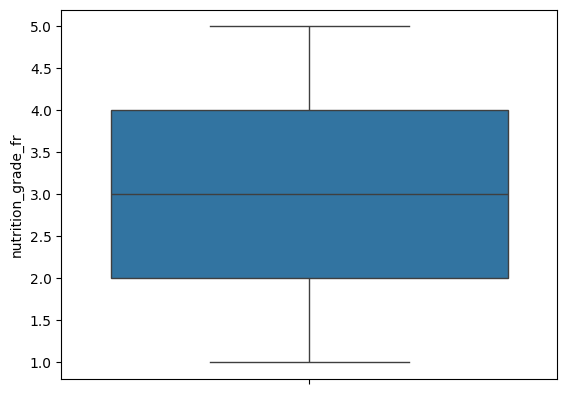

In [181]:
print(df_outliers['nutrition_grade_fr'].describe())
sns.boxplot(df_outliers['nutrition_grade_fr'])

In [182]:
df_outliers['nutrition_grade_fr'].unique()

array([2. , 4. , 3.6, 3. , 5. , 1.4, 1. , 1.8, 4.4, 3.8, 2.8, 2.6, 2.2,
       2.4, 3.4, 3.2, 4.8, 1.2, 4.2, 1.6, 4.6])

After using the Knn imputer, we can see that it did not impute values over 5. However, it did impute float values, which are not possible in the nutrition grade

In [183]:
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 3]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
3,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,3.0,1833.0,18.75,4.69,57.81,15.62,9.400,14.06,0.13970,7.0
13,Organic Quinoa Coconut Granola With Mango,Sunridge,US,"Organic rolled oats, organic evaporated cane j...",0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,0.0,3.0,1674.0,10.91,2.73,69.09,27.27,9.100,10.91,0.02286,7.0
15,Peanut Butter Power Chews,Sunridge,US,"Peanut butter (dry roasted peanuts, palm oil, ...",3.0,[ peanut-butter -> en:peanut-butter ] [ but...,0.0,3.0,1954.0,20.00,2.22,60.00,33.33,4.400,8.89,0.19812,9.0
28,Aunt Ginger's Snappy Granola,Grizzlies,US,"Organic rolled oats, organic brown rice syrup,...",0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,0.0,3.0,1941.0,17.86,2.68,64.29,21.43,7.100,10.71,0.04572,6.0
34,Super Nutty Granola,Golden Temple,US,"Whole rolled oats, milled cane sugar, vegetabl...",0.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,0.0,3.0,1904.0,18.18,3.64,63.64,10.91,7.300,10.91,0.25400,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123807,Blueberry Chia Buckwheat Muesli,"Seven Sundays, Seven Sundays Llc",US,"Gluten-free oats, organic honey, coconut, blue...",0.0,[ gluten-free-oats -> en:gluten-free-oats ] ...,0.0,3.0,1690.0,10.53,4.39,66.67,15.79,8.800,12.28,0.04572,7.0
123808,100% Pur Jus 4 agrumes,Cora,France,"Jus d'orange (dont pulpe 1,6%), jus de clément...",0.0,[ jus-d-orange -> fr:jus-d-orange ] [ jus-d...,0.0,3.0,192.0,0.50,0.00,10.20,9.20,0.600,0.60,0.03000,4.0
123809,Spearmint sans sucres,Fisherman's Friend,France,"Édulcorants : sorbitol, sucralose, acésulfame-...",4.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,3.0,1017.0,1.30,1.28,95.87,0.12,0.005,0.04,0.00500,4.0
123811,Santa Cruz Chilli & Lime Dressing,Newman's Own,United Kingdom,"Water, Sugar, Rice Wine Vinegar (contains Sulp...",1.0,[ water -> en:water ] [ sugar -> en:sugar ...,0.0,3.0,660.0,6.90,0.50,23.10,16.70,0.600,0.30,0.54102,6.0


In [184]:
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 3.6]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
2,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,3.6,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,1.737508,NaN
74,Organic Medjool Dates,Unfi,US,Organic medjool dates.,0.0,[ organic-medjool-dates -> en:organic-medjool...,0.0,3.6,1218.0,0.10,NaN,70.40,65.70,1.9,2.20,0.012700,NaN
1740,Natural & Artificial Flavor Chocolate Syrup,Kroger,US,"High fructose corn syrup, water, corn syrup, c...",4.0,[ high-fructose-corn-syrup -> en:high-fructos...,0.0,3.6,1109.0,0.00,NaN,64.71,52.94,2.9,2.94,0.335280,NaN
8057,Shelled Pine Nuts,"Harmons, Harmons Inc",US,Pine nuts.,0.0,[ pine-nuts -> en:pine-nuts ] [ nuts -> en:...,0.0,3.6,3033.0,67.86,7.14,14.29,3.57,3.6,14.29,0.774600,NaN
8138,Green Apple Licorice,"Harmons, Harmons Inc",US,"Cane sugar, corn syrup, wheat flour (gluten), ...",2.0,[ cane-sugar -> en:cane-sugar ] [ sugar -> ...,0.0,3.6,1464.0,1.25,0.00,80.00,17.50,0.0,2.50,1.333540,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122909,"Soupe Vietnamienne Nouilles, émincé de carotte...",Knorr,France,"Pâtes Chinoises : 49% (semoule de blé tendre, ...",0.0,[ pates-chinoises -> fr:pates-chinoises ] [...,0.0,3.6,1300.0,2.50,0.50,53.00,7.00,4.5,15.00,16.002000,NaN
122954,Pot de Crème façon Tarte Tatin,"Alsa,Unilever Food Solutions",France,"Sucre, caramel 9,5%, biscuit 7% (farine de _bl...",4.0,[ sucre -> fr:sucre ] [ caramel-9 -> fr:car...,1.0,3.6,1668.0,2.20,1.00,95.00,87.00,0.9,0.50,0.120000,NaN
123053,Erdnussmus,TerraSana,Deutschland,geröstete _Erdnüsse_,0.0,[ gerostete-erdnusse -> de:gerostete-erdnusse...,0.0,3.6,2362.0,44.90,9.97,11.30,3.13,9.5,28.90,0.627284,NaN
123371,"Mogu Mogu, Lychee Juice, Lychee",Sappe Public Company Limited,US,Lychee juice 25% nata de coco 25% fructose 4% ...,0.0,[ lychee-juice-25-nata-de-coco-25-fructose-4-...,0.0,3.6,222.0,0.00,NaN,12.81,11.25,0.3,0.62,0.022860,NaN


It seems that the nutrigrade imputation was done well since products with imputed float values in nutrigrade have the same range of values regarding the nutriscore. To keep integer values in the nutrigrade, I will round imputed nutrigrade numbers to bring them to integers.

In [185]:
df_outliers['nutrition_grade_fr'] = df_outliers['nutrition_grade_fr'].round()

In [186]:
#Turning the nutrition grade back into a letter
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 1, ['nutrition_grade_fr']] = "a"
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 2, ['nutrition_grade_fr']] = "b"
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 3, ['nutrition_grade_fr']] = "c"
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 4, ['nutrition_grade_fr']] = "d"
df_outliers.loc[df_outliers['nutrition_grade_fr'] == 5, ['nutrition_grade_fr']] = "e"

## Ingredients from palm oil

In [187]:
df_outliers.loc[df_outliers['ingredients_from_palm_oil_n'].isna(), ['product_name','brands','ingredients_from_palm_oil_n'] ]

,product_name,brands,ingredients_from_palm_oil_n


## Energy

energy_100g. replacing the missing energy value with the mean of aliment in the same  nutriscore group

In [188]:
df_outliers['energy_100g'].isna().sum()

0

## Fat

In [189]:
df_outliers.loc[df_outliers['fat_100g'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g


## Saturated Fat

In [190]:
df_outliers.loc[df_outliers['saturated-fat_100g'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
9,Lotus Organic Brown Jasmine Rice,Unfi,US,Organic brown jasmine rice,0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,a,1582.0,2.22,NaN,77.78,2.22,2.20,8.890,0.519176,NaN
21,Organic Red Quinoa,Pcc,US,Organic red quinoa,0.0,[ organic-red-quinoa -> en:organic-red-quinoa...,0.0,b,1490.0,6.67,NaN,64.44,11.11,8.90,13.330,0.010160,NaN
31,Organic Garbanzo Beans,Unfi,US,Organic garbanzo beans,0.0,[ organic-garbanzo-beans -> en:organic-garban...,0.0,c,1335.0,5.32,NaN,53.19,8.51,14.90,17.020,0.053340,NaN
32,Organic Yellow Split Peas,Unfi,US,Organic yellow split peas,0.0,[ organic-yellow-split-peas -> en:organic-yel...,0.0,a,1582.0,1.11,NaN,68.89,8.89,28.90,28.890,0.055880,NaN
36,35% Fruit And Fiber Muesli,Golden Temple,US,"Whole rolled oats, raisins (raisins, vegetable...",3.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,0.0,b,1523.0,4.55,NaN,70.91,23.64,9.10,10.910,0.185420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123373,25% Mango Juice With Nata De Coco,Mogu Mogu,US,"Water 41.73%, mango juice 25%, nata de coco 25...",4.0,[ water-41-73 -> en:water-41-73 ] [ 41-73 -...,0.0,b,209.0,0.00,NaN,11.50,9.00,0.50,0.500,0.038100,NaN
123418,พัลพิ,"มินิทเมด,Minute Maid",ประเทศไทย,"น้ำส้ม 20% จากน้ำส้มเข้มข้น, น้ำตาล 10.5%, เนื...",0.0,[ น้ำส้ม-20-จากน้ำส้มเข้มข้น -> th:น้ำส้ม-20-...,0.0,c,245.0,0.00,NaN,14.10,13.10,0.69,0.345,0.039400,NaN
123482,"Organic Baby Food, Just Prunes",Plum Organics,US,"Water, organic prunes.",0.0,[ water -> en:water ] [ organic-prunes -> e...,0.0,b,255.0,0.00,NaN,15.15,13.13,1.00,1.010,0.012700,NaN
123620,Apple Juice,The Daily Juice Company,Australia,Reconstituted Apple Juice & Apple Juice (99.9%...,0.0,[ reconstituted-apple-juice-apple-juice -> en...,0.0,b,157.0,1.00,NaN,10.40,10.20,1.00,1.000,0.020320,NaN


In [191]:
linear_corr

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.000000,0.112006,0.019304,-0.070039,0.004434,0.125438,0.107756,-0.184977,-0.070673,0.064286,0.016564,0.192144
ingredients_from_palm_oil_n,0.112006,1.000000,0.092043,0.057385,0.093501,0.077105,0.058921,-0.006344,-0.020056,0.038858,0.006248,0.107395
energy_100g,0.019304,0.092043,1.000000,0.783395,0.574543,0.644450,0.444754,0.336932,0.365551,0.036149,0.009557,0.660916
fat_100g,-0.070039,0.057385,0.783395,1.000000,0.698534,0.073811,0.167477,0.211616,0.294982,0.010745,0.002448,0.599172
saturated-fat_100g,0.004434,0.093501,0.574543,0.698534,1.000000,0.121168,0.349153,0.031004,0.059614,-0.026467,-0.006466,0.688838
carbohydrates_100g,0.125438,0.077105,0.644450,0.073811,0.121168,1.000000,0.600800,0.265403,0.027360,-0.002213,0.003694,0.369090
sugars_100g,0.107756,0.058921,0.444754,0.167477,0.349153,0.600800,1.000000,0.003679,-0.174216,-0.102928,-0.021060,0.605965
fiber_100g,-0.184977,-0.006344,0.336932,0.211616,0.031004,0.265403,0.003679,1.000000,0.346889,-0.007290,0.003096,-0.111009
proteins_100g,-0.070673,-0.020056,0.365551,0.294982,0.059614,0.027360,-0.174216,0.346889,1.000000,0.158802,0.033148,0.074704
salt_100g,0.064286,0.038858,0.036149,0.010745,-0.026467,-0.002213,-0.102928,-0.007290,0.158802,1.000000,1.000000,0.180909


In [192]:
#Looking at values in nutriscore
df_outliers['fat_100g'].describe()

count    123816.000000
mean         12.991751
std          14.344363
min           0.000000
25%           1.700000
50%           7.890000
75%          20.590000
max         100.000000
Name: fat_100g, dtype: float64

Saturated Fat is correlated to fat and nutrition score.
I will use the fat values to estimate missing values in saturated fat. 

To do that I will create sub groups in fat and will use the mean of the sub groups to attribute a value for products that have no saturated fat value.

In [193]:
#Creating 10 fat groups
fat_1 = df_outliers.loc[df_outliers['fat_100g'] <= 10]
fat_2 = df_outliers.loc[(df_outliers['fat_100g'] > 10) & (df_outliers['fat_100g'] <= 20)]
fat_3 = df_outliers.loc[(df_outliers['fat_100g'] > 20) & (df_outliers['fat_100g'] <= 30)]
fat_4 = df_outliers.loc[(df_outliers['fat_100g'] > 30) & (df_outliers['fat_100g'] <= 40)]
fat_5 = df_outliers.loc[(df_outliers['fat_100g'] > 40) & (df_outliers['fat_100g'] <= 50)]
fat_6 = df_outliers.loc[(df_outliers['fat_100g'] > 50) & (df_outliers['fat_100g'] <= 60)]
fat_7 = df_outliers.loc[(df_outliers['fat_100g'] > 60) & (df_outliers['fat_100g'] <= 70)]
fat_8 = df_outliers.loc[(df_outliers['fat_100g'] > 70) & (df_outliers['fat_100g'] <= 80)]
fat_9 = df_outliers.loc[(df_outliers['fat_100g'] > 80) & (df_outliers['fat_100g'] <= 90)]
fat_10 = df_outliers.loc[(df_outliers['fat_100g'] > 90) & (df_outliers['fat_100g'] <= 100)]

In [194]:
fat_1

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
9,Lotus Organic Brown Jasmine Rice,Unfi,US,Organic brown jasmine rice,0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,a,1582.0,2.22,NaN,77.78,2.22,2.20,8.890,0.519176,NaN
10,Organic Oat Groats,Pcc,US,Organic oat groats,0.0,[ organic-oat-groats -> en:organic-oat-groats...,0.0,a,1096.0,5.95,1.19,66.67,2.38,9.50,16.670,0.025400,-6.0
21,Organic Red Quinoa,Pcc,US,Organic red quinoa,0.0,[ organic-red-quinoa -> en:organic-red-quinoa...,0.0,b,1490.0,6.67,NaN,64.44,11.11,8.90,13.330,0.010160,NaN
25,Organic Blueberry Almond Granola,Sunridge,US,"Organic rolled oats, organic evaporated cane j...",0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,0.0,b,1674.0,9.09,0.91,70.91,29.09,7.30,10.910,0.045720,0.0
31,Organic Garbanzo Beans,Unfi,US,Organic garbanzo beans,0.0,[ organic-garbanzo-beans -> en:organic-garban...,0.0,c,1335.0,5.32,NaN,53.19,8.51,14.90,17.020,0.053340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123811,Santa Cruz Chilli & Lime Dressing,Newman's Own,United Kingdom,"Water, Sugar, Rice Wine Vinegar (contains Sulp...",1.0,[ water -> en:water ] [ sugar -> en:sugar ...,0.0,c,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020,6.0
123812,Fisherman's Friend Miel-Citron,Fisherman's Friend,France,"Édulcorants : sorbitols, sucralose, acésulfame...",5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,b,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000,2.0
123813,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500,11.0
123814,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480,-1.0


In [195]:
fat_1.index

Index([     9,     10,     21,     25,     31,     32,     36,     37,     38,
           39,
       ...
       123801, 123802, 123805, 123808, 123809, 123811, 123812, 123813, 123814,
       123815],
      dtype='int64', length=68817)

In [196]:
#Checking
print(fat_2['fat_100g'].max())
print(fat_2['fat_100g'].min())

20.0
10.07


In [197]:
#Finding the saturated fat means for each group
saturated_fat_1_mean = fat_1['saturated-fat_100g'].mean()
saturated_fat_2_mean = fat_2['saturated-fat_100g'].mean()
saturated_fat_3_mean = fat_3['saturated-fat_100g'].mean()
saturated_fat_4_mean = fat_4['saturated-fat_100g'].mean()
saturated_fat_5_mean = fat_5['saturated-fat_100g'].mean()
saturated_fat_6_mean = fat_6['saturated-fat_100g'].mean()
saturated_fat_7_mean = fat_7['saturated-fat_100g'].mean()
saturated_fat_8_mean = fat_8['saturated-fat_100g'].mean()
saturated_fat_9_mean = fat_9['saturated-fat_100g'].mean()
saturated_fat_10_mean = fat_10['saturated-fat_100g'].mean()

In [198]:
##Isolating rows where saturated fat is empty and where the indexes of the rows can be in the indexes of fat_1
#1486 rows
#This allows to isolate rows with empty saturated fat that have a fat_100g value between 0 and 10.
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_1.index))]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
9,Lotus Organic Brown Jasmine Rice,Unfi,US,Organic brown jasmine rice,0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,a,1582.0,2.22,NaN,77.78,2.22,2.20,8.890,0.519176,NaN
21,Organic Red Quinoa,Pcc,US,Organic red quinoa,0.0,[ organic-red-quinoa -> en:organic-red-quinoa...,0.0,b,1490.0,6.67,NaN,64.44,11.11,8.90,13.330,0.010160,NaN
31,Organic Garbanzo Beans,Unfi,US,Organic garbanzo beans,0.0,[ organic-garbanzo-beans -> en:organic-garban...,0.0,c,1335.0,5.32,NaN,53.19,8.51,14.90,17.020,0.053340,NaN
32,Organic Yellow Split Peas,Unfi,US,Organic yellow split peas,0.0,[ organic-yellow-split-peas -> en:organic-yel...,0.0,a,1582.0,1.11,NaN,68.89,8.89,28.90,28.890,0.055880,NaN
36,35% Fruit And Fiber Muesli,Golden Temple,US,"Whole rolled oats, raisins (raisins, vegetable...",3.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,0.0,b,1523.0,4.55,NaN,70.91,23.64,9.10,10.910,0.185420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123373,25% Mango Juice With Nata De Coco,Mogu Mogu,US,"Water 41.73%, mango juice 25%, nata de coco 25...",4.0,[ water-41-73 -> en:water-41-73 ] [ 41-73 -...,0.0,b,209.0,0.00,NaN,11.50,9.00,0.50,0.500,0.038100,NaN
123418,พัลพิ,"มินิทเมด,Minute Maid",ประเทศไทย,"น้ำส้ม 20% จากน้ำส้มเข้มข้น, น้ำตาล 10.5%, เนื...",0.0,[ น้ำส้ม-20-จากน้ำส้มเข้มข้น -> th:น้ำส้ม-20-...,0.0,c,245.0,0.00,NaN,14.10,13.10,0.69,0.345,0.039400,NaN
123482,"Organic Baby Food, Just Prunes",Plum Organics,US,"Water, organic prunes.",0.0,[ water -> en:water ] [ organic-prunes -> e...,0.0,b,255.0,0.00,NaN,15.15,13.13,1.00,1.010,0.012700,NaN
123620,Apple Juice,The Daily Juice Company,Australia,Reconstituted Apple Juice & Apple Juice (99.9%...,0.0,[ reconstituted-apple-juice-apple-juice -> en...,0.0,b,157.0,1.00,NaN,10.40,10.20,1.00,1.000,0.020320,NaN


In [199]:
#I then replace the saturated fat value by the mean of the related group
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_1.index)), ['saturated-fat_100g'] ] = saturated_fat_1_mean

In [200]:
#Checking that we now have rows with the mean added in saturated_fat
#1486 rows now have the saturated fat mean assigned instead of nan.
df_outliers.loc[df_outliers['saturated-fat_100g'] == saturated_fat_1_mean]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
9,Lotus Organic Brown Jasmine Rice,Unfi,US,Organic brown jasmine rice,0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,a,1582.0,2.22,0.948347,77.78,2.22,2.20,8.890,0.519176,NaN
21,Organic Red Quinoa,Pcc,US,Organic red quinoa,0.0,[ organic-red-quinoa -> en:organic-red-quinoa...,0.0,b,1490.0,6.67,0.948347,64.44,11.11,8.90,13.330,0.010160,NaN
31,Organic Garbanzo Beans,Unfi,US,Organic garbanzo beans,0.0,[ organic-garbanzo-beans -> en:organic-garban...,0.0,c,1335.0,5.32,0.948347,53.19,8.51,14.90,17.020,0.053340,NaN
32,Organic Yellow Split Peas,Unfi,US,Organic yellow split peas,0.0,[ organic-yellow-split-peas -> en:organic-yel...,0.0,a,1582.0,1.11,0.948347,68.89,8.89,28.90,28.890,0.055880,NaN
36,35% Fruit And Fiber Muesli,Golden Temple,US,"Whole rolled oats, raisins (raisins, vegetable...",3.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,0.0,b,1523.0,4.55,0.948347,70.91,23.64,9.10,10.910,0.185420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123373,25% Mango Juice With Nata De Coco,Mogu Mogu,US,"Water 41.73%, mango juice 25%, nata de coco 25...",4.0,[ water-41-73 -> en:water-41-73 ] [ 41-73 -...,0.0,b,209.0,0.00,0.948347,11.50,9.00,0.50,0.500,0.038100,NaN
123418,พัลพิ,"มินิทเมด,Minute Maid",ประเทศไทย,"น้ำส้ม 20% จากน้ำส้มเข้มข้น, น้ำตาล 10.5%, เนื...",0.0,[ น้ำส้ม-20-จากน้ำส้มเข้มข้น -> th:น้ำส้ม-20-...,0.0,c,245.0,0.00,0.948347,14.10,13.10,0.69,0.345,0.039400,NaN
123482,"Organic Baby Food, Just Prunes",Plum Organics,US,"Water, organic prunes.",0.0,[ water -> en:water ] [ organic-prunes -> e...,0.0,b,255.0,0.00,0.948347,15.15,13.13,1.00,1.010,0.012700,NaN
123620,Apple Juice,The Daily Juice Company,Australia,Reconstituted Apple Juice & Apple Juice (99.9%...,0.0,[ reconstituted-apple-juice-apple-juice -> en...,0.0,b,157.0,1.00,0.948347,10.40,10.20,1.00,1.000,0.020320,NaN


In [201]:
#Doing the same for other fat groups

In [202]:
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_2.index)), ['saturated-fat_100g'] ] = saturated_fat_2_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_3.index)), ['saturated-fat_100g'] ] = saturated_fat_3_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_4.index)), ['saturated-fat_100g'] ] = saturated_fat_4_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_5.index)), ['saturated-fat_100g'] ] = saturated_fat_5_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_6.index)), ['saturated-fat_100g'] ] = saturated_fat_6_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_7.index)), ['saturated-fat_100g'] ] = saturated_fat_7_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_8.index)), ['saturated-fat_100g'] ] = saturated_fat_8_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_9.index)), ['saturated-fat_100g'] ] = saturated_fat_9_mean
df_outliers.loc[ (df_outliers['saturated-fat_100g'].isna()) & (df_outliers['fat_100g'].index.isin(fat_10.index)), ['saturated-fat_100g'] ] = saturated_fat_10_mean


In [203]:
df_outliers.isna().sum()
#No more null values in saturated fat

product_name                      0
brands                            0
countries                         0
ingredients_text                  0
additives_n                       0
additives                        14
ingredients_from_palm_oil_n       0
nutrition_grade_fr                0
energy_100g                       0
fat_100g                          0
saturated-fat_100g                0
carbohydrates_100g              124
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                         0
nutrition-score-fr_100g        2310
dtype: int64

## Additives

Same than Ingredients text, finding out the names of the additives from other variables will be complicated and is not necessary for the purpose of the analysis. I will delete the lines where additives values are missing

In [204]:
df_outliers = df_outliers.loc[ ~ df_outliers['additives'].isna()]

In [205]:
df_outliers.isna().sum()

product_name                      0
brands                            0
countries                         0
ingredients_text                  0
additives_n                       0
additives                         0
ingredients_from_palm_oil_n       0
nutrition_grade_fr                0
energy_100g                       0
fat_100g                          0
saturated-fat_100g                0
carbohydrates_100g              124
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                         0
nutrition-score-fr_100g        2310
dtype: int64

## Carbohydrates

In [206]:
linear_corr

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.000000,0.112006,0.019304,-0.070039,0.004434,0.125438,0.107756,-0.184977,-0.070673,0.064286,0.016564,0.192144
ingredients_from_palm_oil_n,0.112006,1.000000,0.092043,0.057385,0.093501,0.077105,0.058921,-0.006344,-0.020056,0.038858,0.006248,0.107395
energy_100g,0.019304,0.092043,1.000000,0.783395,0.574543,0.644450,0.444754,0.336932,0.365551,0.036149,0.009557,0.660916
fat_100g,-0.070039,0.057385,0.783395,1.000000,0.698534,0.073811,0.167477,0.211616,0.294982,0.010745,0.002448,0.599172
saturated-fat_100g,0.004434,0.093501,0.574543,0.698534,1.000000,0.121168,0.349153,0.031004,0.059614,-0.026467,-0.006466,0.688838
carbohydrates_100g,0.125438,0.077105,0.644450,0.073811,0.121168,1.000000,0.600800,0.265403,0.027360,-0.002213,0.003694,0.369090
sugars_100g,0.107756,0.058921,0.444754,0.167477,0.349153,0.600800,1.000000,0.003679,-0.174216,-0.102928,-0.021060,0.605965
fiber_100g,-0.184977,-0.006344,0.336932,0.211616,0.031004,0.265403,0.003679,1.000000,0.346889,-0.007290,0.003096,-0.111009
proteins_100g,-0.070673,-0.020056,0.365551,0.294982,0.059614,0.027360,-0.174216,0.346889,1.000000,0.158802,0.033148,0.074704
salt_100g,0.064286,0.038858,0.036149,0.010745,-0.026467,-0.002213,-0.102928,-0.007290,0.158802,1.000000,1.000000,0.180909


There seem to be a linear correlation between carbohydrate and sugar (which is not a surprise). It is possible to use an iterative imputer to fill the missing values of carbohydrate based on the sugar values.

The iterative imputer will use given variables to create a linear regression model that will allow it to find out the missing values in the target variable. It implies that there is a linear correlation between the variables.

Estimator : Bayesian Ridge (creates a linear regression  and iterates to understand the relationship between variables to estimate the missing values)

Initial strategy : mean. Setting the initial missing values with the mean of the column, the values will then be refined by using the bayesian regression

In [207]:
#Creating a df to estimate carbohydrates missing values
#Also dropping nutriscore since I only want to impute carbohydrates values.
carbo_estimator = df_outliers.drop(columns = ['product_name','brands','countries','ingredients_text','additives','nutrition_grade_fr','nutrition-score-fr_100g'])
carbo_estimator

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000
1,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280
2,0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508
3,2.0,0.0,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700
4,0.0,0.0,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688
...,...,...,...,...,...,...,...,...,...,...
123811,1.0,0.0,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020
123812,5.0,0.0,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000
123813,1.0,0.0,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500
123814,0.0,0.0,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480


In [208]:
#Importing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [209]:
#Estimator default is bayesian ridge, and initial strategy default is mean
#Defining a value for random state to get the same results everytime
imputer = IterativeImputer(random_state=1)
imputer.fit(carbo_estimator)
carbo_imputed = pd.DataFrame(imputer.transform(carbo_estimator))
carbo_imputed

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000
1,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280
2,0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508
3,2.0,0.0,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700
4,0.0,0.0,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688
...,...,...,...,...,...,...,...,...,...,...
123797,1.0,0.0,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020
123798,5.0,0.0,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000
123799,1.0,0.0,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500
123800,0.0,0.0,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480


In [210]:
#Reassigning columns names
carbo_imputed.columns = carbo_estimator.columns
carbo_imputed

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000
1,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280
2,0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508
3,2.0,0.0,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700
4,0.0,0.0,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688
...,...,...,...,...,...,...,...,...,...,...
123797,1.0,0.0,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020
123798,5.0,0.0,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000
123799,1.0,0.0,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500
123800,0.0,0.0,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480


In [211]:
#Checking the number of missing values
carbo_imputed.isna().sum()

additives_n                    0
ingredients_from_palm_oil_n    0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
dtype: int64

In [212]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123802 entries, 0 to 123815
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 123802 non-null  object 
 1   brands                       123802 non-null  object 
 2   countries                    123802 non-null  object 
 3   ingredients_text             123802 non-null  object 
 4   additives_n                  123802 non-null  float64
 5   additives                    123802 non-null  object 
 6   ingredients_from_palm_oil_n  123802 non-null  float64
 7   nutrition_grade_fr           123802 non-null  object 
 8   energy_100g                  123802 non-null  float64
 9   fat_100g                     123802 non-null  float64
 10  saturated-fat_100g           123802 non-null  float64
 11  carbohydrates_100g           123678 non-null  float64
 12  sugars_100g                  123802 non-null  float64
 13  fibe

In [213]:
#Resetting index of df outliers to be able to reassign columns later
df_outliers.reset_index(inplace = True)
df_outliers = df_outliers.drop(columns = ['index'])
df_outliers

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Peanuts,Torn & Glasser,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000,0.0
1,Organic Salted Nut Mix,Grizzlies,US,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280,12.0
2,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,d,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508,NaN
3,Organic Muesli,Daddy's Muesli,US,"Org oats, org hemp granola (org oats, evaporat...",2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700,7.0
4,Organic Dark Chocolate Minis,Equal Exchange,US,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,e,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123797,Santa Cruz Chilli & Lime Dressing,Newman's Own,United Kingdom,"Water, Sugar, Rice Wine Vinegar (contains Sulp...",1.0,[ water -> en:water ] [ sugar -> en:sugar ...,0.0,c,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020,6.0
123798,Fisherman's Friend Miel-Citron,Fisherman's Friend,France,"Édulcorants : sorbitols, sucralose, acésulfame...",5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,b,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000,2.0
123799,Organic Z Bar,Clif Kid,US,"Organic oat blend (organic rolled oats, organi...",1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,d,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500,11.0
123800,Natural Cassava,Industria De Casabe Paul,US,Cassava.,0.0,[ cassava -> en:cassava ],0.0,a,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480,-1.0


In [214]:
#Reassigning the column to the initial dataframe.
df_outliers['carbohydrates_100g'] = carbo_imputed['carbohydrates_100g']

In [215]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123802 entries, 0 to 123801
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 123802 non-null  object 
 1   brands                       123802 non-null  object 
 2   countries                    123802 non-null  object 
 3   ingredients_text             123802 non-null  object 
 4   additives_n                  123802 non-null  float64
 5   additives                    123802 non-null  object 
 6   ingredients_from_palm_oil_n  123802 non-null  float64
 7   nutrition_grade_fr           123802 non-null  object 
 8   energy_100g                  123802 non-null  float64
 9   fat_100g                     123802 non-null  float64
 10  saturated-fat_100g           123802 non-null  float64
 11  carbohydrates_100g           123802 non-null  float64
 12  sugars_100g                  123802 non-null  float64
 13 

In [216]:
#Checking distribution after missing values imputation
print(df_outliers['carbohydrates_100g'].describe())
#The imputer imputed negative values to some of the products

count    123802.000000
mean         36.709765
std          26.395455
min         -32.806902
25%          11.500000
50%          32.000000
75%          60.710000
max         100.000000
Name: carbohydrates_100g, dtype: float64


In [217]:
#Product with imputed values below 0.
df_outliers.loc[(df_outliers['carbohydrates_100g'] < 0)]
#Products with carbohydrates below 0 are products that don't contain carbohydrates or very few of them (beurre/creme). It would make sense to bring them to 0

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
95243,Crème fraîche épaisse (30 % MG),Yoplait,France,"_Crème_, ferments lactiques.",0.0,[ creme -> fr:creme ] [ ferments-lactiques ...,0.0,d,1117.0,30.0,22.0,-1.818937,2.80,0.0,2.3,0.07,13.0
97059,Laben lait fermenté,Laben Lait Fermente,France,"lait à 5 g/l de matière grasse, ferments lacti...",0.0,[ lait-a-5-g-l-de-matiere-grasse -> fr:lait-a...,0.0,a,155.0,5.0,0.3,-3.693705,4.80,0.0,3.3,0.12,-1.0
97543,Beurre d'Isigny extra-fin doux,Itineraire des saveurs,France,"crème de lait pasteurisé,ferments lactiques.",0.0,[ creme-de-lait-pasteurise -> fr:creme-de-lai...,0.0,d,3109.0,100.0,59.0,-32.806902,0.60,0.0,0.7,0.08,18.0
104518,Le Beurre Moulé Demi-Sel (80 % MG),Paysan breton,France,"Beurre, sel (2 %).",0.0,[ beurre -> fr:beurre ] [ sel -> fr:sel ] ...,0.0,e,3033.0,80.0,80.0,-0.204080,0.14,0.0,0.7,2.08,28.0
104520,Le Beurre Moulé Doux (82 % MG),Paysan breton,France,"_Beurre_ (crème pasteurisée, ferments lactiques).",0.0,[ beurre -> fr:beurre ] [ creme-pasteurisee...,0.0,e,3096.0,82.0,60.0,-3.752119,2.20,0.0,7.0,0.05,19.0
105467,Bûche de chèvre (28 % MG),Sans marque,France,"LAIT pasteurisé de chèvre, sel, ferments lacti...",0.0,[ lait-pasteurise-de-chevre -> fr:lait-pasteu...,0.0,d,1293.0,28.0,18.0,-3.327290,0.40,0.0,20.0,1.80,15.0


In [218]:
#Assigning 0 to values below 0.
df_outliers.loc[df_outliers['carbohydrates_100g'] < 0, ['carbohydrates_100g']] = 0

## Nutrition Score

In [219]:
df_outliers.loc[df_outliers['nutrition-score-fr_100g'].isna()]

,product_name,brands,countries,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
2,Breadshop Honey Gone Nuts Granola,Unfi,US,"Rolled oats, grape concentrate, expeller press...",0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,d,1933.0,18.27,1.920000,63.46,11.54,7.7,13.46,1.737508,NaN
4,Organic Dark Chocolate Minis,Equal Exchange,US,"Organic chocolate liquor, organic raw cane sug...",0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,e,2406.0,37.50,22.500000,55.00,42.50,7.5,5.00,0.103688,NaN
8,Organic Sweetened Banana Chips,Unfi,US,"Organic bananas, organic coconut oil, organic ...",0.0,[ organic-bananas -> en:organic-bananas ] [...,0.0,d,2092.0,26.67,23.330000,66.67,16.67,3.3,3.33,0.000000,NaN
9,Lotus Organic Brown Jasmine Rice,Unfi,US,Organic brown jasmine rice,0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,a,1582.0,2.22,0.948347,77.78,2.22,2.2,8.89,0.519176,NaN
20,Organic Medium Shredded Coconut,Unfi,US,Organic coconut,0.0,[ organic-coconut -> en:organic-coconut ] [...,0.0,d,2230.0,30.00,26.670000,53.33,6.67,6.7,6.67,2.292000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123749,Steamed Puddings,Aunty's,US,"Invert sugar syrup, reconstituted dried skimme...",12.0,[ invert-sugar-syrup -> en:invert-sugar-syrup...,0.0,d,1230.0,4.10,1.200000,57.30,42.20,0.8,3.30,0.320040,NaN
123761,Nouilles orientales arôme de boeuf 85 g - Mamee,Mamee,"France, Suisse","Ingrédients nouilles : farine de froment, huil...",3.0,[ ingredients-nouilles -> fr:ingredients-noui...,1.0,b,1848.0,18.60,9.300000,51.90,10.20,10.6,10.00,3.063240,NaN
123762,Nouilles orientales arôme de poulet - 85 g - M...,Mamee,"France, Suisse","Ingrédients nouilles : farine de froment, huil...",3.0,[ ingredients-nouilles -> fr:ingredients-noui...,1.0,d,1806.0,17.90,8.900000,54.00,8.30,7.0,10.20,3.949700,NaN
123763,Nouilles orientales au curry - 85 g - Mamee,Mamee,"France, Suisse","Ingrédients nouilles : farine de froment, huil...",3.0,[ ingredients-nouilles -> fr:ingredients-noui...,1.0,b,1806.0,19.20,10.000000,49.40,8.20,11.8,9.60,3.162300,NaN


In [220]:
#Creating a dataframe that only contains products with null values in the nutriscore
nutri_null = df_outliers.loc[df_outliers['nutrition-score-fr_100g'].isna()]

To estimate the missing values in the nutriscore column, I will use sklearn's iterative imputer.

The imputer will start by estimating missing values using the mean of the column, it will then use a linear regression (estimator being bayesian ridge) to adjust the missing values imputation.
It aims to impute to the best possible estimation.

In [221]:
#Only keeping quantitative columns
nutriscore_estimator = df_outliers.drop(columns = ['product_name','brands','countries','ingredients_text','additives','nutrition_grade_fr'])

In [222]:
#Initialising the imputer
imp_mean = IterativeImputer(initial_strategy = 'mean',random_state=1, missing_values = np.nan)

#Fitting it to the dataframe.
imp_mean.fit(nutriscore_estimator)

#Applying it to the dataframe
nutriscore_Iterative = pd.DataFrame(imp_mean.transform(nutriscore_estimator))

#Renaming the columns 
nutriscore_Iterative.columns = nutriscore_estimator.columns

#Reassigning the column to the initial dataframe
df_outliers['nutrition-score-fr_100g'] = nutriscore_Iterative['nutrition-score-fr_100g']

In [223]:
df_outliers.columns

Index(['product_name', 'brands', 'countries', 'ingredients_text',
       'additives_n', 'additives', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [224]:
#Checking the nutriscore attributed to previously null values
joined = nutri_null.join(df_outliers, how = 'inner', lsuffix = '_nutri', rsuffix = '_outliers')
joined = joined[['product_name_outliers','brands_outliers','ingredients_text_outliers','nutrition-score-fr_100g_nutri','nutrition-score-fr_100g_outliers']]

#Creating a dataframe with "extremes" values
check = joined.loc[(joined['nutrition-score-fr_100g_outliers']< -5) | (joined['nutrition-score-fr_100g_outliers'] > 30)]
check.sample(20)

,product_name_outliers,brands_outliers,ingredients_text_outliers,nutrition-score-fr_100g_nutri,nutrition-score-fr_100g_outliers
122847,Bouillon de poule,Knorr,"Sel, amidon, exhausteurs de goût : glutamate d...",NaN,59.262348
121731,Coco,Solen Gold,Coco.,NaN,104.575321
110481,Blueberry,Organica,myrtille,NaN,-5.662521
117056,"Bouillon kub, pot au feu","Maggi,Nestlé","Sel, maltodextrlne, exhausteurs de goût : glut...",NaN,57.482028
103953,beurre à la baratte,le montsurais,"crème fraîche pasteurisée* (_lait_), ferments ...",NaN,39.642041
117055,BouillonKub Volaille (x 18),"Maggi,Nestlé","Sel, exhausteurs de goût : glutamate monosodiq...",NaN,63.321987
123239,Bio Bouillon de Légumes,Knorr,"Sel, extrait de levure (dont orge), amidon*, s...",NaN,47.259409
10625,White Kernels Popcorn,Dierberg's Markets Inc.,100% non-gmo white popcorn,NaN,-7.084288
101276,Bouillon de Légumes,La Vie Claire,"Sel, huile de palme non hydrogénée, amidon de ...",NaN,62.067028
122903,Fait tout,"Knorr,Unilever","sel, exhausteurs de goût : glutamate, inosinat...",NaN,58.238459


It seems that healthy product have a low nutriscore while unhealthy products have a high nutrisocre which is what is wanted. However, imputed nutriscores go higher than 40 and lower than -15. Which is not possible for the nutriscore. Products with a nutriscore below -15 will be brought to -15 and products with a nutriscore higher than 40 will be brought to 40.

In [225]:
#Changing the value in the dfoutliers dataframe
df_outliers.loc[df_outliers['nutrition-score-fr_100g'] > 40, ['nutrition-score-fr_100g']] = 40
df_outliers.loc[df_outliers['nutrition-score-fr_100g'] < -15, ['nutrition-score-fr_100g']] = -15

In [226]:
df_outliers.isna().sum()

product_name                   0
brands                         0
countries                      0
ingredients_text               0
additives_n                    0
additives                      0
ingredients_from_palm_oil_n    0
nutrition_grade_fr             0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
nutrition-score-fr_100g        0
dtype: int64

# Statistical analysis

## Univariate

<Axes: >

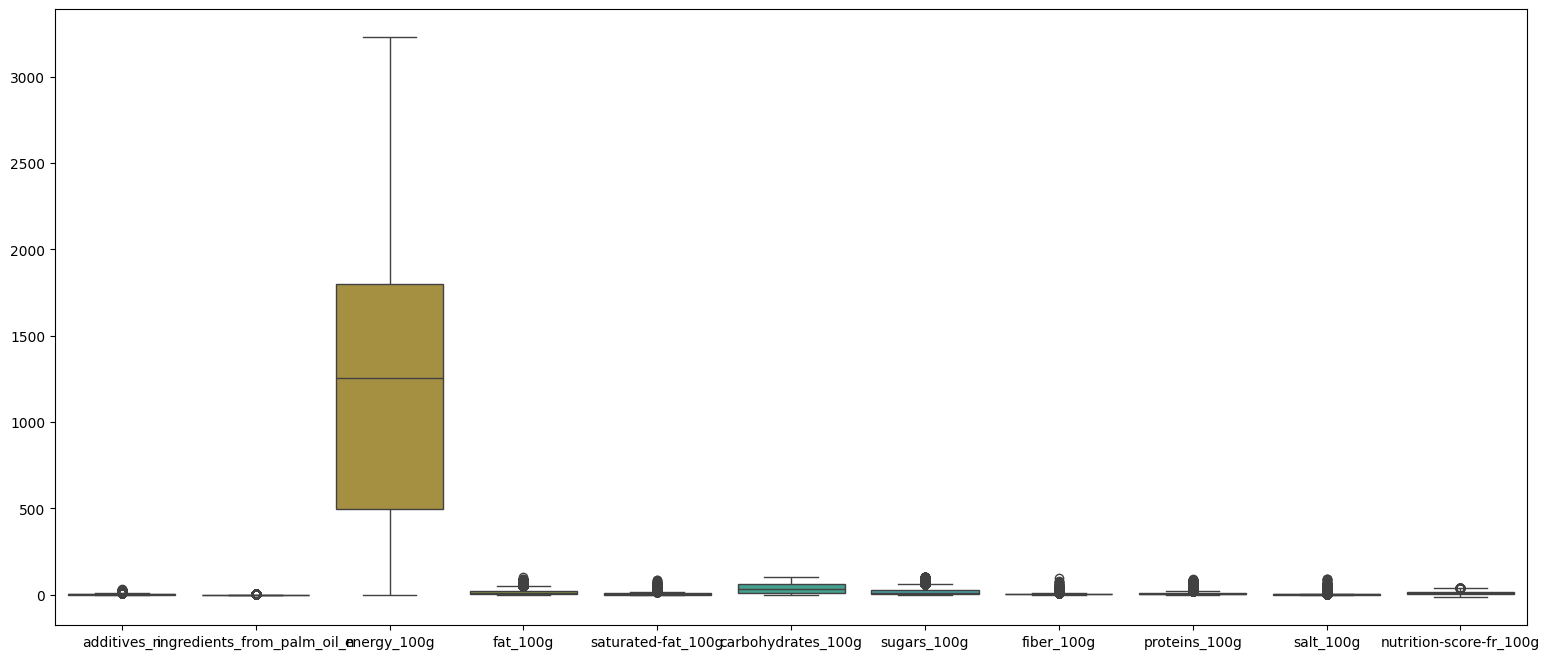

In [227]:
plt.figure(figsize = (19,8))
sns.boxplot(df_outliers)

### Additives

count    123802.000000
mean          2.097220
std           2.633482
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64


<Axes: ylabel='additives_n'>

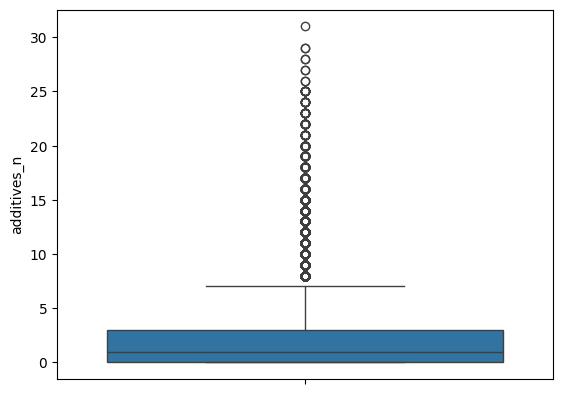

In [228]:
print(df_outliers['additives_n'].describe())
sns.boxplot(df_outliers['additives_n'])

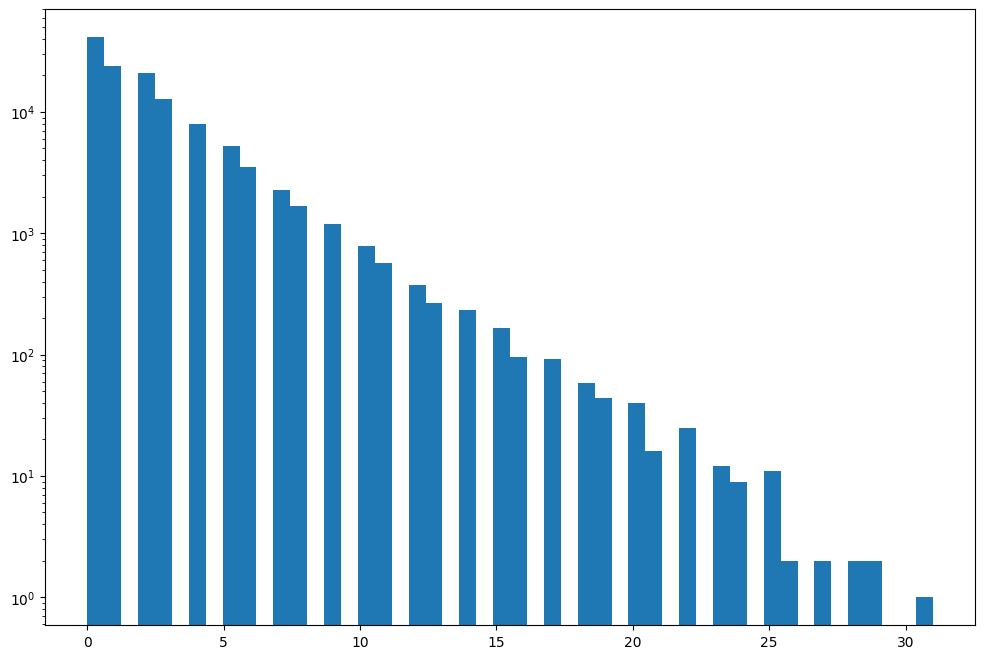

In [229]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['additives_n'], bins = 50, log = True)
plt.show()

Unimodal distribution, with clear bars because the values are discreet. Distribution stays the same than before outliers and missing values treatments

### Ingredients from palm oil n

count    123802.000000
mean          0.022891
std           0.151916
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64


<Axes: ylabel='ingredients_from_palm_oil_n'>

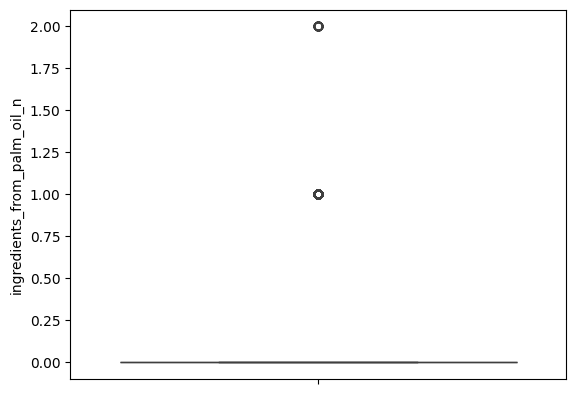

In [230]:
print(df_outliers['ingredients_from_palm_oil_n'].describe())
sns.boxplot(df_outliers['ingredients_from_palm_oil_n'])

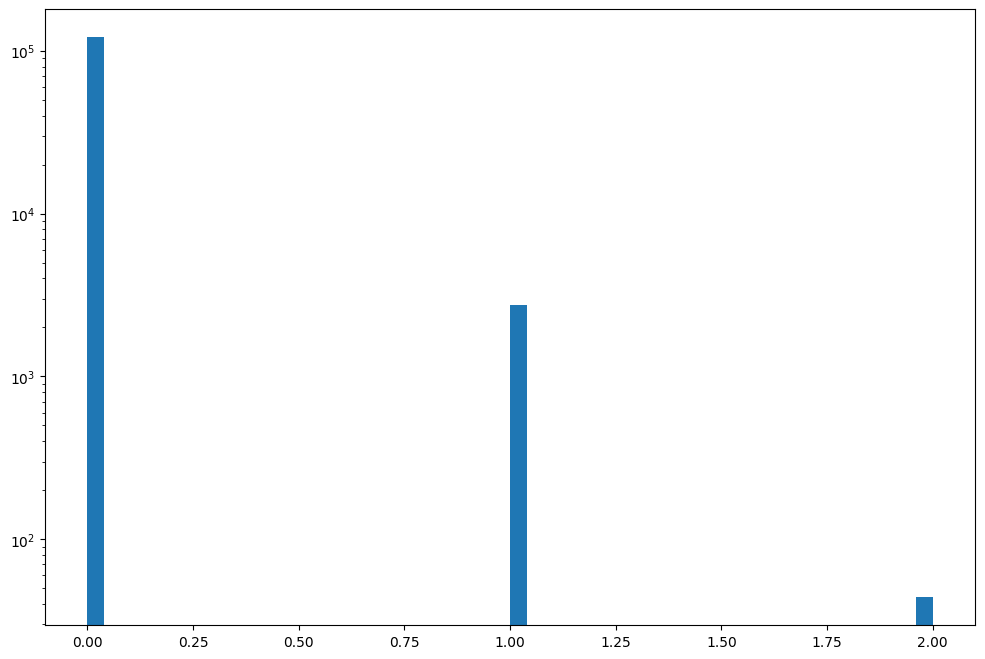

In [231]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['ingredients_from_palm_oil_n'], bins = 50, log = True)
plt.show()

Distribution has not changed either 0, 1 or 2.

### Energy

energy_100g

count    123802.000000
mean       1218.145770
std         739.822595
min           0.000000
25%         494.000000
50%        1255.000000
75%        1802.000000
max        3230.000000
Name: energy_100g, dtype: float64


<Axes: ylabel='energy_100g'>

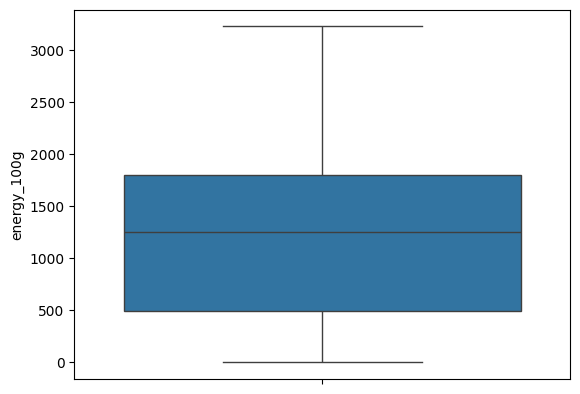

In [232]:
print(df_outliers['energy_100g'].describe())
sns.boxplot(df_outliers['energy_100g'])

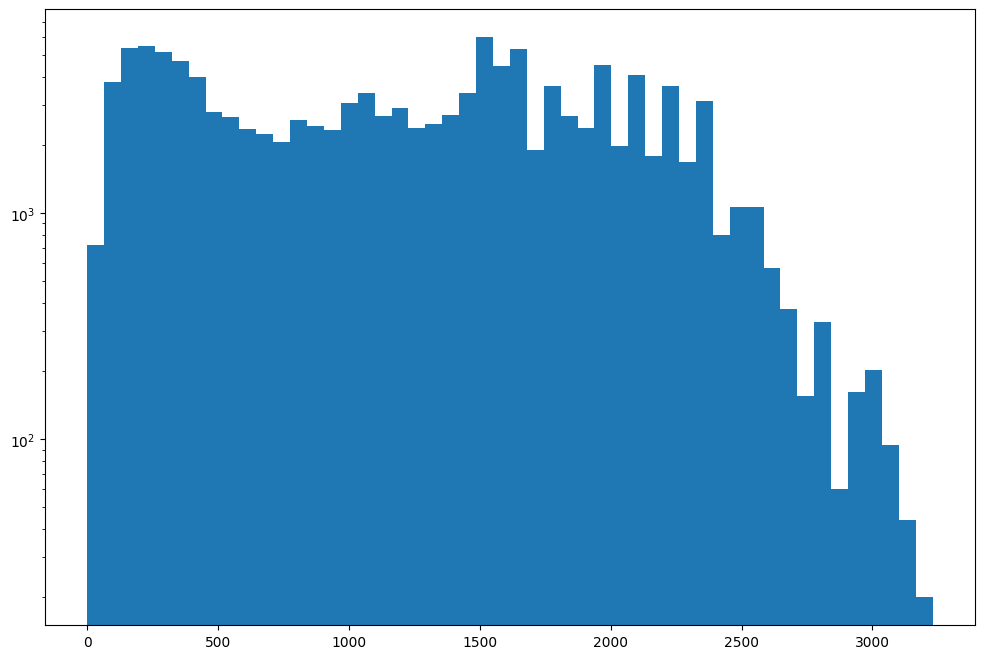

In [233]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['energy_100g'], bins = 50, log = True)
plt.show()

Bimodal distribution

### Fat

fat_100g

count    123802.000000
mean         12.992221
std          14.344969
min           0.000000
25%           1.700000
50%           7.890000
75%          20.590000
max         100.000000
Name: fat_100g, dtype: float64


<Axes: ylabel='fat_100g'>

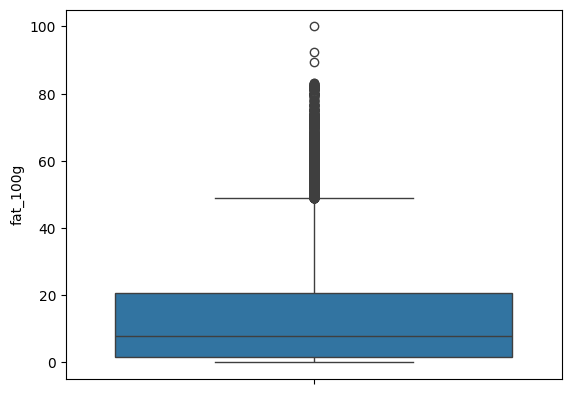

In [234]:
print(df_outliers['fat_100g'].describe())
sns.boxplot(df_outliers['fat_100g'])

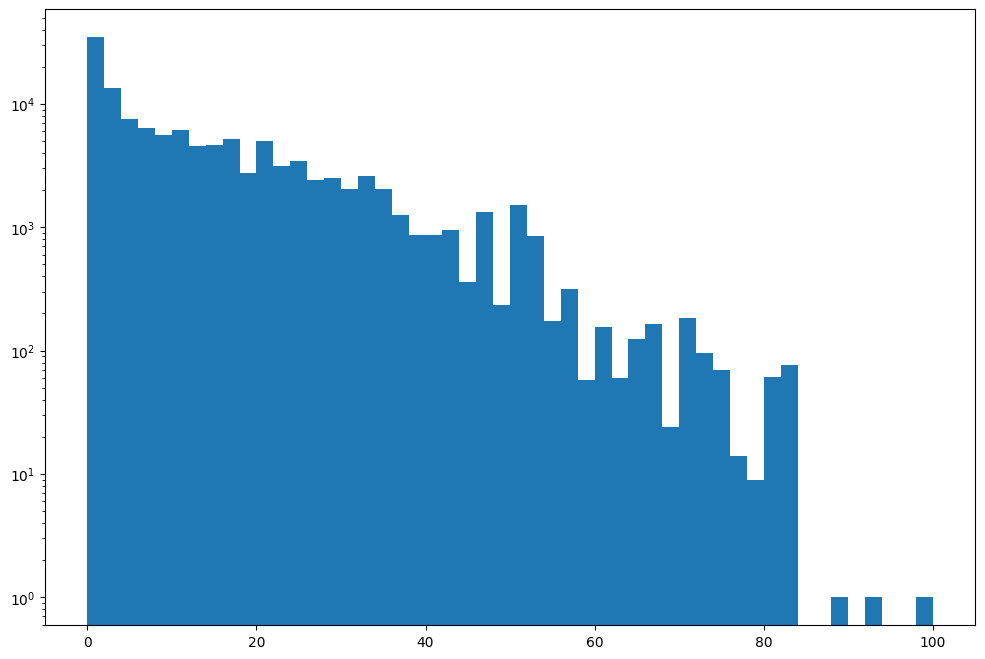

In [235]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['fat_100g'], bins = 50, log = True)
plt.show()

Unimodal distribution.
Distribution stays the same than before the outliers and missing values treatments

### Saturated fat

count    123802.000000
mean          4.689245
std           6.460272
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          83.330000
Name: saturated-fat_100g, dtype: float64


<Axes: ylabel='saturated-fat_100g'>

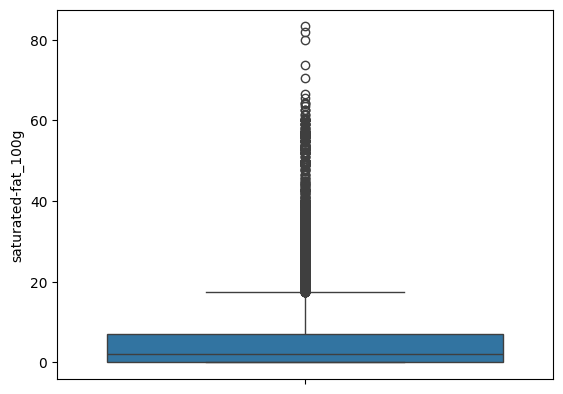

In [236]:
print(df_outliers['saturated-fat_100g'].describe())
sns.boxplot(df_outliers['saturated-fat_100g'])

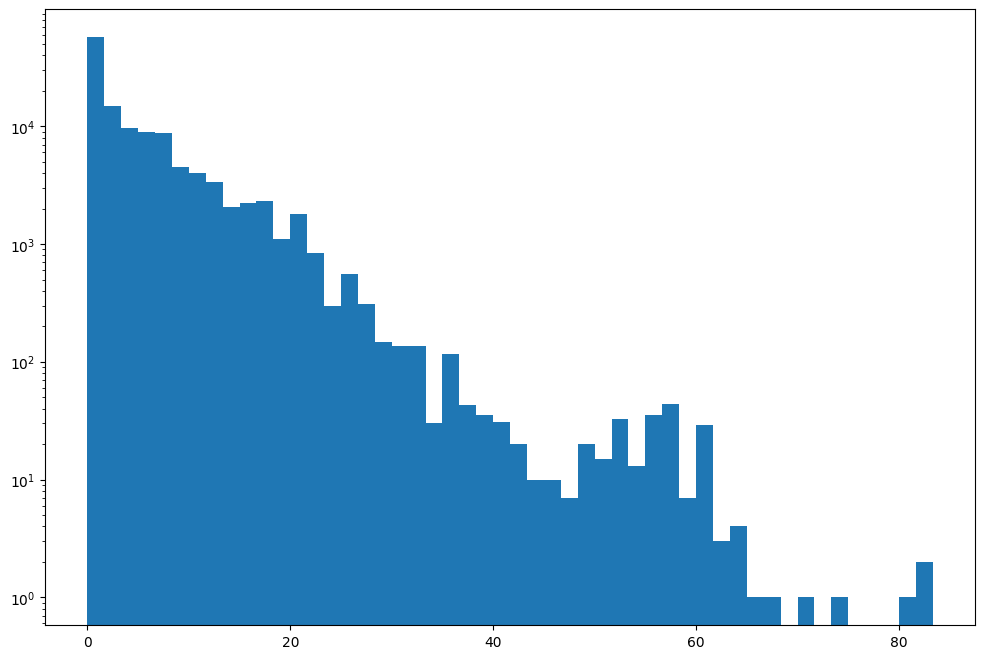

In [237]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['saturated-fat_100g'], bins = 50, log = True)
plt.show()

Unimodal. Distribution has not changed.

### Carbohydrates

carbohydrates_100g

count    123802.000000
mean         36.710133
std          26.394772
min           0.000000
25%          11.500000
50%          32.000000
75%          60.710000
max         100.000000
Name: carbohydrates_100g, dtype: float64


<Axes: ylabel='carbohydrates_100g'>

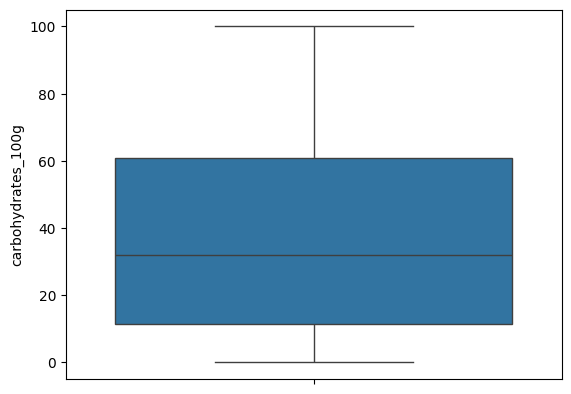

In [238]:
print(df_outliers['carbohydrates_100g'].describe())
sns.boxplot(df_outliers['carbohydrates_100g'])

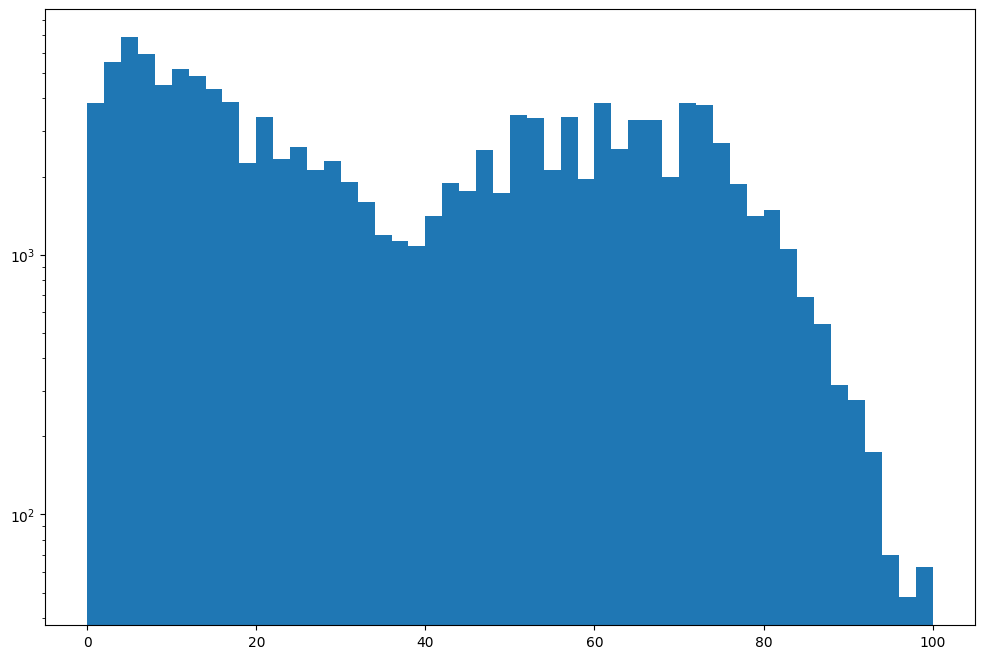

In [239]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['carbohydrates_100g'], bins = 50, log = True)
plt.show()

Bimodal distribution

### Sugar

count    123802.000000
mean         15.998326
std          17.658066
min           0.000100
25%           3.120000
50%           7.140000
75%          25.680000
max         100.000000
Name: sugars_100g, dtype: float64


<Axes: ylabel='sugars_100g'>

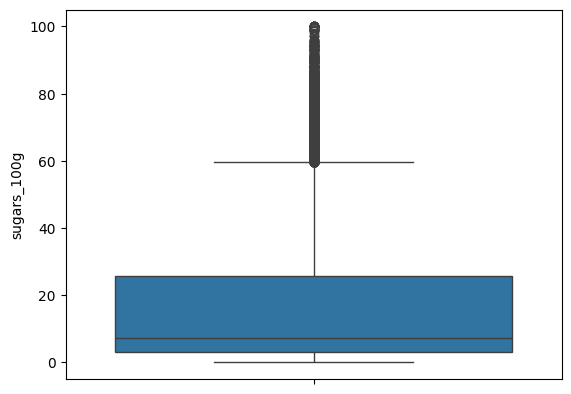

In [240]:
print(df_outliers['sugars_100g'].describe())
sns.boxplot(df_outliers['sugars_100g'])

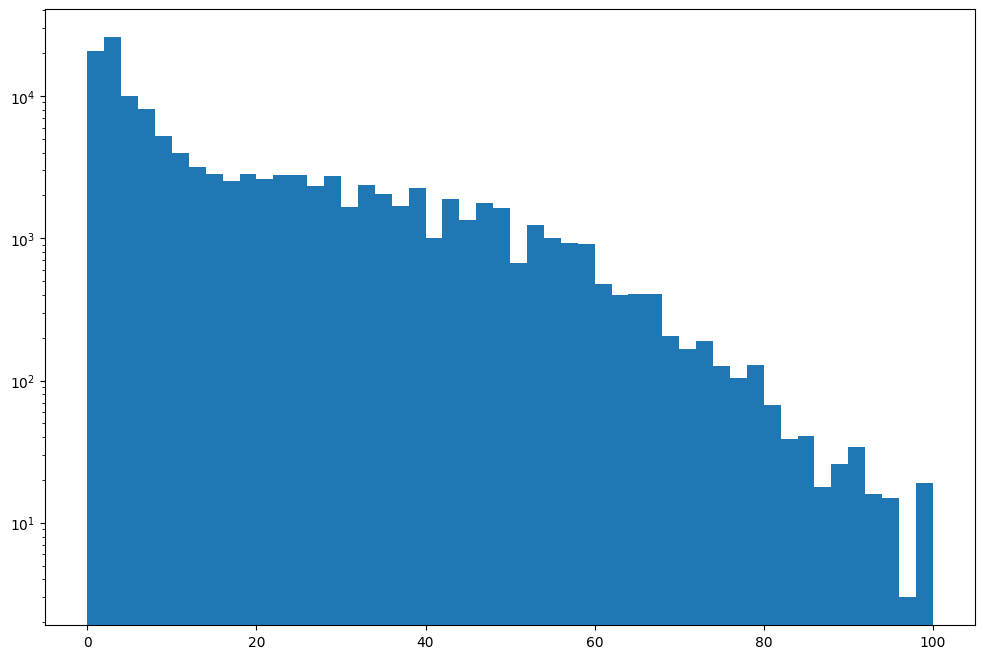

In [241]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['sugars_100g'], bins = 50, log = True)
plt.show()

Unimodal distribution

### Fiber

count    123802.000000
mean          3.241234
std           4.202326
min           0.000000
25%           0.500000
50%           2.100000
75%           4.000000
max          94.800000
Name: fiber_100g, dtype: float64


<Axes: ylabel='fiber_100g'>

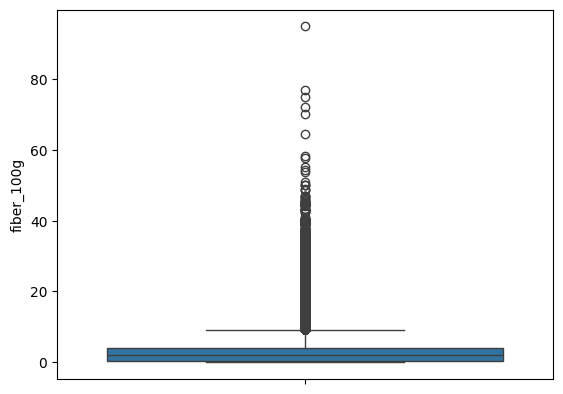

In [242]:
print(df_outliers['fiber_100g'].describe())
sns.boxplot(df_outliers['fiber_100g'])

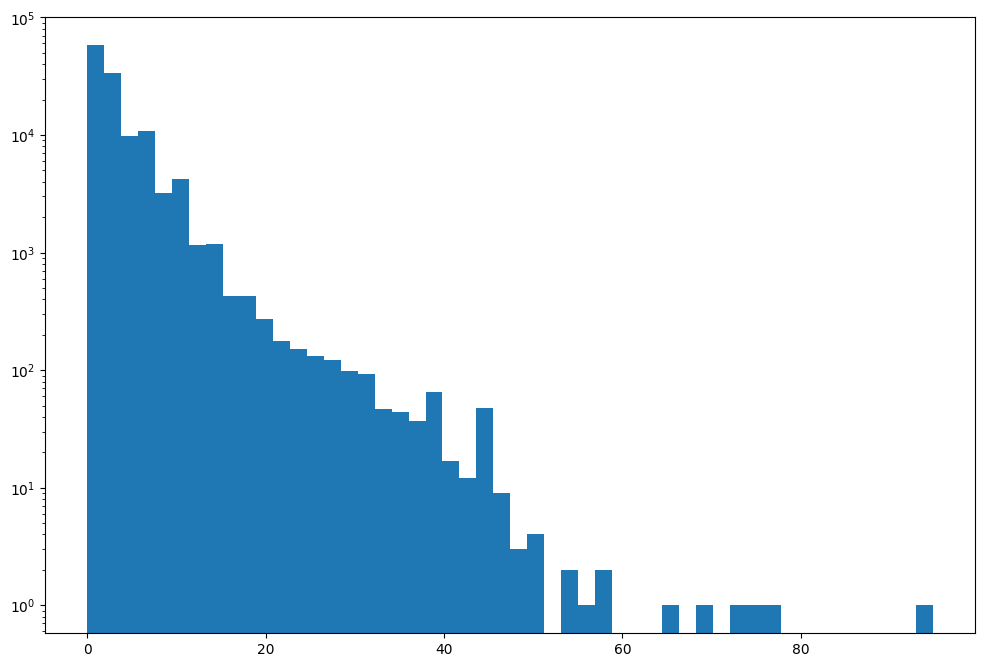

In [243]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['fiber_100g'], bins = 50, log = True)
plt.show()

Unimodal distribution

### Proteins

proteins_100g

count    123802.000000
mean          7.741483
std           6.896873
min           0.004000
25%           3.200000
50%           6.000000
75%          10.327500
max          90.000000
Name: proteins_100g, dtype: float64


<Axes: ylabel='proteins_100g'>

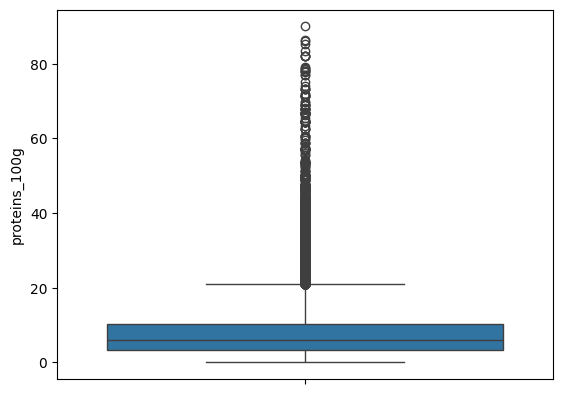

In [244]:
print(df_outliers['proteins_100g'].describe())
sns.boxplot(df_outliers['proteins_100g'])

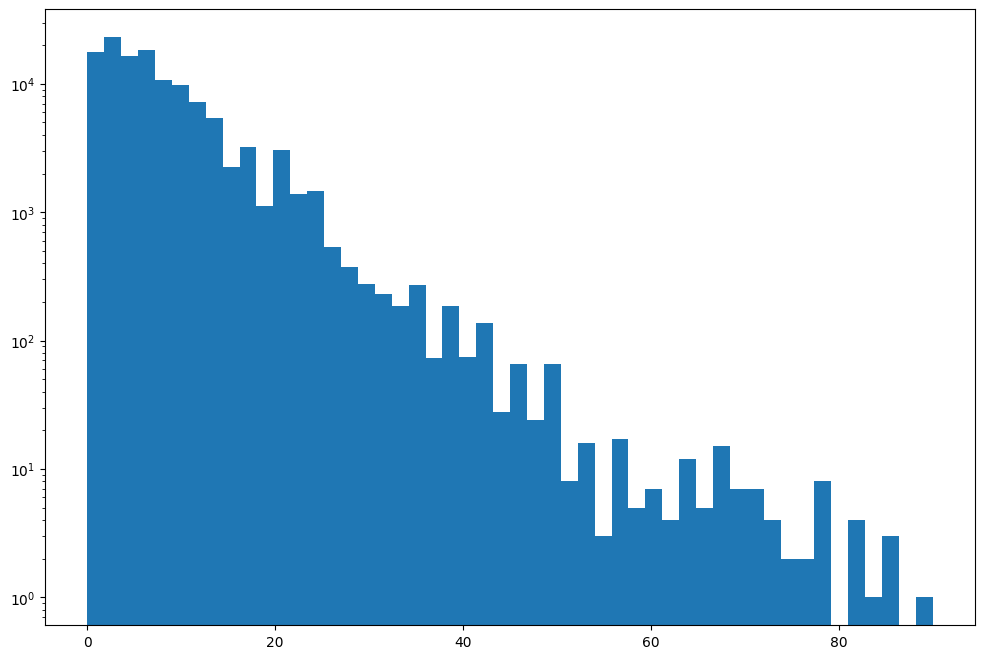

In [245]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['proteins_100g'], bins = 50, log = True)
plt.show()

Unimodal distribiution

### Salt

count    123802.000000
mean          0.969966
std           2.116566
min           0.000000
25%           0.130000
50%           0.635000
75%           1.193800
max          90.703400
Name: salt_100g, dtype: float64


<Axes: ylabel='salt_100g'>

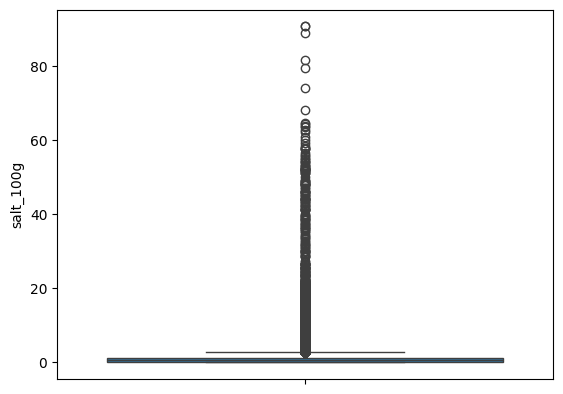

In [246]:
print(df_outliers['salt_100g'].describe())
sns.boxplot(df_outliers['salt_100g'])

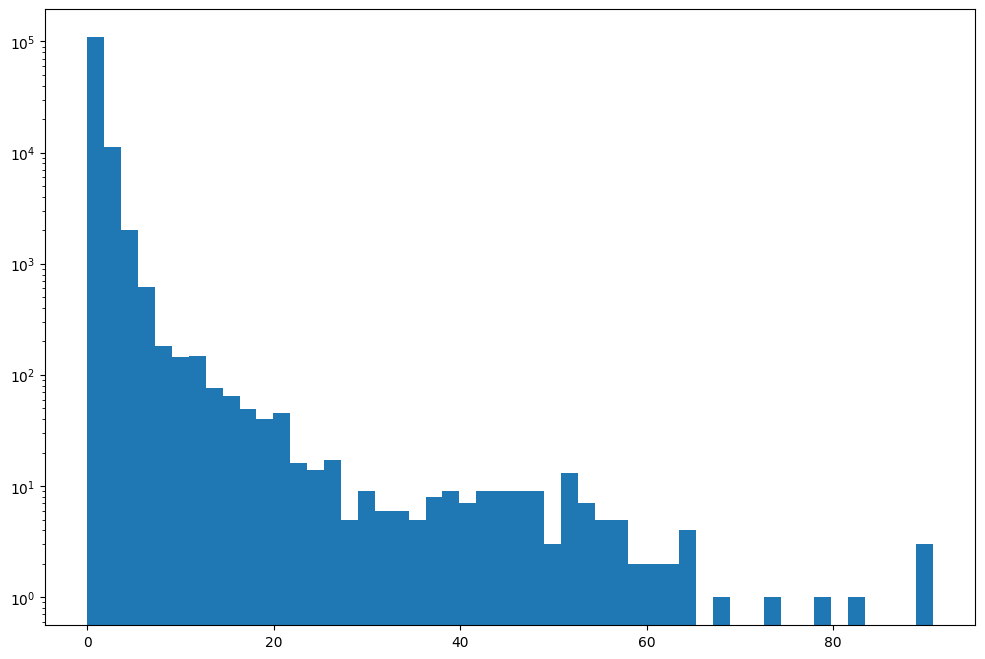

In [247]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['salt_100g'], bins = 50, log = True)
plt.show()

Unimodal distribution

### Nutriscore

count    123802.000000
mean          8.587792
std           9.186173
min         -15.000000
25%           0.531224
50%           9.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64


<Axes: ylabel='nutrition-score-fr_100g'>

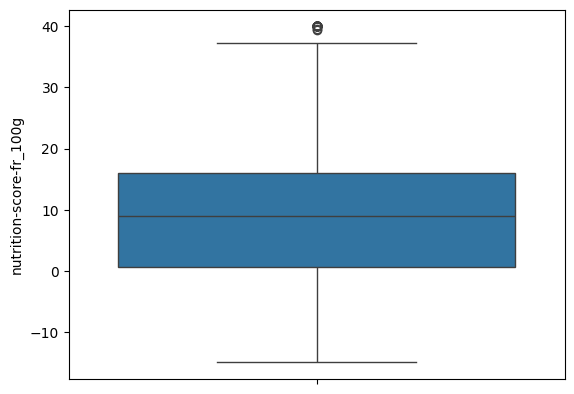

In [248]:
print(df_outliers['nutrition-score-fr_100g'].describe())
sns.boxplot(df_outliers['nutrition-score-fr_100g'])

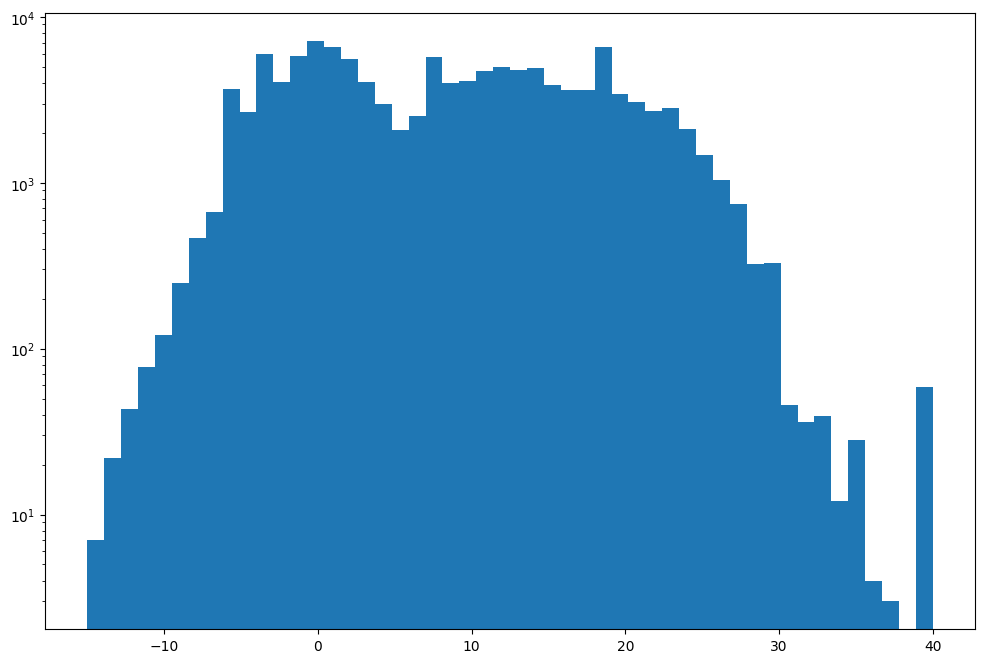

In [249]:
#Distribution log scale
plt.figure(figsize = (12,8))
plt.hist(df_outliers['nutrition-score-fr_100g'], bins = 50, log = True)
plt.show()

Bimodal distribution

## Variables choices

The goal of my analysis is to find out whether it is possible to suggest the nutriscore using the variables that are usually filled in the dataset(the most filled variables). 

In some cases in this dataset, the nutriscore is missing, the purpose of Open Food Fact is to help people make healthier choices and the nutriscore is a simple way to see what products are healthy, it would be interesting to be able to suggest a nutriscore based on other variables values.

In this part I will try to verify the assumption that the nutriscore can be suggested. 

The nutriscore seems to be the variable with the highest linear correlation to other variables (according to the linear correlation matrix made earlier).It makes sense since the remaining variable (the variables I used to create the correlation matrix) are mostly the ones used to caculate the nutriscore.

The exact variables used in the nutriscore calculation are : 
Energy (kJ), Energy (kcal),Sugars (g), Saturated fatty acids, monounsaturated fatty acids, Sodium (mg), Fibers, Proteines (g).
However the dataset does not contain all these variables (the original dataset before I deleted any columns). It would therefore be interesting to see if a suggestion can be made based on the variables that we do have.

Since the variables are not on the same scale. I have to center and standardise them to be able to study variables together in a bivariate analysis.
Centering means moving the data to the center of a graph so that the mean will be equal to 0, while standardisation means artificially putting the standard deviation at 1.

## Centering and standardising

In [250]:
#Creating a df with quantitative values only
df_standard = df_outliers.drop(columns = ['product_name','brands','countries','ingredients_text','additives','nutrition_grade_fr'])
df_standard

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.10,17.860,0.635000,0.000000
1,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.10,17.860,1.224280,12.000000
2,0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.70,13.460,1.737508,7.079986
3,2.0,0.0,1833.0,18.75,4.69,57.81,15.62,9.40,14.060,0.139700,7.000000
4,0.0,0.0,2406.0,37.50,22.50,55.00,42.50,7.50,5.000,0.103688,23.929571
...,...,...,...,...,...,...,...,...,...,...,...
123797,1.0,0.0,660.0,6.90,0.50,23.10,16.70,0.60,0.300,0.541020,6.000000
123798,5.0,0.0,1031.0,1.30,1.28,95.31,0.10,1.47,0.004,0.001000,2.000000
123799,1.0,0.0,1393.0,9.72,2.78,61.11,30.56,8.30,5.560,0.952500,11.000000
123800,0.0,0.0,1477.0,0.00,0.00,87.06,2.35,4.70,1.180,0.030480,-1.000000


In [251]:
df_standard.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000,123802.000000
mean,2.097220,0.022891,1218.145770,12.992221,4.689245,36.710133,15.998326,3.241234,7.741483,0.969966,8.587792
std,2.633482,0.151916,739.822595,14.344969,6.460272,26.394772,17.658066,4.202326,6.896873,2.116566,9.186173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.004000,0.000000,-15.000000
25%,0.000000,0.000000,494.000000,1.700000,0.000000,11.500000,3.120000,0.500000,3.200000,0.130000,0.531224
50%,1.000000,0.000000,1255.000000,7.890000,2.000000,32.000000,7.140000,2.100000,6.000000,0.635000,9.000000
75%,3.000000,0.000000,1802.000000,20.590000,7.000000,60.710000,25.680000,4.000000,10.327500,1.193800,16.000000
max,31.000000,2.000000,3230.000000,100.000000,83.330000,100.000000,100.000000,94.800000,90.000000,90.703400,40.000000


In [252]:
# Instanciating the scaler :
scaler = StandardScaler()

# Fitting the scaler to the data and transforming it to obtain a normalise and standardised dataframe.
scaled_df = scaler.fit_transform(df_standard)

# Turning it into a new dataframe 
scaled_df = pd.DataFrame(scaled_df)

# Describing the new dataframe
scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10
count,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.80,-0.15,-1.65,-0.91,-0.73,-1.39,-0.91,-0.77,-1.12,-0.46,-2.57
25%,-0.80,-0.15,-0.98,-0.79,-0.73,-0.96,-0.73,-0.65,-0.66,-0.40,-0.88
50%,-0.42,-0.15,0.05,-0.36,-0.42,-0.18,-0.50,-0.27,-0.25,-0.16,0.04
75%,0.34,-0.15,0.79,0.53,0.36,0.91,0.55,0.18,0.37,0.11,0.81
max,10.98,13.01,2.72,6.07,12.17,2.40,4.76,21.79,11.93,42.40,3.42


We can now see that all means are equal to 0 and all standard deviations are equal to 1. 
The dataframe has been centered and standardised.

In [253]:
scaled_df.columns = df_standard.columns
scaled_df.describe().round(2)

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00,123802.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.80,-0.15,-1.65,-0.91,-0.73,-1.39,-0.91,-0.77,-1.12,-0.46,-2.57
25%,-0.80,-0.15,-0.98,-0.79,-0.73,-0.96,-0.73,-0.65,-0.66,-0.40,-0.88
50%,-0.42,-0.15,0.05,-0.36,-0.42,-0.18,-0.50,-0.27,-0.25,-0.16,0.04
75%,0.34,-0.15,0.79,0.53,0.36,0.91,0.55,0.18,0.37,0.11,0.81
max,10.98,13.01,2.72,6.07,12.17,2.40,4.76,21.79,11.93,42.40,3.42


<Axes: >

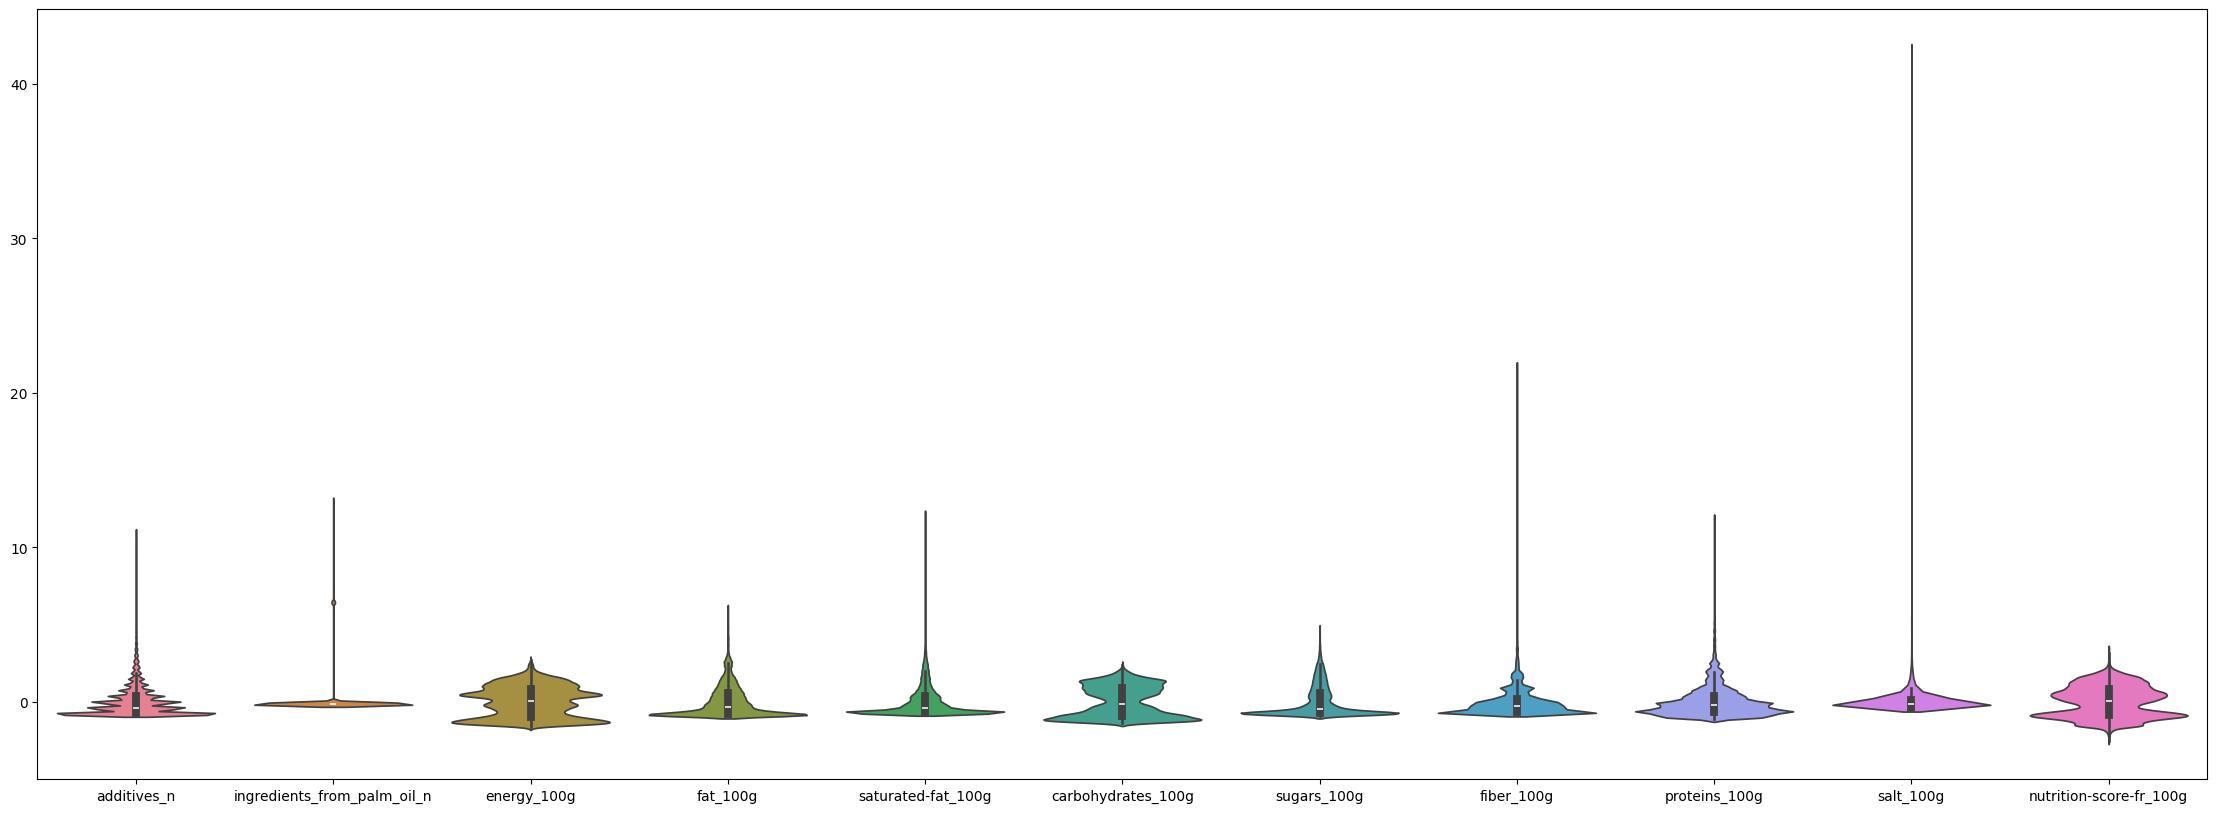

In [254]:
plt.figure(figsize = (28,10))
sns.violinplot(data = scaled_df)

Thanks to the violin plot we can observe the distribution and data concentration of each variable. Energy and nutriscore have similar distribution and data concentration, fat and saturated fat have similar distribution and data concentration.

To continue the analysis, I will only keep variables that either have a clear correlation with the nutriscore, or are included in its calculation.

## Bivariate Quantitative

### Nutriscore

In [255]:
scaled_df.describe().round(5)

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000,123802.00000
mean,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-0.79637,-0.15069,-1.64654,-0.90570,-0.72586,-1.39082,-0.90600,-0.77130,-1.12189,-0.45828,-2.56776
25%,-0.79637,-0.15069,-0.97881,-0.78719,-0.72586,-0.95512,-0.72932,-0.65232,-0.65849,-0.39685,-0.87704
50%,-0.41664,-0.15069,0.04982,-0.35568,-0.41628,-0.17845,-0.50166,-0.27157,-0.25250,-0.15826,0.04487
75%,0.34281,-0.15069,0.78918,0.52965,0.35769,0.90927,0.54829,0.18056,0.37496,0.10575,0.80689
max,10.97517,13.01457,2.71938,6.06541,12.17303,2.39783,4.75715,21.78773,11.92698,42.39593,3.41952


In [256]:
scaled_df.corr(method = 'pearson')

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
additives_n,1.000000,0.110208,0.017997,-0.071763,0.006415,0.125430,0.106720,-0.186806,-0.071543,0.065059,0.193203
ingredients_from_palm_oil_n,0.110208,1.000000,0.090402,0.054420,0.089777,0.077981,0.057197,-0.003742,-0.019013,0.039758,0.104529
energy_100g,0.017997,0.090402,1.000000,0.784518,0.574092,0.643755,0.445054,0.340599,0.368371,0.040119,0.660820
fat_100g,-0.071763,0.054420,0.784518,1.000000,0.697096,0.073107,0.167621,0.217982,0.300023,0.012448,0.596375
saturated-fat_100g,0.006415,0.089777,0.574092,0.697096,1.000000,0.122711,0.351683,0.034391,0.062077,-0.023234,0.688293
carbohydrates_100g,0.125430,0.077981,0.643755,0.073107,0.122711,1.000000,0.601858,0.267123,0.026510,0.001478,0.372440
sugars_100g,0.106720,0.057197,0.445054,0.167621,0.351683,0.601858,1.000000,0.002545,-0.173914,-0.101897,0.605928
fiber_100g,-0.186806,-0.003742,0.340599,0.217982,0.034391,0.267123,0.002545,1.000000,0.353441,-0.008189,-0.109472
proteins_100g,-0.071543,-0.019013,0.368371,0.300023,0.062077,0.026510,-0.173914,0.353441,1.000000,0.161983,0.080629
salt_100g,0.065059,0.039758,0.040119,0.012448,-0.023234,0.001478,-0.101897,-0.008189,0.161983,1.000000,0.202352


#### Nutriscore and additives

In [257]:
#Regrouper les valeurs par groupes pour étudier la dispersion ?

In [258]:
additives = scaled_df[['nutrition-score-fr_100g','additives_n']]

<Axes: xlabel='nutrition-score-fr_100g', ylabel='additives_n'>

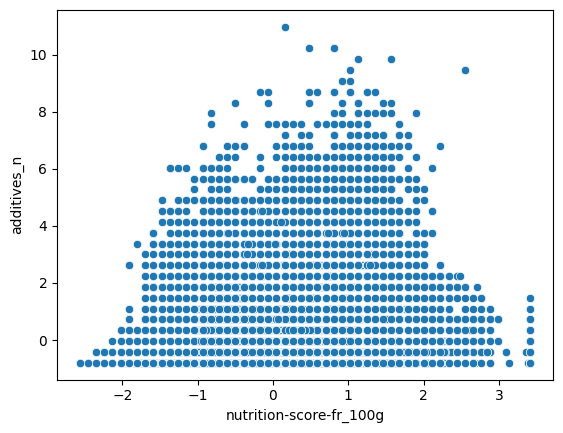

In [259]:
sns.scatterplot(data = additives, x = 'nutrition-score-fr_100g', y = 'additives_n')

As shown in the correlation matrix and in the scatter plot, there is no linear correlation between the number of additives and the nutriscore and it would be pointless to create a regression line using these two variables.

It makes sense since the number of additives is not taken into account when calculating the nutriscore.

This variable will not be used to continue the analysis.

<Axes: >

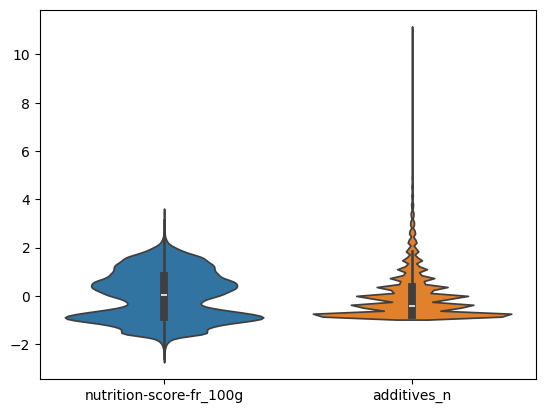

In [260]:
#Looking at another kind of bivariate graphs
sns.violinplot( data = additives)

The violin plots are very different : the concentration of data is very different. The variables distributions are different. There doesn't see to be link between the two variables.

#### Nutriscore and ingredients from palm oil

Nutriscore and Ingredients from plam oil have an even lower linear correlation

In [261]:
ing_palmoil = scaled_df[['nutrition-score-fr_100g','ingredients_from_palm_oil_n']]

<Axes: xlabel='ingredients_from_palm_oil_n', ylabel='nutrition-score-fr_100g'>

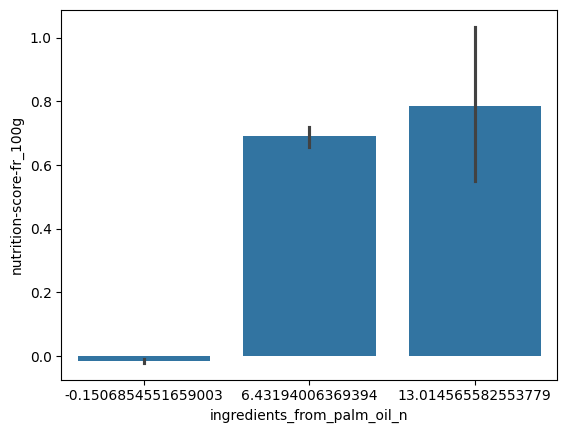

In [262]:
sns.barplot(data = ing_palmoil, y = 'nutrition-score-fr_100g', x = 'ingredients_from_palm_oil_n')

Since ingredients from palm oil can only be 0, 1 or 2. Using a scatter plot is not relevant in this case.

The number of additives is not taken into account when calculating the nutriscore.
Here we can however see that when the number of ingredients from palm oil increases, the nutriscore increases too. But, as shown in the correlation matrix, there is no linear correlation between this variable and the nutriscore.

This variable will not be used to continue the analysis.

#### Nutriscore and energy_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='energy_100g'>

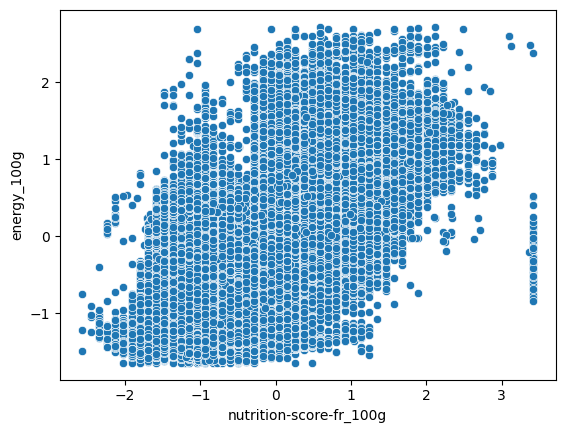

In [263]:
energy = scaled_df[['nutrition-score-fr_100g','energy_100g']]
sns.scatterplot(data = energy, x = 'nutrition-score-fr_100g', y = 'energy_100g')

In this case, we can see that the scatter plot seems to have a "direction" and it might be interesting to study the relationship between the two variables.

<Axes: >

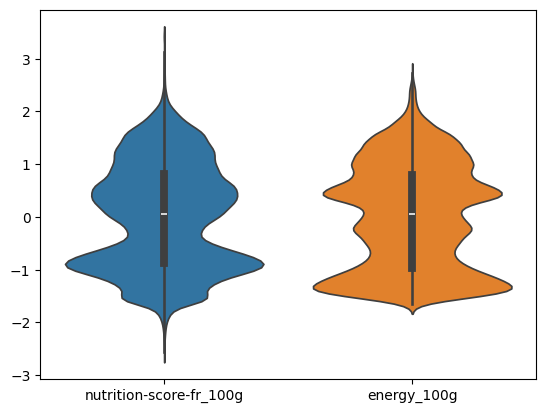

In [264]:
sns.violinplot(energy)

Here we can see that violin tend to show a similar distribution. Which indicate that there might be a link between the two variables.

#### Nutriscore and fat_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='fat_100g'>

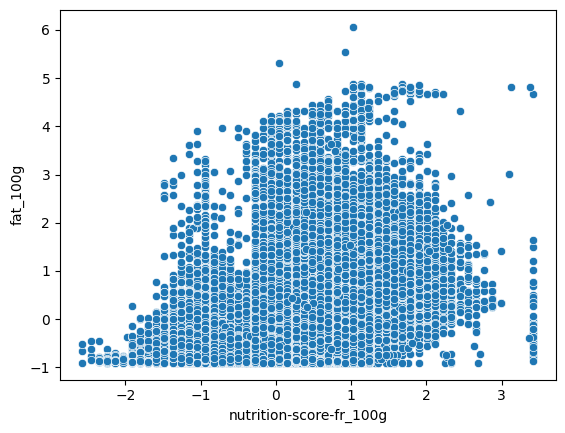

In [265]:
fat = scaled_df[['nutrition-score-fr_100g','fat_100g']]
sns.scatterplot(data = fat, x = 'nutrition-score-fr_100g', y = 'fat_100g')

The person correlation indicated a fairly good linear correlation between the two variables but the scatter plot is less clear than the scatter plot made for the energy variable. It would still be interesting to study the relation ship between fat and the nutriscore.

#### Nutriscore and saturated-fat_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='saturated-fat_100g'>

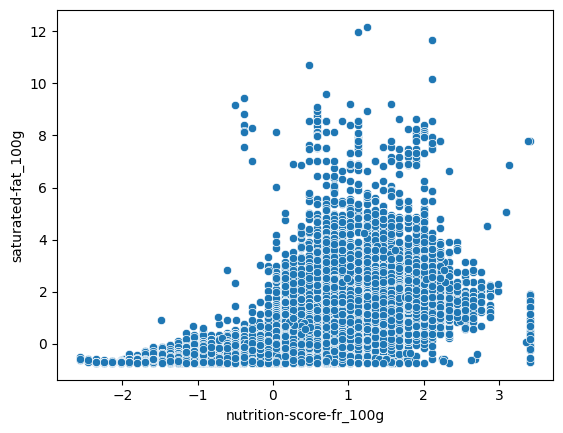

In [266]:
saturated_fat = scaled_df[['nutrition-score-fr_100g','saturated-fat_100g']]
sns.scatterplot(data = saturated_fat, x = 'nutrition-score-fr_100g', y = 'saturated-fat_100g')

#### Nutriscore and carbohydrates_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='carbohydrates_100g'>

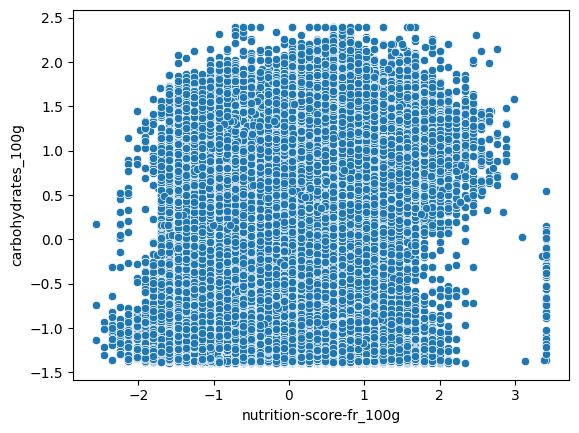

In [267]:
carbohydrate = scaled_df[['nutrition-score-fr_100g','carbohydrates_100g']]
sns.scatterplot(data = carbohydrate, x = 'nutrition-score-fr_100g', y = 'carbohydrates_100g')

No linear correlation, as shown in the correlation matrix.
As shown in the correlation matrix and in the scatter plot, there is no linear correlation between this variable and the nutriscore. It makes sense since the number of additives is not taken into account when calculating the nutriscore.

This variable will not be used to continue the analysis.

#### Nutriscore and sugars_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='sugars_100g'>

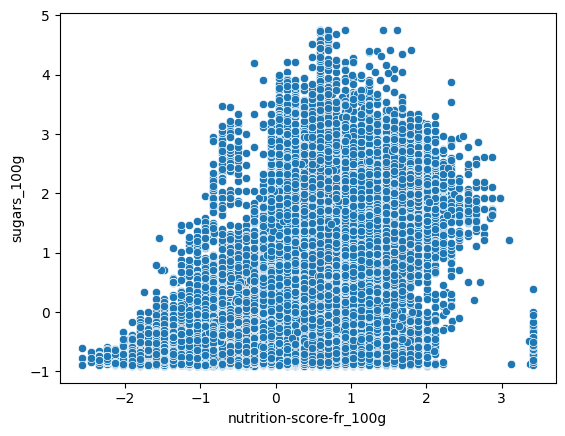

In [268]:
sugar = scaled_df[['nutrition-score-fr_100g','sugars_100g']]
sns.scatterplot(data = sugar, x = 'nutrition-score-fr_100g', y = 'sugars_100g')

In this case, we can see that the scatter plot seems to have a "direction" and it might be interesting to study the relationship between the two variables.

#### Nutriscore and fiber_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='fiber_100g'>

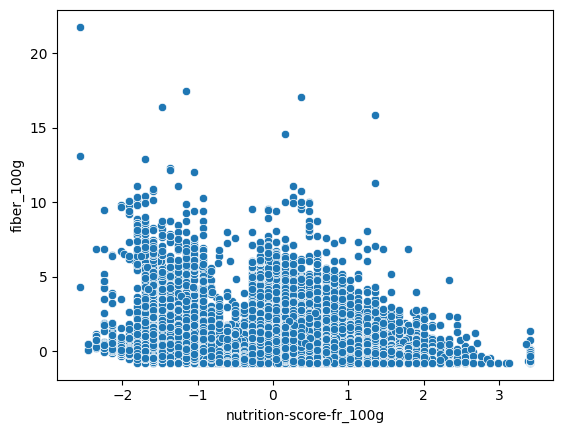

In [269]:
fiber = scaled_df[['nutrition-score-fr_100g','fiber_100g']]
sns.scatterplot(data = fiber, x = 'nutrition-score-fr_100g', y = 'fiber_100g')

We can see that the diagrame is shifted to the left compared to ohter varibales. Which is confirmed by the linear correlation matrix (negative value) Although there is no clear linear relationship between the two. The fiber rate is however included in the nutriscore calculation, it would be interesting to study the relationship between the two.xs

#### Nutriscore and proteins_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='proteins_100g'>

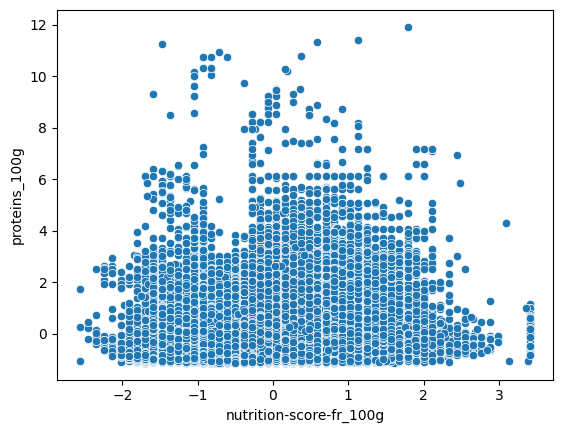

In [270]:
proteins = scaled_df[['nutrition-score-fr_100g','proteins_100g']]
sns.scatterplot(data = proteins, x = 'nutrition-score-fr_100g', y = 'proteins_100g')

No clear relationship seem to unite the two variables in the scatter plot or in the correlation matrix, however the protein rate is included in the nutriscore calculation. It would be interesting to see the relationship between the two.

#### Nutriscore and salt_100g

<Axes: xlabel='nutrition-score-fr_100g', ylabel='salt_100g'>

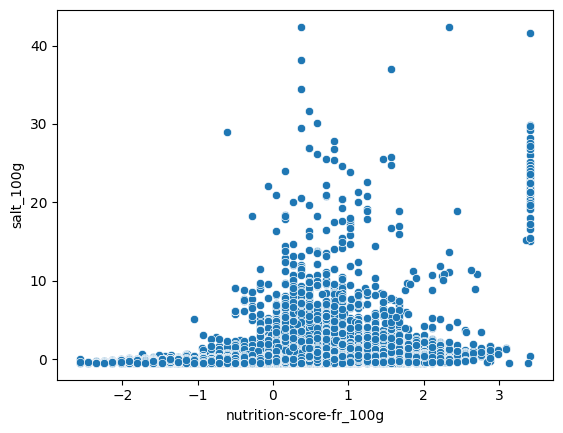

In [271]:
salt = scaled_df[['nutrition-score-fr_100g','salt_100g']]
sns.scatterplot(data = salt, x = 'nutrition-score-fr_100g', y = 'salt_100g')

Salt is similar to sodium and included in the nutriscore calculation. Will study the relation ship between the two.

### Spearman rank correlation tests

Based on the correlation matrix, some variables have a clear linear relationship with the nutriscore, however, a few of them (that are included in its calculation) don't seem to have this kind of relationship.

I will use another correlation test to see if I can find a type of relationship between the nutriscore and variables that don't have a linear correlation with it.

#### Nutriscore and additives

In [272]:
rho, p = spearmanr(scaled_df['nutrition-score-fr_100g'], scaled_df['additives_n'])
print(f"Regarding additives, Rho = {rho}, and p = {p}")

Regarding additives, Rho = 0.2713212463556374, and p = 0.0


The relationship between the two variables is not strong

The p value is below 0.5, which indicates that the result is statistically significant.

The correlation is statistically significant but is very low.

#### Nutriscore and fiber_100g

##### Spearman

Spearman rank correlation. Looking for a monotonic relationship between the two variables.

In [273]:
rho, p = spearmanr(scaled_df['nutrition-score-fr_100g'], scaled_df['fiber_100g'])

In [274]:
print(f"Regarding fibers, Rho = {rho}, and p = {p}")

Regarding fibers, Rho = -0.1279652558377742, and p = 0.0


The negative relationship between the two variables is not strong

The p value is below 0.5, which indicates that the result is statistically significant.

The correlation is statistically significant but is very low.

#### Nutriscore and proteins_100g

##### Spearman

In [275]:
rho, p = spearmanr(scaled_df['nutrition-score-fr_100g'], scaled_df['proteins_100g'])

In [276]:
print(f" Regarging proteins, Rho = {rho}, and p = {p}")

 Regarging proteins, Rho = 0.10507310736964648, and p = 7.712581961529104e-301


Very weak relationship between proteins and the nutriscore. 

The p value is below 0.5, the results is statistically significant

#### Nutriscore and salt_100g

In [277]:
rho, p = spearmanr(scaled_df['nutrition-score-fr_100g'], scaled_df['salt_100g'])

In [278]:
print(f" Regarging salt, Rho = {rho}, and p = {p}")

 Regarging salt, Rho = 0.32548356098954695, and p = 0.0


Very low positive relationship, but statistically significant.

Fibers, proteins and salt seem to have a lower correlation with the nutriscore. Although they are included in the nutriscore calculation.

## Multivariate quantitative

### Normed PCA

Another way to have a good overview of the data would be using a PCA.
It will help reducing the number of variables by grouping them to create new variables (new components) using the variance of each original variable. In our case, reducing the number of varibales is not very useful since we only have a few variables left. But the PCA will still give valuable information about the data.

Each component will indicate the most important variables in this component (the ones with the highest variance).
The PCA will also "group" variable that have a high correlation with each other, which would be useful to use a linear ML model that needs all 

In [279]:
scaled_pca = scaled_df[['energy_100g','fat_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']]

In [280]:
n_components = 7

pca = PCA(n_components = n_components)

In [281]:
pca.fit(scaled_pca)

PCA(n_components=7)

Looking at the variances of each new component. Each component includes a part of the total variance of the data.

In [282]:
pca.explained_variance_ratio_

array([0.42002768, 0.19815766, 0.13707887, 0.10126895, 0.07116154,
       0.04018846, 0.01771548])

The first component includes variables that explain 41% of the total variance of the our sample. 
The second component explains 19% of its variance and so on.

In [283]:
#Creating a variable with the variance ratios.
scree = (pca.explained_variance_ratio_*100).round(2)

#Creating a cumulating sum to create a scree plot
scree_cum = scree.cumsum().round()
scree_cum

array([42., 62., 76., 86., 93., 97., 99.])

In [284]:
#Defining a variable with the components list
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

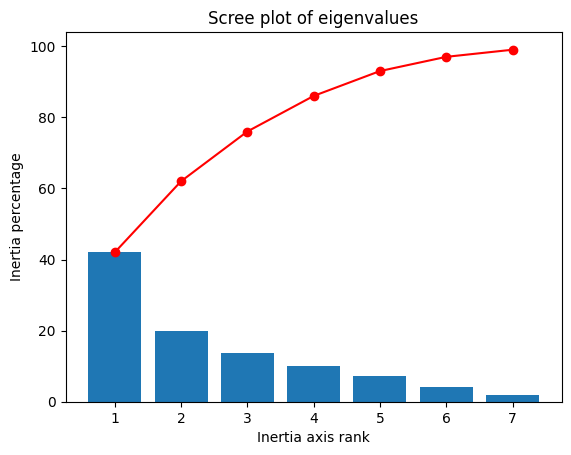

In [285]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Inertia axis rank")
plt.ylabel("Inertia percentage")
plt.title("Scree plot of eigenvalues")
plt.show(block=False)

In the scree plot, we can see that 80% of the variance of our sample is contained within the first 3 components.

In [286]:
#Looking at the newly calculated components
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.491757,0.464610,0.441979,0.296876,0.123364,0.162909,0.044159,0.463815
1,0.144563,0.145371,-0.152284,-0.417160,0.542384,0.609988,0.162753,-0.260771
2,-0.092100,-0.043460,-0.017572,-0.169577,-0.369553,0.112689,0.867435,0.242595
3,0.098013,-0.382370,-0.346441,0.635012,0.473485,-0.055828,0.298310,0.068055
4,-0.072832,0.196010,0.281878,-0.255636,0.477819,-0.693704,0.289287,-0.135085
5,-0.495088,-0.394898,0.677925,0.089659,0.194714,0.299012,-0.014217,0.061632
6,0.227149,0.080766,0.288075,0.346565,-0.247266,0.060308,0.210501,-0.793535


In [287]:
#Renaming columns
pcs.columns = scaled_pca.columns

#Attributing numbers to each feature
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
F1,0.49,0.46,0.44,0.30,0.12,0.16,0.04,0.46
F2,0.14,0.15,-0.15,-0.42,0.54,0.61,0.16,-0.26
F3,-0.09,-0.04,-0.02,-0.17,-0.37,0.11,0.87,0.24
F4,0.10,-0.38,-0.35,0.64,0.47,-0.06,0.30,0.07
F5,-0.07,0.20,0.28,-0.26,0.48,-0.69,0.29,-0.14
F6,-0.50,-0.39,0.68,0.09,0.19,0.30,-0.01,0.06
F7,0.23,0.08,0.29,0.35,-0.25,0.06,0.21,-0.79


In [288]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7
energy_100g,0.491757,0.144563,-0.092100,0.098013,-0.072832,-0.495088,0.227149
fat_100g,0.464610,0.145371,-0.043460,-0.382370,0.196010,-0.394898,0.080766
saturated-fat_100g,0.441979,-0.152284,-0.017572,-0.346441,0.281878,0.677925,0.288075
sugars_100g,0.296876,-0.417160,-0.169577,0.635012,-0.255636,0.089659,0.346565
fiber_100g,0.123364,0.542384,-0.369553,0.473485,0.477819,0.194714,-0.247266
proteins_100g,0.162909,0.609988,0.112689,-0.055828,-0.693704,0.299012,0.060308
salt_100g,0.044159,0.162753,0.867435,0.298310,0.289287,-0.014217,0.210501
nutrition-score-fr_100g,0.463815,-0.260771,0.242595,0.068055,-0.135085,0.061632,-0.793535


After indicating each variables' name, we can see that :

The first component is mainly influenced by energy, fat, saturated fat and nutriscore.

The second component is mainly influenced by energy, sugars, fiber and proteins.

The third component is mainly influenced by salt. Etc..

Below is a heatmap of the results of the PCA , in which we can also see that some variables largely influence multiple components, for example, saturated fat influences the first and fith component.

<Axes: >

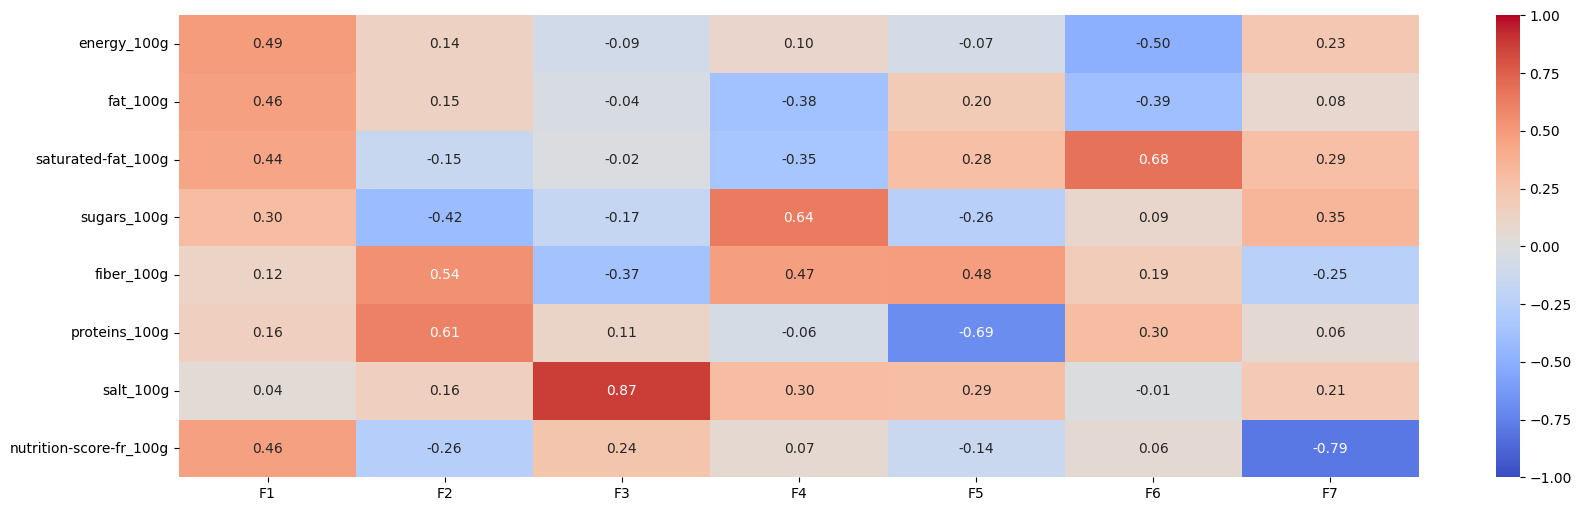

In [289]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Clusters and pattern identification with graphs ?

#### Plotting the components on circles of correlation

In [290]:
#Defining a function to plot the circles of correlation

def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """
    Diplays the correlation graph

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : pca object created earlier
    x_y : list or tuple : the x,y couple to display : [0,1] for F1 and F2
    features : list or tuple : list of features to display
    """

    # Defining x and y 
    x,y=x_y

    # Defining teh graph size
    fig, ax = plt.subplots(figsize=(11, 10))

    # For each component : 
    for i in range(0, pca.components_.shape[1]):

        # Displaying arrows
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # And labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Showing vertical and horizontal lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Showing the axis names and its inertia
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Setting a title
    plt.title("Correlations circle (F{} et F{})".format(x+1, y+1))

    # Setting the circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

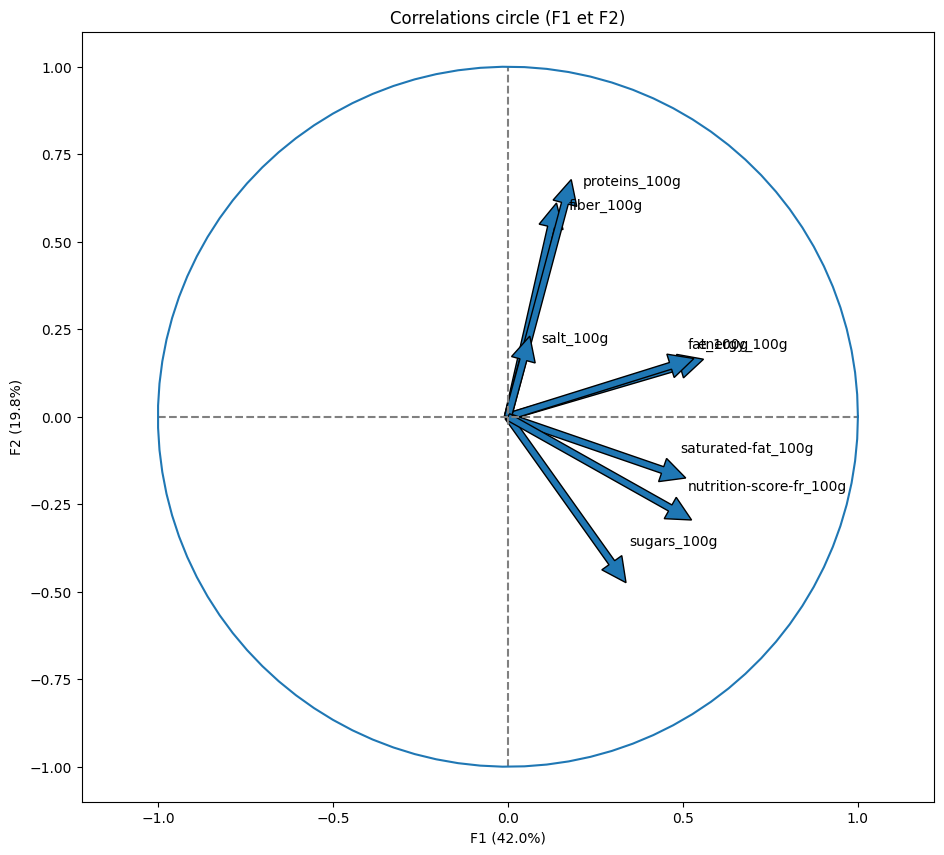

In [291]:
correlation_graph(pca,(0,1), pcs.columns)

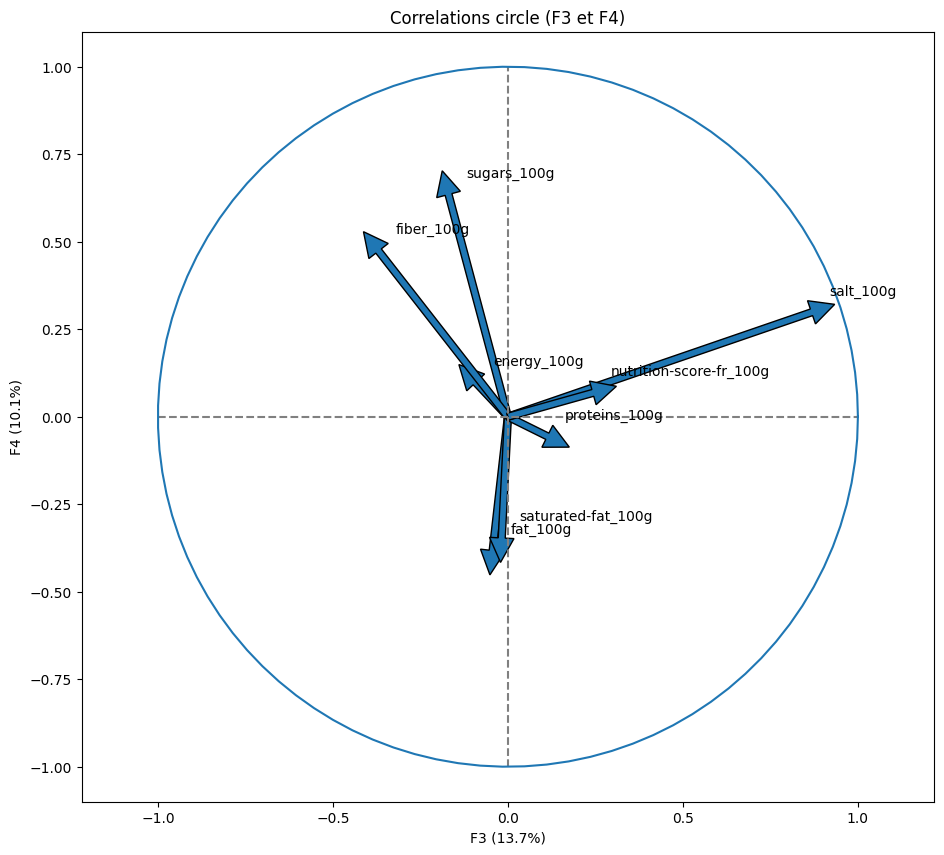

In [292]:
correlation_graph(pca,(2,3), pcs.columns)

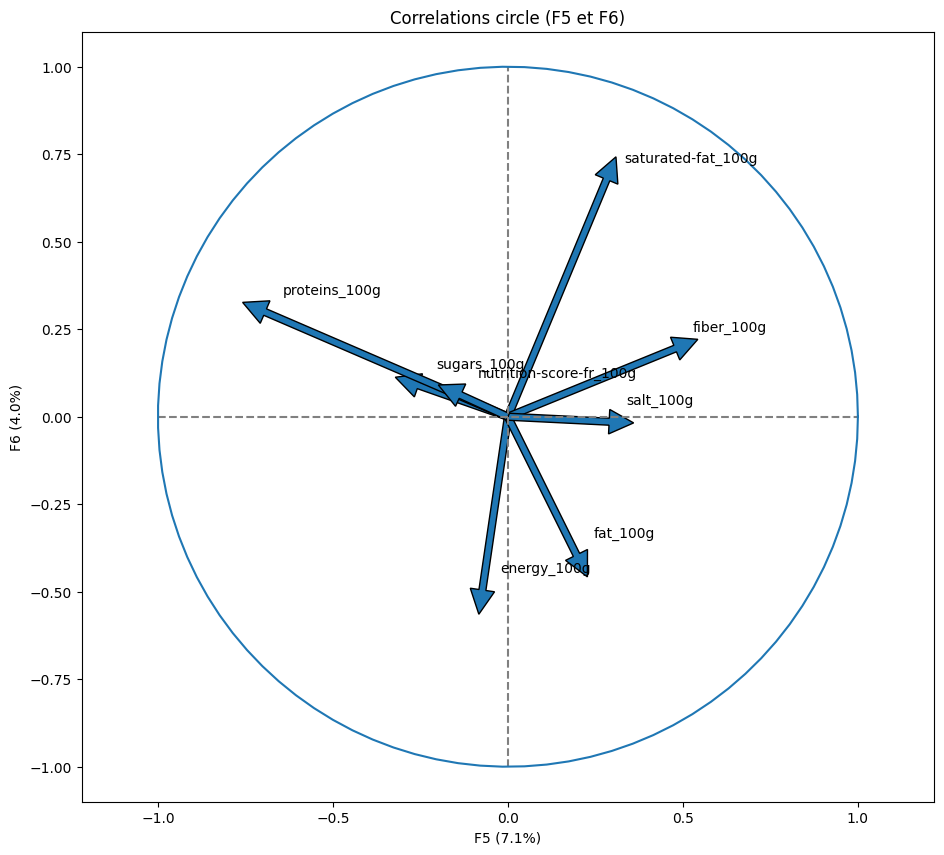

In [293]:
correlation_graph(pca,(4,5), pcs.columns)

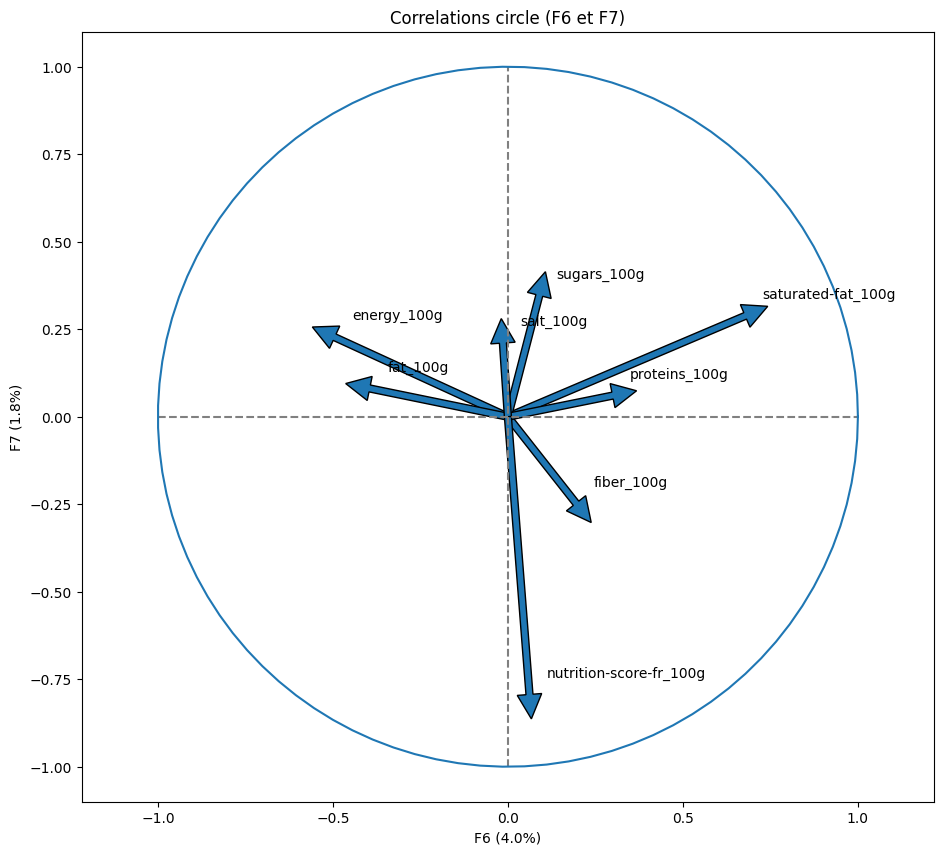

In [294]:
correlation_graph(pca,(5,6), pcs.columns)

Interpretation :
Highly correlated variables will usually have similar charges (positive or negative) in the same component.

We therefore find the same results than with the pearson correlation, according to the first component, the nutriscore is highly correlated with energy, fat and saturated fat. Variables that are highly correlated to each other contribute to the total variance in a similar way.


PCA aims to maximize the variance explained by the principal components. Therefore, variables that contribute the most to the total variance of the data will generally have higher loadings (weights) in the first principal components. In this case, it is energy, fat, saturated fat and nutriscore.

### Mutiple regression

Since some variables don't seem to have a clear relationship with the nutriscore when looking at the bivariate analysis or at PCA, it might be interesting to look at the combined relationships between the varables and the nutriscore.
Although some variables don't have a linear correlation with the target, I chose to apply a mutiple regression to see the overall interaction of my independant variables with the nutriscore.

The multiple regression will calculate a regression coefficient for each variables while also taking into account other given variables' influence on the target. The coefficient of determination will indicate whether there is a strong relationship between the given variables and the target. And whether implementing an algorithm that would be able to use the remaining variables to predict the nutriscore would be relevant.

In [295]:
#Creating a df with variable I want to use to suggest the nutriscore
scaled_df_X = scaled_df[['additives_n','ingredients_from_palm_oil_n','energy_100g','fat_100g','saturated-fat_100g','sugars_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g']]

#Creating a df with my target variable
scaled_df_Y = scaled_df['nutrition-score-fr_100g']

#Initialising the model
model = LinearRegression()

#Fitting it to my dataset
model.fit(scaled_df_X,scaled_df_Y)

#Finding out the model R2
r_squared = model.score(scaled_df_X, scaled_df_Y)


# Displaying the regression coefficients and R2
print("Regression coefficients :", model.coef_)
print("Intercept :", model.intercept_)
print("R-squared:", r_squared)

Regression coefficients : [ 0.10587305  0.0047137   0.27798192  0.14802841  0.30057416  0.39944907
 -0.04914502 -0.22632468  0.03761122  0.2220941 ]
Intercept : 1.365158938596805e-16
R-squared: 0.7962907685361993


The regression coefficient are not very high.
Regarding energy, when the energy value increases by 1, the nutriscore only increases by 0,2. And so on for other variable. The variables that seem to influence the nutriscore the most in this regression are saturated fat and sugars.

R squared is 0.79, which means that the model is well adjusted. It explains most of the nutriscore's variance.

The intercept is close to 0, which means that when all variables are at 0, the nutriscore value is very close to 0

Le coefficient de détermination (R²) mesure la proportion de la variance de la variable dépendante (target) qui est expliquée par la variance des variables indépendantes (features) dans le modèle de régression. Il varie de 0 à 1.

Text(0, 0.5, 'Predicted values')

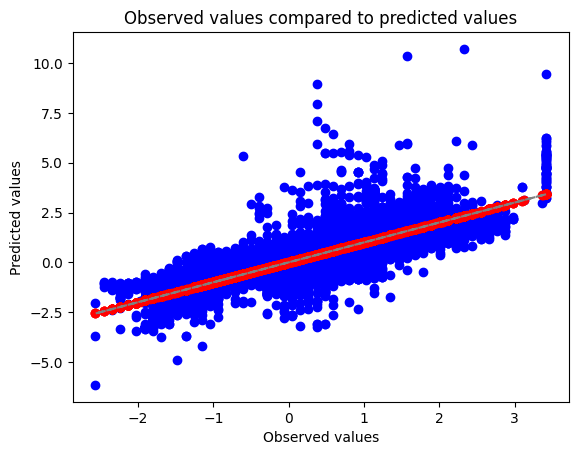

In [296]:
#Plotting the results
# Plot des valeurs observées en bleu
plt.scatter(scaled_df_Y, model.predict(scaled_df_X), color='blue', label='Observed values')

# Plot des valeurs prédites en rouge
plt.scatter(scaled_df_Y, scaled_df_Y, color='red', label='Predicted Values')

plt.plot(scaled_df_Y, scaled_df_Y, color='gray', linestyle='--')  # Ajout d'une ligne de référence y = x
plt.title('Observed values compared to predicted values')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')


When all variables are studied together, there seem to be a way to estimate the nutriscore values with all other variables, although it is not perfect since the dispersion of the observed values (actual values) is large.
It would still be possible to have a pretty good estimation of the nutriscore based on the studied variables.

## Bivariate Qualitative

Another insteresting way to see if we can estimate the nutriscore is by using the brand of the product. Some brands are specialised in organic products so most of their products have a very low nutriscore. Others have unhealthy products. But some have a mix of healthy and unhealthy product, in which cases it would not really be relevant to use the brand to estimate the nutriscore.
I will try to use an ANOVA analysis to see the relationship between the brands and the product's nutriscore.

In [297]:
df_outliers['nutrition_grade_fr'].unique()

array(['b', 'd', 'c', 'e', 'a'], dtype=object)

In [298]:
#Finding out how many of each nutrigrade we have
nutrigrade_count = pd.DataFrame(df_outliers['nutrition_grade_fr'].value_counts())
nutrigrade_count.reset_index(inplace = True)
nutrigrade_count

,nutrition_grade_fr,count
0,d,33580
1,c,25258
2,a,24007
3,e,21968
4,b,18989


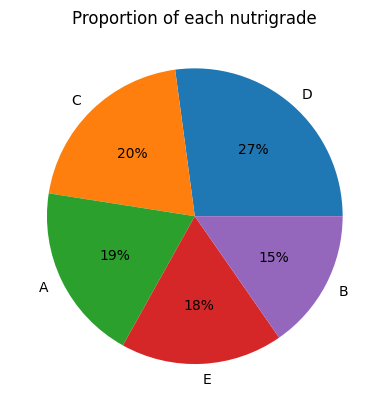

In [299]:
#Plotting
labels = ['D','C','A','E','B']
plt.pie(nutrigrade_count['count'], labels = labels, autopct="%0.0f%%")
plt.title('Proportion of each nutrigrade')
plt.show()

In [300]:
anova_df = df_outliers[['nutrition_grade_fr','nutrition-score-fr_100g']]
anova_df.columns = ["Nutritiongrade", "Nutriscore"]
anova_df

,Nutritiongrade,Nutriscore
0,b,0.000000
1,d,12.000000
2,d,7.079986
3,c,7.000000
4,e,23.929571
...,...,...
123797,c,6.000000
123798,b,2.000000
123799,d,11.000000
123800,a,-1.000000


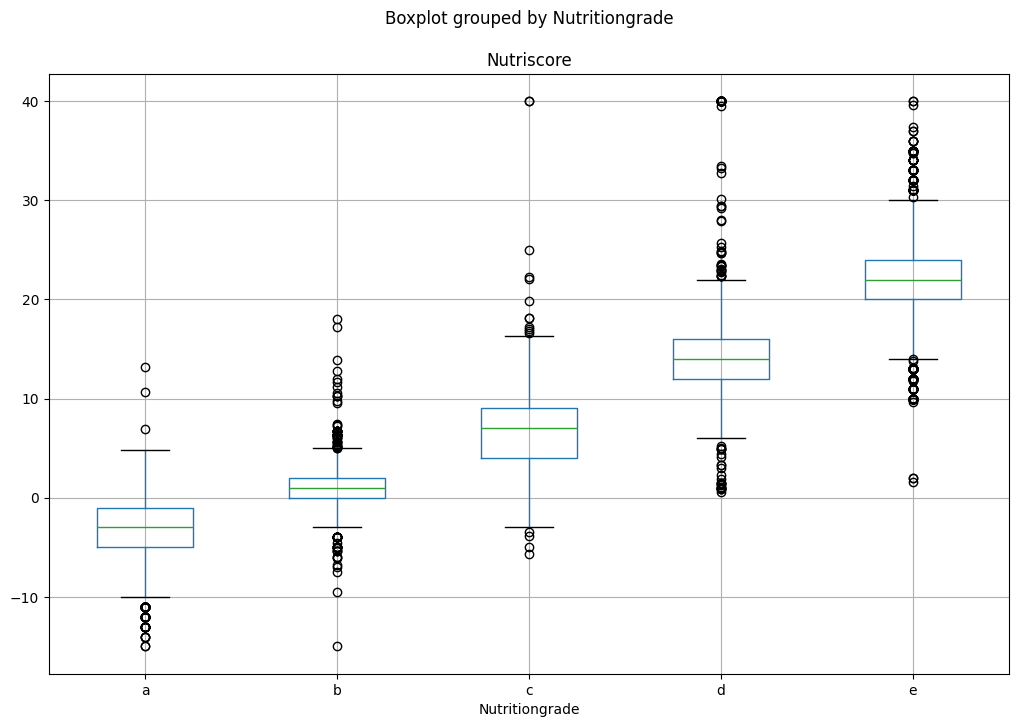

In [301]:
#Anova
import pandas as pd

data = anova_df

#Create a boxplot
data.boxplot('Nutriscore', by='Nutritiongrade', figsize=(12, 8))

nutrigrade = pd.unique(data.Nutritiongrade.values)
d_data = {nutri:data['Nutriscore'][data.Nutritiongrade == nutri] 
    for nutri in pd.unique(data.Nutritiongrade.values)}

k = len(pd.unique(data.Nutritiongrade))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('Nutritiongrade').size()[0] #Participants in each condition

Using this box plot, we can see a lot of outliers for each nutrigrade, we can also see that some products with a very high nutriscore have a nutrigrade value of "d" instead of "e". The same can be observed for low nutriscore values, the box plot for nutrition grades "a" and "b" overlap. There is no clear nutriscore values that lead to a specific nutrigrade.

This cannot only be due to the missing values replacement, only 2 000 nutrigrades were imputed and there are more outliers than that.

In [302]:
#Using anova to compare the nutriscore to the nutrition grade
mod = ols('Nutriscore ~ Nutritiongrade',
                data=anova_df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                      sum_sq        df              F  PR(>F)
Nutritiongrade  9.714592e+06       4.0  410483.361079     0.0
Residual        7.324519e+05  123797.0            NaN     NaN


In [303]:
#Calculating eta square
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

0.9298890720275962

The Fstat is high while the p value is null, which means that we reject the null hypothesis which states that the means of our groups are not significantly different(that the independant variable has no significant impact on the dependant variable). We can confirm that the means of our group are statistically different, so our independant variable has a significant impact on the independant variable variations.

Eta square η² :Indicates the proportion of variation of the dependant variable that can be explained by variations in the independant variables while looking at the total variation of the dependant variable. When it is high, it means that the independant variable variations explains most of the dependant variable variation.

# Conclusion

The remaining variables could be used to give a pretty accurate prediction of the nutriscore based on the product's characteristics.

To go further, I would have to create and implement a machine learning model that will take the chosen variables as input and predict a nutriscore.